In [2]:
# in this notebook, I will try to fit a model relating the mean behavior of L4, L2/3, SST and VIP cells

In [3]:
# load the data

In [4]:
import pyute as ut
import autograd.numpy as np
import matplotlib.pyplot as plt
import sklearn
import h5py
import pdb
import scipy.optimize as sop
from mpl_toolkits.mplot3d import Axes3D
import sklearn.discriminant_analysis as skd
import autograd.scipy.special as ssp
from autograd import elementwise_grad as egrad
from autograd import grad
from autograd import jacobian
from autograd import hessian
import size_contrast_analysis as sca
import scipy.stats as sst
import sim_utils as utils
from importlib import reload
reload(utils)
%matplotlib notebook

/Users/dan/Documents/code/downloads/OASIS/oasis/functions.py:14: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  "just not the slower interior point methods we compared to in the papers.")


In [10]:
dsbase = '/Users/dan/Documents/notebooks/mossing-PC/shared_data/'
dsnames = [dsbase+x+'_data_struct.hdf5' for x in ['pyr_l4','pyr_l23','sst_l23','vip_l23','pv_l23']]

In [12]:
nsize,ncontrast = 5,6

In [22]:
with ut.hdf5read(dsnames[-2]) as ds:
    for key in ds:
        if 'size_contrast_0' in ds[key]:
            if ds[key]['size_contrast_0']['stimulus_size_deg'].size==3:
                print(key)

session_180618_M8956


In [13]:
to_exclude = ['session_'+exptname for exptname in ['180714_M9053','180321_M7955', '180519_M8959', '180531_M8961', '180618_M8956','190202_M10075', '190620_M10619']]
tuning,uparam,displacement,pval = utils.compute_tuning(dsnames[-1],datafield='decon',running=False,expttype='size_contrast_0')
modal_uparam = uparam[0].copy()


<HDF5 group "/session_191105_M0589" (8 members)>
decon
1.0


/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191220_M0589" (8 members)>
decon
0.9995039682539683
<HDF5 group "/session_191229_M0892" (8 members)>
decon
0.9995039682539683
<HDF5 group "/session_200102_M0892" (8 members)>
decon
0.9350198412698413


In [14]:
reload(utils)
# dsnames = [dsnames[0],dsnames[2],dsnames[3],dsnames[4]]
ncelltypes = len(dsnames)
selection = [None for itype in range(ncelltypes)]
for itype in range(ncelltypes):
    with ut.hdf5read(dsnames[itype]) as ds:
        keylist = list(ds.keys())
        nexpt = len(keylist)
        to_keep = np.array([k not in to_exclude for k in keylist])
        selection[itype] = np.arange(nexpt)[to_keep]
# selection = utils.default_selection()
# selection[1] = [0,1,2,3,4,5,7,8,9]
# selection[3] = None
rs = utils.gen_rs_modal_uparam(dsnames=dsnames,selection=selection,running=False,modal_uparam=modal_uparam,expttype='size_contrast_0',pval_cutoff=1.1)
# ut.mkdir('data')
# np.save('data/celltype_rate_summary.npy',rs)
# rs = np.load('data/celltype_rate_summary.npy',allow_pickle=True)

/Users/dan/Documents/notebooks/mossing-PC/shared_data/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
decon
0.8257142857142857


/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190202_M10075" (9 members)>
decon
0.6034722222222222


/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190304_M10077" (9 members)>
decon
0.5597222222222222


/Users/dan/Documents/code/adesnal/pyute.py:1066: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (9 members)>
decon
0.14097222222222222
<HDF5 group "/session_190620_M10616" (9 members)>
decon


/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


0.5431547619047619


/Users/dan/Documents/code/adesnal/pyute.py:1066: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (9 members)>
decon
0.6006944444444444


/Users/dan/Documents/code/adesnal/pyute.py:1066: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190624_M10615" (8 members)>
decon
0.08234126984126984
<HDF5 group "/session_190627_M10616" (9 members)>
decon


/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


0.7876984126984127
<HDF5 group "/session_190701_M10615" (8 members)>
decon
0.6691468253968254


/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191212_M0762" (8 members)>
decon
0.8219246031746031
/Users/dan/Documents/notebooks/mossing-PC/shared_data/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
decon
0.7321428571428571
<HDF5 group "/session_181209_M8536" (9 members)>
decon
0.8307142857142857


/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181213_M8536" (8 members)>
decon
0.03857142857142857
<HDF5 group "/session_181214_M10130" (8 members)>
decon
0.4142857142857143


/Users/dan/Documents/code/adesnal/pyute.py:1066: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)
/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190102_M10130" (8 members)>
decon
0.44916666666666666
<HDF5 group "/session_190128_M8982" (9 members)>
decon
0.9472222222222222


/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190130_M9667" (9 members)>
decon
0.19027777777777777
<HDF5 group "/session_190131_M9355" (9 members)>
decon


/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


0.9340277777777778


/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190208_M9355" (9 members)>
decon
0.9506944444444444


/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190212_M8536" (9 members)>
decon
0.2465277777777778
<HDF5 group "/session_191002_M0293" (8 members)>
decon
0.8462301587301587


/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191108_M0403" (8 members)>
decon
0.9970238095238095


/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


/Users/dan/Documents/notebooks/mossing-PC/shared_data/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (9 members)>
decon
0.19083333333333333
<HDF5 group "/session_180714_M9053" (9 members)>
decon
0.15583333333333332
<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.49166666666666664


/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/dan/Documents/code/adesnal/pyute.py:1066: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180821_M9417" (9 members)>
decon
0.8525
<HDF5 group "/session_181117_M10039" (9 members)>
decon
0.7892857142857143
<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.8571428571428571


/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.9385714285714286
<HDF5 group "/session_191224_M0390" (11 members)>
decon
0.9404761904761905
/Users/dan/Documents/notebooks/mossing-PC/shared_data/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (8 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
decon
0.011
<HDF5 group "/session_180516_M8956" (9 members)>
decon
0.275
<HDF5 group "/session_180519_M8959" (8 members)>
decon
0.0575
<HDF5 group "/session_180528_M8959" (9 members)>
decon
0.3383333333333333
<HDF5 group "/session_180531_M8961" (9 members)>
decon


/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


0.3625
<HDF5 group "/session_180618_M8956" (9 members)>
decon
0.004166666666666667
<HDF5 group "/session_180719_M8961" (8 members)>
decon
0.9908333333333333
<HDF5 group "/session_180720_M8961" (8 members)>
decon
0.9541666666666667
<HDF5 group "/session_180903_M8961" (9 members)>
decon
0.16583333333333333
<HDF5 group "/session_190710_M0208" (9 members)>
decon
0.7237103174603174


/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191215_M0385" (9 members)>
decon
0.8100198412698413
<HDF5 group "/session_200103_M0388" (9 members)>
decon
0.9191468253968254
/Users/dan/Documents/notebooks/mossing-PC/shared_data/pv_l23_data_struct.hdf5
<HDF5 group "/session_191105_M0589" (8 members)>
decon
1.0


/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191220_M0589" (8 members)>
decon
0.9995039682539683
<HDF5 group "/session_191229_M0892" (8 members)>
decon
0.9995039682539683
<HDF5 group "/session_200102_M0892" (8 members)>
decon
0.9350198412698413


/Users/dan/Documents/code/adesnal/sim_utils.py:162: RuntimeWarning: invalid value encountered in less
  return np.logical_and(criterion(displacement),pval < pcutoff)
/Users/dan/Documents/code/adesnal/sim_utils.py:540: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  big_ind = big_ind*iit[slc]
/Users/dan/Documents/code/adesnal/sim_utils.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  a[[slice(None) for iind in range(ignore_first)]+[a_bool]] = b[[slice(None) for iind in range(ignore_first)]+[b_bool]]
/Users/dan/Documents/code/adesnal/sim

In [ ]:
def sum_to_1(r):
    R = r.reshape((r.shape[0],-1))
    R = R/np.nansum(R[:,~np.isnan(R.sum(0))],axis=1)[:,np.newaxis]
    return R
Rs = [[None,None] for i in range(len(rs))]
for iR,r in enumerate(rs):
    for ialign in range(2):
        Rs[iR][ialign] = sum_to_1(r[ialign][:,:nsize,:ncontrast])

In [7]:
# with ut.hdf5read(dsnames[3]) as ds:
#     keylist = list(ds.keys())
#     print(ds[keylist[0]].keys())

NameError: name 'dsnames' is not defined

In [21]:
# tuning,uparam,displacement,pval = utils.compute_tuning(dsnames[-2],datafield='decon',running=False,expttype='figure_ground_0')
# modal_uparam_fg = uparam[0].copy()


<HDF5 group "/session_180321_M7955" (8 members)>
decon
0.08333333333333333
<HDF5 group "/session_180412_M7955" (8 members)>
<HDF5 group "/session_180516_M8956" (9 members)>
decon
0.67
<HDF5 group "/session_180519_M8959" (8 members)>
<HDF5 group "/session_180528_M8959" (9 members)>
decon
0.4875


/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180531_M8961" (9 members)>
decon
0.395
<HDF5 group "/session_180618_M8956" (9 members)>
decon
0.125
<HDF5 group "/session_180719_M8961" (8 members)>
<HDF5 group "/session_180720_M8961" (8 members)>
<HDF5 group "/session_180903_M8961" (9 members)>
decon
0.3075
<HDF5 group "/session_190710_M0208" (9 members)>
decon
0.7375


/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191215_M0385" (9 members)>
decon
0.7875
<HDF5 group "/session_200103_M0388" (9 members)>
decon
0.915


In [15]:
itype = 2
rs_sst = utils.gen_rs_modal_uparam(dsnames=[dsnames[itype]],selection=[selection[itype]],running=False,modal_uparam=modal_uparam,expttype='size_contrast_0',pval_cutoff=1.1)
rs[itype:itype+1] = rs_sst

/Users/dan/Documents/notebooks/mossing-PC/shared_data/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (9 members)>
decon
0.19083333333333333
<HDF5 group "/session_180714_M9053" (9 members)>
decon
0.15583333333333332
<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.49166666666666664


/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]
/Users/dan/Documents/code/adesnal/pyute.py:1066: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180821_M9417" (9 members)>
decon
0.8525
<HDF5 group "/session_181117_M10039" (9 members)>
decon
0.7892857142857143
<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.8571428571428571


/Users/dan/Documents/code/adesnal/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.9385714285714286
<HDF5 group "/session_191224_M0390" (11 members)>
decon
0.9404761904761905


/Users/dan/Documents/code/adesnal/sim_utils.py:162: RuntimeWarning: invalid value encountered in less
  return np.logical_and(criterion(displacement),pval < pcutoff)
/Users/dan/Documents/code/adesnal/sim_utils.py:540: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  big_ind = big_ind*iit[slc]
/Users/dan/Documents/code/adesnal/sim_utils.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  a[[slice(None) for iind in range(ignore_first)]+[a_bool]] = b[[slice(None) for iind in range(ignore_first)]+[b_bool]]
/Users/dan/Documents/code/adesnal/sim

In [16]:
reload(utils)
rs_fg = utils.gen_rs_modal_uparam(dsnames=dsnames,selection=selection,running=False,modal_uparam=modal_uparam_fg,expttype='figure_ground_0',pval_cutoff=1.1)

NameError: name 'modal_uparam_fg' is not defined

In [ ]:
# np.save('rs_no_pval_criterion_200118.npy',{'rs':rs,'rs_fg':rs_fg})

In [25]:
# npyfile = np.load('rs_no_pval_criterion_200118.npy',allow_pickle='True')[()]
# rs = npyfile['rs']
# rs_fg = npyfile['rs_fg']

<IPython.core.display.Javascript object>


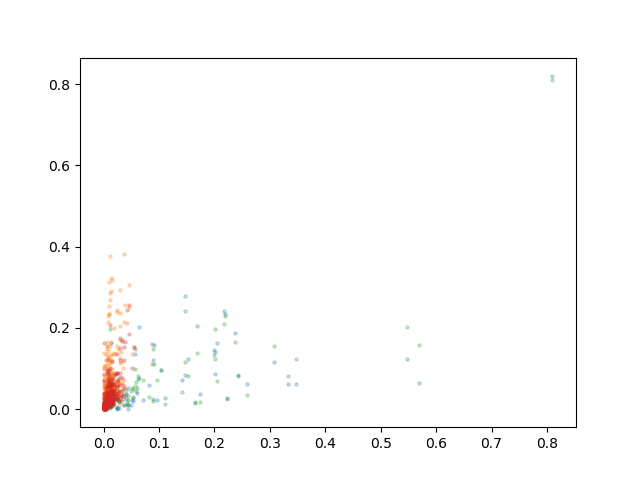

In [28]:
plt.figure()
itype = 3
for itype in [2,3]:
    plt.scatter(rs_fg[itype][0][:,3],rs_fg[itype][0][:,2],s=5,alpha=0.25)

In [ ]:
plt.figure()
itype = 3
for itype in [2,3]:
    plt.scatter(rs_fg[itype][0][:,3],rs_fg[itype][0][:,4],s=5,alpha=0.25)
# plt.xlim((0,0.1))
# plt.ylim((0,0.4))

In [29]:
itype = 3
for itype in [2,3]:
    plt.scatter(rs_fg[itype][0][:,3],rs_fg[itype][0][:,4],s=5,alpha=0.25)

<IPython.core.display.Javascript object>


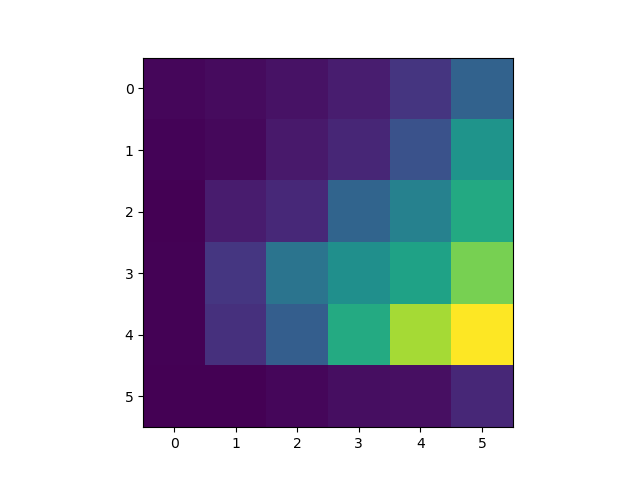

In [30]:
plt.figure()
plt.imshow(np.nanmean(rs[2][0],0))

In [31]:
rs_fg[itype][ialign].shape

(343, 5)

<IPython.core.display.Javascript object>


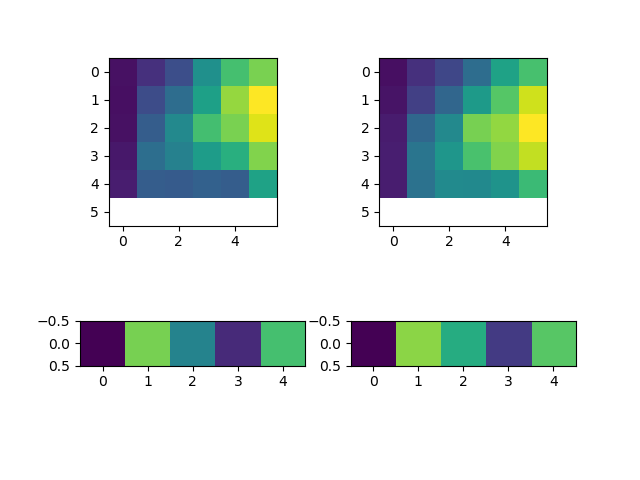

In [32]:
plt.figure()
itype = 1
for ialign in range(2):
    rrs = [this_rs[itype][ialign].copy() for this_rs in [rs,rs_fg]]
    to_keep = [np.nanmean(rrs[0][:,:,0],1)<np.nanmean(rrs[0][:,:,-1],1), rrs[1][:,0]<np.nanmean(rrs[1][:,[1,3]],1)]
    rrs[1] = rrs[1][:,np.newaxis,:]
    rrs = [this_rs/np.nanmean(np.nanmean(this_rs,axis=1),axis=1)[:,np.newaxis,np.newaxis] for this_rs in rrs]
    rsm = [this_rs[this_to_keep].mean(0) for this_rs,this_to_keep in zip(rrs,to_keep)]
    mn = np.minimum(*[np.nanmin(this_rs) for this_rs in rsm])
    mx = np.maximum(*[np.nanmax(this_rs) for this_rs in rsm])
    plt.subplot(2,2,ialign+1)
    plt.imshow(rsm[0],vmin=mn,vmax=mx)
    plt.subplot(2,2,2+ialign+1)
    plt.imshow(rsm[1],vmin=mn,vmax=mx)

In [10]:
plt.close('all')

In [33]:
iexpt = 0
reload(utils)
nparam = len(modal_uparam)
inds_in_this,inds_in_modal = [[None for iparam in range(nparam)] for iarr in range(2)]
for iparam in range(len(modal_uparam)):
    inds_in_this[iparam],inds_in_modal[iparam] = utils.assign_to_modal_uparams(uparam[iexpt][iparam],modal_uparam[iparam])


non-numerical parameter


/Users/dan/Documents/code/adesnal/sim_utils.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  assert(np.all(this_uparam==modal_uparam))


AssertionError: 

In [34]:
def assign_(a,a_ind,b,b_ind,ignore_first=1):
    a_bool = gen_big_bool(a_ind)
    b_bool = gen_big_bool(b_ind)
    a[[slice(None) for iind in range(ignore_first)]+[a_bool]] = b[[slice(None) for iind in range(ignore_first)]+[b_bool]]

In [35]:
reload(utils)
temp = [np.nan*np.ones(tuning[iexpt].shape),None]
# temp1 = utils.index_(temp,inds_in_modal)
# temp1 = utils.index_(tuning[iexpt],inds_in_this)

AttributeError: 'NoneType' object has no attribute 'shape'

In [36]:
reload(utils)
utils.assign_from_uparam(temp[0],modal_uparam,tuning[iexpt],uparam[iexpt])

NameError: name 'temp' is not defined

In [77]:
import sklearn.neighbors as skn
def interp_k_nearest_neighbors(arr,svd_reduced=None,k=5):
    if svd_reduced is None:
        svd_reduced = arr[:,~np.isnan(arr.sum(0))]
    nn = skn.NearestNeighbors(n_neighbors=k).fit(svd_reduced)
    if not svd_reduced is None and (svd_reduced.shape[1]>0):
        to_interpolate = np.isnan(arr.sum(1))
        for irow,row in enumerate(arr):
            if to_interpolate[irow]:
                lkat = ~np.isnan(row)
        arr_norm = arr[:,lkat]/arr[:,lkat].sum(1)[:,np.newaxis]

<IPython.core.display.Javascript object>


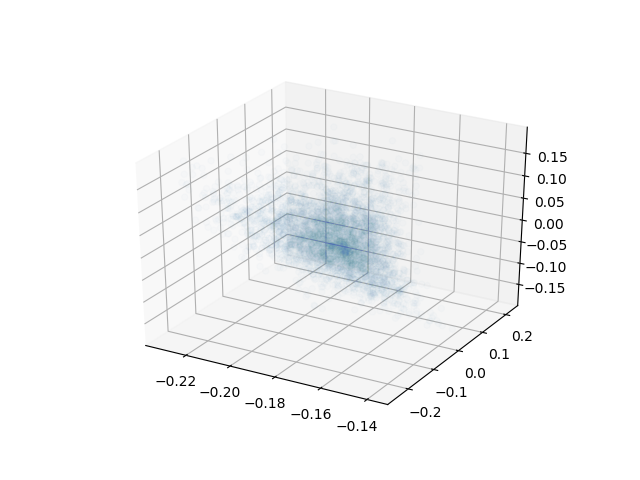

In [78]:
j = 0
rrs = Rs[j][0][~np.isnan(Rs[j][0][:,0])]
rrs = rrs[:,~np.isnan(rrs.mean(0))]
u,s,v = np.linalg.svd(rrs)
diaged = Rs[j][0] @ v.T
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(diaged[:,0],diaged[:,1],diaged[:,2],alpha=50/diaged.shape[0])
# plt.xlim(-1,1)
# plt.ylim(-1,1)

<IPython.core.display.Javascript object>


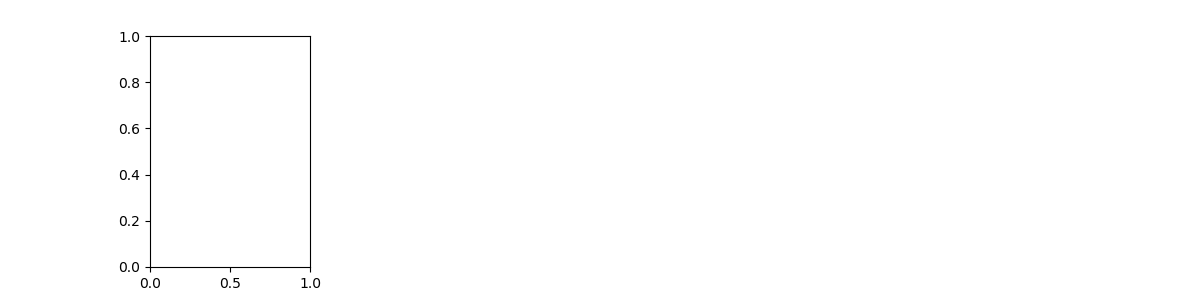

ValueError: cannot reshape array of size 30 into shape (6,6)

In [79]:
ucontrast = [str(c) for c in np.array((0,6,12,25,50,100))]
usize = [str(s) for s in (5,8,13,22,36,60)]
celltypes = ['L4 PC', 'L2/3 PC', 'L2/3 SST', 'L2/3 VIP', 'L2/3 PV']
ntypes = len(celltypes)
# aligntypes = ['RF distance <10$^o$']
saveas = ['figures/five_cell_types_aligned_2d.jpg','figures/five_cell_types_misaligned_2d.jpg']
mag = 3
for ialign in range(2):
    plt.figure(figsize=(4*mag,mag))
    for iicelltype,icelltype in enumerate([0,1,4,2,3]):
        plt.subplot(1,ntypes,iicelltype+1)
        if not rs[icelltype][ialign] is None:
            to_show = np.nanmean(Rs[icelltype][ialign],0).reshape((6,6))
            sca.show_size_contrast(to_show,flipud=True,usize=[5,8,13,22,36,60],vmin=0,vmax=np.nanmax(to_show))
        plt.title(celltypes[icelltype])
    plt.tight_layout()
#     plt.savefig(saveas[ialign],dpi=300)

In [41]:
opto_utils.norm_to_mean_light_off(sc)

NameError: name 'opto_utils' is not defined

<IPython.core.display.Javascript object>


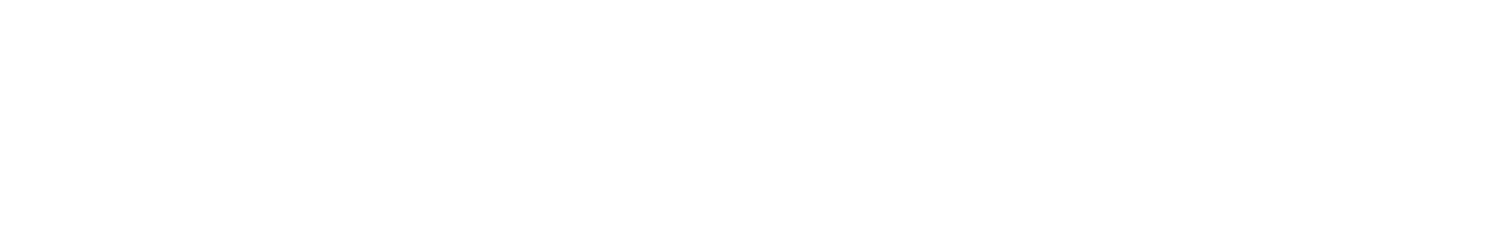

ValueError: cannot reshape array of size 54060 into shape (6,6)

In [80]:
mag = 2.5
colors = ['g','k','C1','m','b']
plt.figure(figsize=(mag*len(usize),mag))
for icelltype in [1,4]:
    mn,lb,ub = ut.bootstrap(Rs[icelltype][0].reshape((-1,len(usize),len(ucontrast))),fn=np.nanmean,axis=0,pct=(50,2.5,97.5))
    normby = mn.mean()
    mn,lb,ub = [x/normby for x in [mn,lb,ub]]
    for isize in range(len(usize)):
        plt.subplot(1,len(usize),isize+1)
        plt.errorbar([int(u) for u in ucontrast],mn[isize],yerr=(mn[isize]-lb[isize],ub[isize]-mn[isize]),c=colors[icelltype])
        plt.ylim(0,2.5)
        plt.tight_layout()
        plt.title(usize[isize]+'$^o$ size')
    plt.subplot(1,len(usize),1)
    plt.xlabel('contrast (%)')
    plt.ylabel('event rate/mean event rate')
    plt.legend(['L2/3 PC','L2/3 PV'])
# plt.savefig('figures/pc_pv_contrast_tuning.jpg',dpi=300)

In [81]:
icelltype = 2
mn,lb,ub = ut.bootstrap(Rs[icelltype][0].reshape((-1,len(usize),len(ucontrast))),fn=np.nanmean,axis=0,pct=(50,2.5,97.5))

ValueError: cannot reshape array of size 1290 into shape (6,6)

In [82]:
mn

array([[0.21233308, 0.27894662, 0.35987597, 0.45623565, 0.64730792,
        1.21625395],
       [0.1899606 , 0.24361161, 0.40409843, 0.52284002, 0.93906714,
        1.88222688],
       [0.15943332, 0.38549788, 0.50396241, 1.11192284, 1.49076063,
        2.02479744],
       [0.20279661, 0.58972111, 1.24795447, 1.53398261, 1.81838123,
        2.4255347 ],
       [0.16304856, 0.51724141, 1.00352924, 1.89415782, 2.67443213,
        2.90008771],
       [       nan,        nan,        nan,        nan,        nan,
               nan]])

<IPython.core.display.Javascript object>


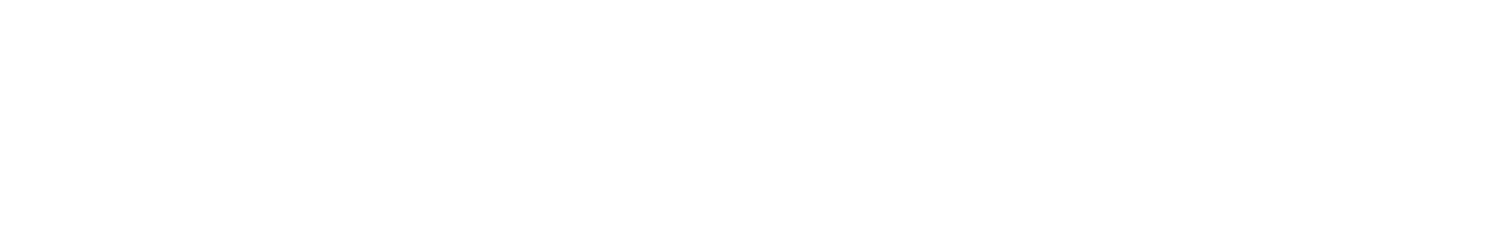

ValueError: cannot reshape array of size 1290 into shape (6,6)

In [83]:
mag = 2.5
colors = ['g','k','C1','m','b']
plt.figure(figsize=(mag*len(usize),mag))
for icelltype in [2,3]:
    mn,lb,ub = ut.bootstrap(Rs[icelltype][0].reshape((-1,len(usize),len(ucontrast))),fn=np.nanmean,axis=0,pct=(50,2.5,97.5))
    normby = np.nanmean(mn)
    mn,lb,ub = [x/normby for x in [mn,lb,ub]]
    for isize in range(len(usize)):
        plt.subplot(1,len(usize),isize+1)
        plt.errorbar([int(u) for u in ucontrast],mn[isize],yerr=(mn[isize]-lb[isize],ub[isize]-mn[isize]),c=colors[icelltype])
        plt.ylim(0,3)
        plt.tight_layout()
        plt.title(usize[isize]+'$^o$ size')
    plt.subplot(1,len(usize),1)
    plt.xlabel('contrast (%)')
    plt.ylabel('activity (a.u.)')
    plt.legend(['L2/3 SST','L2/3 VIP'])
# plt.savefig('figures/vip_sst_contrast_tuning.jpg',dpi=300)

<IPython.core.display.Javascript object>


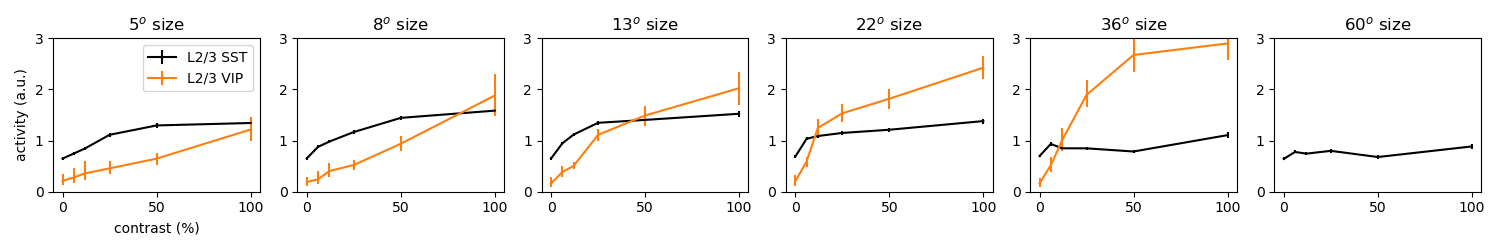

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


In [45]:
mag = 2.5
colors = ['g','k','C1','m','b']
plt.figure(figsize=(mag*len(usize),mag))
for icelltype in [1,2]:
    mn,lb,ub = ut.bootstrap(Rs[icelltype][0].reshape((-1,len(usize),len(ucontrast))),fn=np.nanmean,axis=0,pct=(50,2.5,97.5))
    normby = np.nanmean(mn)
    mn,lb,ub = [x/normby for x in [mn,lb,ub]]
    for isize in range(len(usize)):
        plt.subplot(1,len(usize),isize+1)
        plt.errorbar([int(u) for u in ucontrast],mn[isize],yerr=(mn[isize]-lb[isize],ub[isize]-mn[isize]),c=colors[icelltype])
        plt.ylim(0,3)
        plt.tight_layout()
        plt.title(usize[isize]+'$^o$ size')
    plt.subplot(1,len(usize),1)
    plt.xlabel('contrast (%)')
    plt.ylabel('activity (a.u.)')
    plt.legend(['L2/3 SST','L2/3 VIP'])
# plt.savefig('figures/pc_sst_contrast_tuning.jpg',dpi=300)

In [84]:
plt.close('all')

<IPython.core.display.Javascript object>


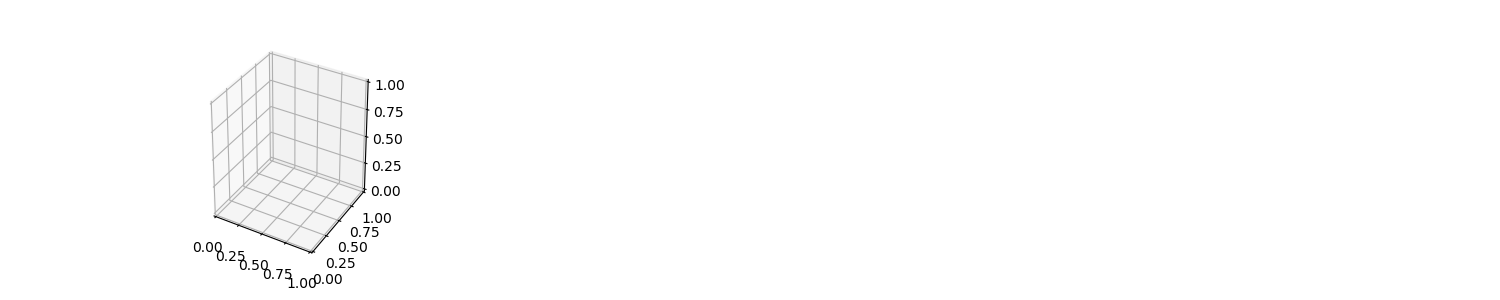

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# setup the figure and axes
mag = 3
_x = np.arange(6)
_y = np.arange(6)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
saveas = ['figures/five_cell_types_aligned_3d.jpg','figures/five_cell_types_misaligned_3d.jpg']
for ialign in range(2):
    fig = plt.figure(figsize=(5*mag, mag))
    for icelltype in range(5):
        ax1 = fig.add_subplot(150+icelltype+1, projection='3d')
        # ax2 = fig.add_subplot(122, projection='3d')

        top = np.nanmean(Rs[icelltype][ialign],0) #x + y
        bottom = np.zeros_like(top)
        width = depth = 1
        norm = mcolors.Normalize(0, top.max())
        colors = plt.cm.viridis(norm(top.tolist()))
        ax1.bar3d(x, y, bottom, width, depth, top, shade=True,color=colors)
        ax1.view_init(45,225)
        ax1.set_title(celltypes[icelltype])
        plt.xlabel('contrast (%)')
        plt.xticks(np.arange(6),[0,6,12,25,50,100])
        plt.ylabel('size ($^o$)')
        plt.yticks(np.arange(6),[5,8,13,22,36,60])


        # ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
        # ax2.set_title('Not Shaded')
    plt.show()
    plt.tight_layout()
    plt.savefig(saveas[ialign],dpi=300)

<IPython.core.display.Javascript object>


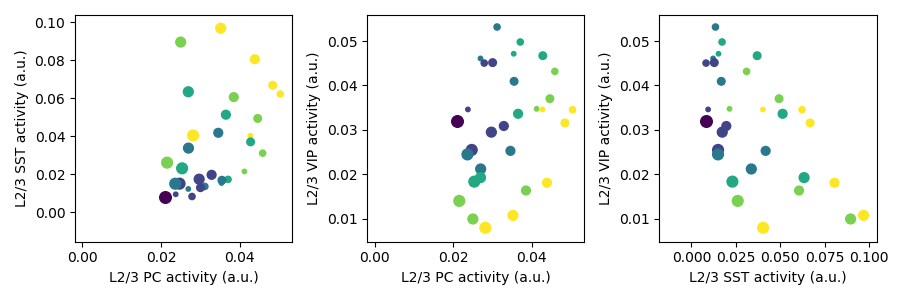

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [48]:
reload(sca)
labels = ['L4 PC','L2/3 PC','L2/3 SST','L2/3 VIP','L2/3 PV']
def plot_weak_strong(ix,iy,ialign):
    strong = np.zeros((6,6),dtype='bool')
    for i in range(6):
        strong[i] = np.arange(6)>=6-i
    strong = strong.flatten()
    ptx = np.nanmean(Rs[ix][ialign],0)
    pty = np.nanmean(Rs[iy][ialign],0)
    for these in [~strong,strong]:
        plt.scatter(ptx[these],pty[these])
    plt.axis('equal')
    plt.xlabel('%s activity (a.u.)' %labels[ix])
    plt.ylabel('%s activity (a.u.)' %labels[iy])
def scatter_size_contrast_(ix,iy,ialign):
    ptx = np.nanmean(Rs[ix][ialign],0)
    pty = np.nanmean(Rs[iy][ialign],0)
    sca.scatter_size_contrast(np.nanmean(Rs[ix][ialign],0),np.nanmean(Rs[iy][ialign],0),nsize=6,ncontrast=6,equality_line=False,square=False,equate_0=True)
    plt.xlabel('%s activity (a.u.)' %labels[ix])
    plt.ylabel('%s activity (a.u.)' %labels[iy])
mag = 3
plt.figure(figsize=(mag*3,mag))
plt.subplot(1,3,1)
ix = 1
iy = 2
ialign = 0
scatter_size_contrast_(ix,iy,ialign)
# plot_weak_strong(ix,iy,ialign)
plt.subplot(1,3,2)
ix = 1
iy = 3
ialign = 0
scatter_size_contrast_(ix,iy,ialign)
# plot_weak_strong(ix,iy,ialign)
plt.subplot(1,3,3)
ix = 2
iy = 3
ialign = 0
scatter_size_contrast_(ix,iy,ialign)
plt.tight_layout()
# plt.savefig('figures/pc_sst_vip_projections_colorful_scatter.jpg',dpi=300)

In [86]:
ptx.shape

NameError: name 'ptx' is not defined

In [87]:
def plot_size_tuning_by_contrast(arr,cs):
    usize = np.array((0,8,13,22,36))
    to_plot = arr.mean(0)
    arr_sz = gen_size_tuning(arr)
    arr_sz = arr_sz/arr_sz.max(1).max(1).max(1)[:,np.newaxis,np.newaxis,np.newaxis]
    lb,ub = ut.bootstrap(arr_sz,np.mean,pct=(2.5,97.5))
    colors = ['k','r']
    lbls = ['light off','light on']
    to_plot = arr_sz.mean(0)
    for ic,c in enumerate(cs):
        plt.subplot(1,len(cs),ic+1)
        for il in range(2):
            ut.plot_bootstrapped_errorbars_hillel(usize,arr_sz[:,:,c:c+1,il].transpose((0,2,1)),markersize=5,colors=colors[il])
        plt.ylim(to_plot.min()-0.1,to_plot.max()+0.1)
        plt.xlabel('size ($^o$)')
    plt.legend(lbls)
    plt.subplot(1,len(cs),1)
    plt.ylabel('event rate / max event rate')
#     plt.tight_layout()

def gen_size_tuning(sc):
    gray = np.tile(sc[:,0].mean(0)[np.newaxis,np.newaxis],(1,sc.shape[1]))
    to_plot = np.concatenate((gray,sc),axis=0)
    return to_plot

In [88]:
(tunings[0][2]).shape

NameError: name 'tunings' is not defined

<IPython.core.display.Javascript object>


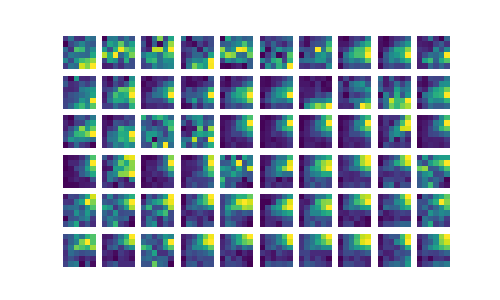

In [89]:
ut.imshow_in_rows(rs[4][0][:200])

<IPython.core.display.Javascript object>


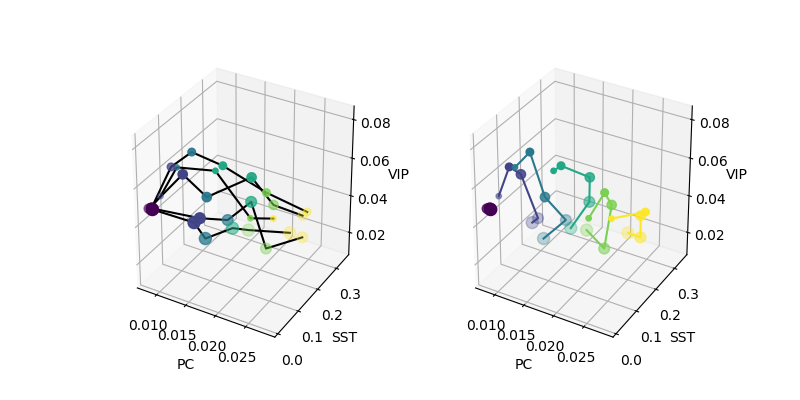

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0.5, 0, 'VIP')

In [90]:
r_to_plot = [None for i in range(3)]
ialign = 0
r_to_plot[0] = rs[1][ialign].mean(0)
r_to_plot[1] = rs[2][ialign].mean(0)
r_to_plot[2] = rs[3][ialign].mean(0)
colors = plt.cm.viridis(np.linspace(0,1,6))

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,2,1,projection='3d')
for i in range(5):
    ax.plot(r_to_plot[0][i],r_to_plot[1][i],r_to_plot[2][i],c='k')
    ax.scatter(r_to_plot[0][i],r_to_plot[1][i],r_to_plot[2][i],c=colors,s=15*i+15)#,r_to_plot[2][i],c=colors,s=15*i+10)
plt.xlabel('PC')
plt.ylabel('SST')
ax.set_zlabel('VIP')
ax = fig.add_subplot(1,2,2,projection='3d')
for i in range(6):
    ax.plot(r_to_plot[0][:,i],r_to_plot[1][:,i],r_to_plot[2][:,i],c=colors[i])
    ax.scatter(r_to_plot[0][:,i],r_to_plot[1][:,i],r_to_plot[2][:,i],c=colors[i],s=15*np.arange(5)+15)
plt.xlabel('PC')
plt.ylabel('SST')
ax.set_zlabel('VIP')
#plt.tight_layout()
# plt.savefig('figures/wire_plots_size_contrast.pdf')

<IPython.core.display.Javascript object>


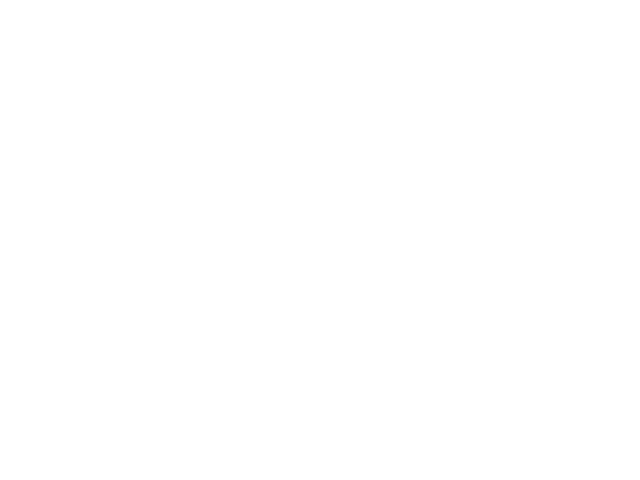

LinAlgError: SVD did not converge

In [53]:
plt.figure()
icelltype = 0
ialign = 0
plt.imshow((rs[icelltype][ialign]/np.sqrt((rs[icelltype][ialign]**2).sum(1).sum(1)[:,np.newaxis,np.newaxis])).mean(0))
rss = (rs[icelltype][ialign]/np.sqrt((rs[icelltype][ialign]**2).sum(1).sum(1)[:,np.newaxis,np.newaxis])).reshape(rs[icelltype][ialign].shape[0],-1)
u,s,v = np.linalg.svd(rss-rss.mean(0)[np.newaxis])

<IPython.core.display.Javascript object>


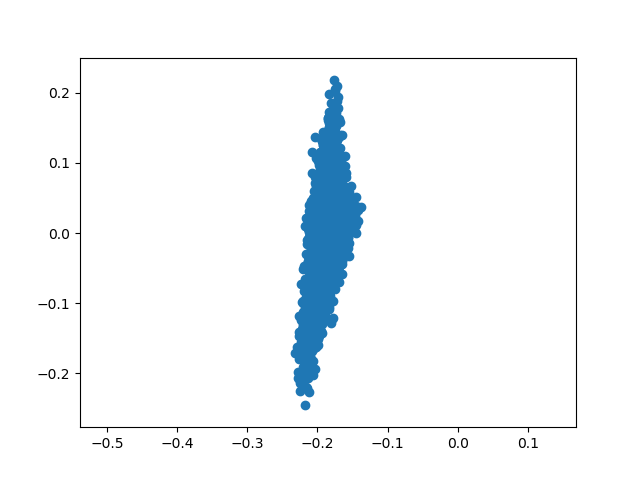

(-0.24301259264170857,
 -0.12670382960043067,
 -0.2767121547892544,
 0.25024608654156943)

In [91]:
plt.figure()
# a = np.random.rand(u.shape[0])
i1 = 0
i2 = 1
plt.scatter(u[:,i1]*s[i1],u[:,i2]*s[i2])
plt.axis('equal')
# %matplotlib notebook

<IPython.core.display.Javascript object>


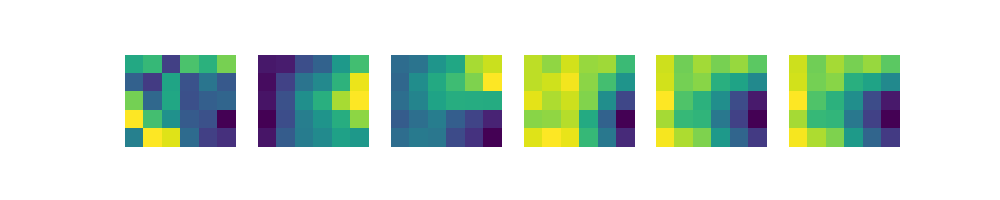

<IPython.core.display.Javascript object>


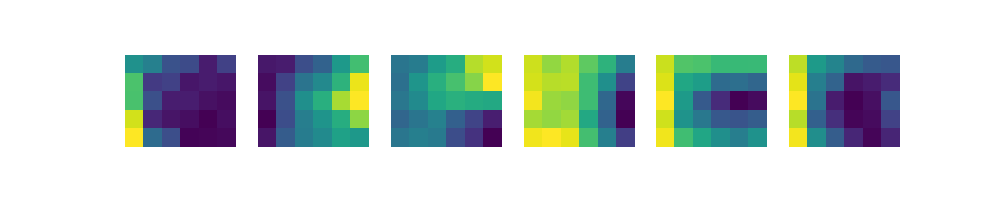

<IPython.core.display.Javascript object>


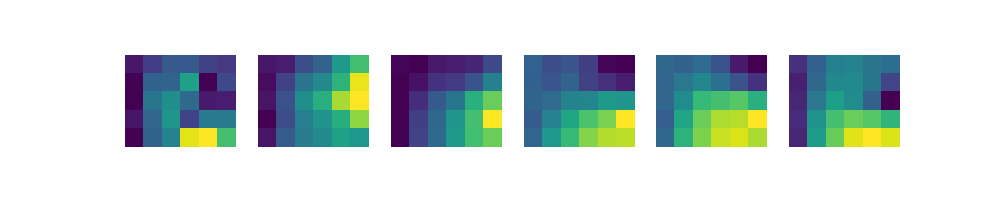

<IPython.core.display.Javascript object>


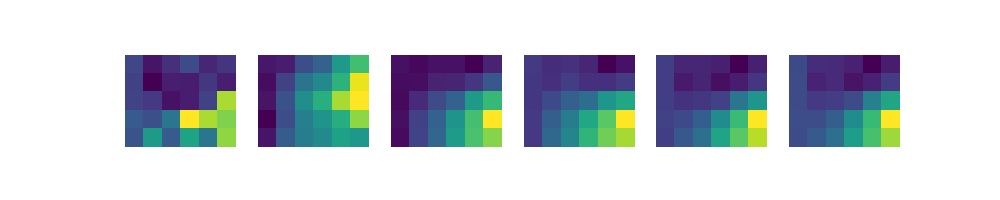

<IPython.core.display.Javascript object>


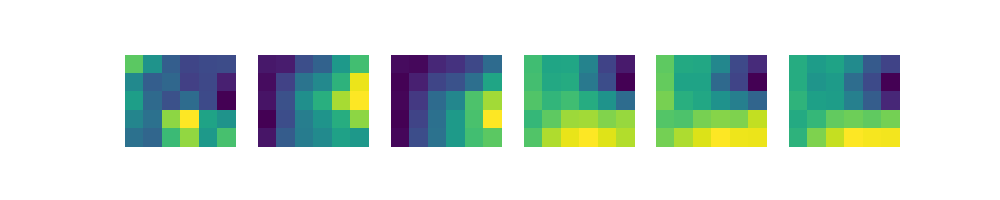

In [46]:
maxdim = 4
for iroi in range(5):
    plt.figure(figsize=(maxdim+1,1))
    plt.subplot(1,maxdim+2,1)
    plt.imshow(rss[iroi].reshape((nsize,ncontrast)))
    plt.axis('off')
    for imaxdim in range(maxdim+1):
        plt.subplot(1,maxdim+2,imaxdim+2)
        extra_var = np.array([(u[iroi,idim]*s[idim]*v[idim,:]).reshape((nsize,ncontrast)) for idim in range(imaxdim)])
        plt.imshow(rss.mean(0).reshape((nsize,ncontrast))+extra_var.sum(0))
        plt.axis('off')

<IPython.core.display.Javascript object>


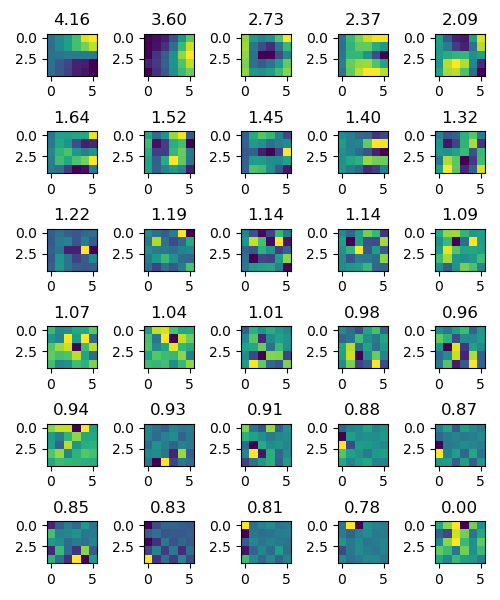

In [92]:
plt.figure(figsize=(5,6))
icelltype = 0
ialign = 0
plt.imshow(rs[icelltype][ialign].mean(0))
rss = Rs[icelltype][ialign].reshape(Rs[icelltype][ialign].shape[0],-1)
u,s,v = np.linalg.svd(rss-rss.mean(0)[np.newaxis])
for idim in range(30):
    plt.subplot(6,5,idim+1)
    plt.imshow(v[idim].reshape((5,6)))
    plt.title('%.2f'%s[idim])
plt.tight_layout()

In [93]:
def set_bound(bd,code,val=0):
    # set bounds to 0 where 0s occur in 'code'
    for iitem in range(len(bd)):
        bd[iitem][code[iitem]] = val

In [94]:
nN = 30
nS = 2
nP = 2
nQ = 4

# code for bounds: 0 , constrained to 0
# +/-1 , constrained to +/-1
# 2 , constrained to [0,inf)
# -2 , constrained to (-inf,0]
# 3 , unconstrained

Wmx_bounds = 3*np.ones((nP,nQ),dtype=int)
Wmx_bounds[0,1] = 0 # SSTs don't receive L4 input

Wsx_bounds = 3*np.ones(Wmx_bounds.shape) #Wmx_bounds.copy()*0 #np.zeros_like(Wmx_bounds)
Wsx_bounds[0,1] = 0

Wmy_bounds = 3*np.ones((nQ,nQ),dtype=int)
Wmy_bounds[0,:] = 2 # PCs are excitatory
Wmy_bounds[1:,:] = -2 # all the cell types except PCs are inhibitory
Wmy_bounds[1,1] = 0 # SSTs don't inhibit themselves
# Wmy_bounds[3,1] = 0 # PVs are allowed to inhibit SSTs, consistent with Hillel's unpublished results, but not consistent with Pfeffer et al.
Wmy_bounds[2,0] = 0 # VIPs don't inhibit L2/3 PCs. According to Pfeffer et al., only L5 PCs were found to get VIP inhibition

Wsy_bounds = 3*np.ones(Wmy_bounds.shape) #Wmy_bounds.copy()*0 #np.zeros_like(Wmy_bounds)
Wsy_bounds[1,1] = 0
Wsy_bounds[3,1] = 0 

s02_bounds = np.ones((nQ,))

k_bounds = 2*np.ones((nQ,))

kappa_bounds = 2*np.ones((1,))

X_bounds = np.array([np.array([2,1,2,1])]*nN)

Xp_bounds = np.array([np.array([3,1,3,1])]*nN)

Y_bounds = 2*np.ones((nN,nS*nQ))

Eta_bounds = 3*np.ones((nN,nS*nQ))

Xi_bounds = 3*np.ones((nN,nS*nQ))

In [95]:
# shapes = [(nP,nQ),(nQ,nQ),(nP,nQ),(nQ,nQ),(nQ,),(nQ,),(1,),(nN,nS*nP),(nN,nS*nQ),(nN,nS*nQ),(nN,nS*nQ)]
shapes = [(nP,nQ),(nQ,nQ),(nP,nQ),(nQ,nQ),(nQ,),(nQ,),(1,),(nN,nS*nP),(nN,nS*nP),(nN,nS*nQ),(nN,nS*nQ)]
#         Wmx,    Wmy,    Wsx,    Wsy,    s02,  k,    kappa,XX,       XXp,       YY,        Eta,       Xi

lb = [-np.inf*np.ones(shp) for shp in shapes]
ub = [np.inf*np.ones(shp) for shp in shapes]
bdlist = [Wmx_bounds,Wmy_bounds,Wsx_bounds,Wsy_bounds,s02_bounds,k_bounds,kappa_bounds,X_bounds,Xp_bounds,Eta_bounds,Xi_bounds]

set_bound(lb,[bd==0 for bd in bdlist],val=0)
set_bound(ub,[bd==0 for bd in bdlist],val=0)

set_bound(lb,[bd==2 for bd in bdlist],val=0)

set_bound(ub,[bd==-2 for bd in bdlist],val=0)

set_bound(lb,[bd==1 for bd in bdlist],val=1)
set_bound(ub,[bd==1 for bd in bdlist],val=1)

set_bound(lb,[bd==-1 for bd in bdlist],val=-1)
set_bound(ub,[bd==-1 for bd in bdlist],val=-1)

# for bd in [lb,ub]:
#     for ind in [2,3]:
#         bd[ind][:,1] = 0

# temporary for no variation expt.
# lb[2] = np.zeros_like(lb[2])
# lb[3] = np.zeros_like(lb[3])
# lb[4] = np.ones_like(lb[4])
# lb[5] = np.zeros_like(lb[5])
# ub[2] = np.zeros_like(ub[2])
# ub[3] = np.zeros_like(ub[3])
# ub[4] = np.ones_like(ub[4])
# ub[5] = np.ones_like(ub[5])
# temporary for no variation expt.
lb = np.concatenate([a.flatten() for a in lb])
ub = np.concatenate([b.flatten() for b in ub])
bounds = [(a,b) for a,b in zip(lb,ub)]

In [96]:
ncelltypes = len(Rs)

In [97]:
nS = 2
ndims = 5
Yhat = [None for ialign in range(nS)]
Xhat = [None for ialign in range(nS)]
Ypc_list = [None for ialign in range(nS)]
Xpc_list = [None for ialign in range(nS)]
for ialign in range(nS):
    y = [utils.columnize(Rs[icelltype][ialign])[:,np.newaxis] for icelltype in range(1,ncelltypes)]
    Ypc_list[ialign] = [None for icelltype in range(1,4)]
    for icelltype in range(1,4):
        rss = Rs[icelltype][ialign].reshape(Rs[icelltype][ialign].shape[0],-1)
        u,s,v = np.linalg.svd(rss-rss.mean(0)[np.newaxis])
        Ypc_list[ialign][icelltype-1] = [(s[idim],v[idim]) for idim in range(ndims)]
    Yhat[ialign] = np.concatenate(y,axis=1)
    x = utils.columnize(Rs[0][ialign])[:,np.newaxis]
    Xhat[ialign] = np.concatenate((x,np.ones_like(x)),axis=1)
    rss = Rs[0][ialign].reshape(Rs[0][ialign].shape[0],-1)
    u,s,v = np.linalg.svd(rss-rss.mean(0)[np.newaxis])
    Xpc_list[ialign] = [None for icelltype in range(2)]
    Xpc_list[ialign][0] = [(s[idim],v[idim]) for idim in range(ndims)]
    Xpc_list[ialign][1] = [(0,np.zeros((Xhat[0].shape[0],))) for idim in range(ndims)]
nN,nP = Xhat[0].shape
nQ = Yhat[0].shape[1]

In [98]:
def fit_W_variability_no_YY_relaxed(Xhat,Xpc_list,Yhat,Ypc_list,pop_rate_fn=None,pop_deriv_fn=None,neuron_rate_fn=None,W0list=None,bounds=None,niter=10,wt_dict=None,eta=0.1,compute_hessian=False):
    # X is (N,P), y is (N,Q). Finds wZx, wZy: (P,Q) + (Q,Q) weight matrices to explain Y as Y = f(Xwmx + Ywmy,Xwsx + Ywsy)
    # f is a static nonlinearity, given as a function
    
    Xpc_list = Xpc_list[0].copy()+Xpc_list[1].copy()
    Ypc_list = Ypc_list[0].copy()+Ypc_list[1].copy() # list of (npixels*Q) elements
    
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    fudge = 1e-4
    noise = 1
    
#     f_sq_second_argument = lambda a,b: pop_rate_fn(a,b**2)
    fprime_m = pop_deriv_fn #utils.fprime_miller_troyer #egrad(pop_rate_fn,0)
#     fprime_s = egrad(f_sq_second_argument,1)
#     fprime_s2 = egrad(pop_rate_fn,1)
    
    YYhat = np.concatenate(Yhat,axis=1)
    XXhat = np.concatenate(Xhat,axis=1)
#     print(XXhat)
    
    nS = len(Yhat)
    assert(nS==len(Xhat))
    nN,nP = Xhat[0].shape
    nQ = Yhat[0].shape[1]
    assert(nN==Yhat[0].shape[0])
    
    def add_key_val(d,key,val):
        if not key in d:
            d[key] = val
    
    if wt_dict is None:
        wt_dict = {}
    add_key_val(wt_dict,'celltypes',np.ones((1,nS*nQ)))
    add_key_val(wt_dict,'inputs',np.concatenate([np.array((1,0)) for i in range(nS)],axis=0)[np.newaxis,:])
    add_key_val(wt_dict,'stims',np.ones((nN,1)))
    add_key_val(wt_dict,'X',1)
    add_key_val(wt_dict,'Y',1)
    add_key_val(wt_dict,'Eta',1)
    add_key_val(wt_dict,'Xi',1)
    add_key_val(wt_dict,'barrier',1)
    
    wtCell = wt_dict['celltypes']
    wtInp = wt_dict['inputs']
    wtStim = wt_dict['stims']
    wtX = wt_dict['X']
    wtY = wt_dict['Y']
    wtEta = wt_dict['Eta']
    wtXi = wt_dict['Xi']
    barrier_wt = wt_dict['barrier']
    
    first = True
        
#     lower_bound = np.array([b[0] for b in bounds])
#     upper_bound = np.array([b[1] for b in bounds])
        
    # Yhat is all measured tuning curves, Y is the averages of the model tuning curves
    def parse_W(W):
        # Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,YY,Eta,Xi
        shapes = [(nP,nQ),(nQ,nQ),(nP,nQ),(nQ,nQ),(nQ,),(nQ,),(1,),(nN,nS*nP),(nN,nS*nP),(nN,nS*nQ),(nN,nS*nQ)]
        Ws = parse_thing(W,shapes)
        return Ws
    
    def parse_thing(V,shapes):
        for shape in shapes:
            if type(shape) is int:
                shape = (shape,)
        sizes = [np.prod(shape) for shape in shapes]
        sofar = 0
        outputs = []
        for size,shape in zip(sizes,shapes):
            if size > 1:
                new_element = V[sofar:sofar+size].reshape(shape)
            else:
                new_element = V[sofar] # if just a float
            outputs.append(new_element)
            sofar = sofar + size
        return outputs
    
    def unparse_W(*Ws):
        return np.concatenate([ww.flatten() for ww in Ws])
    
    def normalize(arr):
        arrsum = arr.sum(1)
        well_behaved = (arrsum>0)[:,np.newaxis]
        arrnorm = well_behaved*arr/arrsum[:,np.newaxis] + (~well_behaved)*np.ones_like(arr)/arr.shape[1]
        return arrnorm
    
    def gen_Weight(W,K,kappa):
        WW0 = np.concatenate((W,W*K[np.newaxis,:]),axis=1)
        WW1 = np.concatenate((W*K[np.newaxis,:]*kappa,W),axis=1)
        WW = np.concatenate((WW0,WW1),axis=0)
        return WW
    
    def inner_product_(a,b):
        return np.sum(a*b,0)
#             if len(a.shape)==1:
#                 return a*b
#             else:
#                 return (a*b).sum(1)
    
    def compute_tr_siginv2_sig1(stim_deriv,noise,pc_list):
            # pc_list a list of PCs of the covariance matrix, each a tuple of (sigma,normed vector)
        tot = 0
        for icelltype in range(stim_deriv.shape[1]):
#             sigma2 = np.linalg.norm(stim_deriv[:,icelltype])
            sigma2 = np.sum(stim_deriv[:,icelltype]**2)
#                 inner_prod = np.sum([pc[0]**2*sigma2**2*np.inner(stim_deriv[:,icelltype]/sigma2,pc[1]) for pc in pc_list[icelltype]])
            if sigma2>0:
                inner_prod = np.sum([pc[0]**2*np.sqrt(sigma2)*inner_product_(stim_deriv[:,icelltype],pc[1]) for pc in pc_list[icelltype]])
            else:
                inner_prod = 0 #np.zeros((nN,))
#                 print(inner_prod.sum())
#                 print(-1/noise/(noise + sigma2**2))
            tot = tot - 1/noise/(noise + sigma2)*inner_prod #.sum()
        return tot
        
    def compute_log_det_sig2(stim_deriv,noise):
#             sigma2 = np.linalg.norm(stim_deriv)
        sigma2 = inner_product_(stim_deriv,stim_deriv) #np.sum(stim_deriv**2,0)
        return np.sum([np.log(s2+noise) for s2 in sigma2])
        
    def compute_mahalanobis_dist(stim_deriv,noise,mu_data,mu_model):
#             siginv2 = compute_siginv(stim_deriv,noise)
            # in the case where stim_deriv = 0 (no variability model) only the noise (sqerror) term contributes
        mu_dist = mu_model-mu_data
        inner_prod = inner_product_(stim_deriv,mu_dist) #np.einsum(stim_deriv,mu_dist,'ik,jk->ij')
#             sigma2 = np.linalg.norm(stim_deriv)
        sigma2 = inner_product_(stim_deriv,stim_deriv) #np.sum(stim_deriv**2,0)
#             print(mu_dist)
#             print(sigma2)
#             print(inner_prod)
#             print((inner_prod**2).sum())
#             print(-1/noise/(noise+sigma2**2))
        noise_term = 1/noise*np.sum(inner_product_(mu_dist,mu_dist)) #np.inner(mu_dist,mu_dist)
        cov_term = np.sum([-1/noise/(noise+s2)*np.sum(ip**2) for s2,ip in zip(sigma2,inner_prod)])
#             print([a for a in (noise_term,cov_term)])
        return noise_term + cov_term
        
    def compute_kl_divergence(stim_deriv,noise,mu_data,mu_model,pc_list):
            # omitting a few terms: - d - log(sig1) # where d is the dimensionality
            # in the case where stim_deriv = 0 (no variability model) only the noise (sqerror) 
            # term in mahalanobis_dist contributes
        log_det = compute_log_det_sig2(stim_deriv,noise)
        tr_sig_quotient = compute_tr_siginv2_sig1(stim_deriv,noise,pc_list)
        maha_dist = compute_mahalanobis_dist(stim_deriv,noise,mu_data,mu_model)
#             print('3 Parts of KL divergence: ')
#             for a in [log_det,tr_sig_quotient,maha_dist]:
#                 print(a)
#             print([a for a in [log_det,tr_sig_quotient,maha_dist]])
        return 0.5*(log_det + tr_sig_quotient + maha_dist)
#             return 0.5*(tr_sig_quotient)
    
    def take_one_step(W0,eta,compute_hessian=False):
        
#         print(first)
        # see derivations on pg. 77 of Notes VIII
#         def compute_siginv(stim_deriv,noise):
#             # stim_deriv (nN,), noise a scalar, giving the variance of measurement noise
#             # Sherman-Morrison formula to yield inv(sigma^2*eye + uuT)
#             uuT = np.outer(stim_deriv,stim_deriv)
#             uTu = np.inner(stim_deriv,stim_deriv)
#             siginv = 1/noise*(np.eye(nN) - uuT/(uTu + noise))
#             return siginv
        
#         def inner_product_(a,b):
#             return np.sum(a*b,0)
# #             if len(a.shape)==1:
# #                 return a*b
# #             else:
# #                 return (a*b).sum(1)
    
#         def compute_tr_siginv2_sig1(stim_deriv,noise,pc_list):
#             # pc_list a list of PCs of the covariance matrix, each a tuple of (sigma,normed vector)
#             tot = 0
#             for icelltype in range(stim_deriv.shape[1]):
# #                 sigma2 = np.linalg.norm(stim_deriv[:,icelltype])
#                 sigma2 = np.sum(stim_deriv[:,icelltype]**2)
# #                 inner_prod = np.sum([pc[0]**2*sigma2**2*np.inner(stim_deriv[:,icelltype]/sigma2,pc[1]) for pc in pc_list[icelltype]])
#                 if sigma2>0:
#                     inner_prod = np.sum([pc[0]**2*np.sqrt(sigma2)*inner_product_(stim_deriv[:,icelltype],pc[1]) for pc in pc_list[icelltype]])
#                 else:
#                     inner_prod = 0 #np.zeros((nN,))
# #                 print(inner_prod.sum())
# #                 print(-1/noise/(noise + sigma2**2))
#                 tot = tot - 1/noise/(noise + sigma2)*inner_prod #.sum()
#             return tot
        
#         def compute_log_det_sig2(stim_deriv,noise):
# #             sigma2 = np.linalg.norm(stim_deriv)
#             sigma2 = inner_product_(stim_deriv,stim_deriv) #np.sum(stim_deriv**2,0)
#             return np.sum([np.log(s2+noise) for s2 in sigma2])
        
#         def compute_mahalanobis_dist(stim_deriv,noise,mu_data,mu_model):
# #             siginv2 = compute_siginv(stim_deriv,noise)
#             # in the case where stim_deriv = 0 (no variability model) only the noise (sqerror) term contributes
#             mu_dist = mu_model-mu_data
#             inner_prod = inner_product_(stim_deriv,mu_dist) #np.einsum(stim_deriv,mu_dist,'ik,jk->ij')
# #             sigma2 = np.linalg.norm(stim_deriv)
#             sigma2 = inner_product_(stim_deriv,stim_deriv) #np.sum(stim_deriv**2,0)
# #             print(mu_dist)
# #             print(sigma2)
# #             print(inner_prod)
# #             print((inner_prod**2).sum())
# #             print(-1/noise/(noise+sigma2**2))
#             noise_term = 1/noise*np.sum(inner_product_(mu_dist,mu_dist)) #np.inner(mu_dist,mu_dist)
#             cov_term = np.sum([-1/noise/(noise+s2)*np.sum(ip**2) for s2,ip in zip(sigma2,inner_prod)])
# #             print([a for a in (noise_term,cov_term)])
#             return noise_term + cov_term
        
#         def compute_kl_divergence(stim_deriv,noise,mu_data,mu_model,pc_list):
#             # omitting a few terms: - d - log(sig1) # where d is the dimensionality
#             # in the case where stim_deriv = 0 (no variability model) only the noise (sqerror) 
#             # term in mahalanobis_dist contributes
#             log_det = compute_log_det_sig2(stim_deriv,noise)
#             tr_sig_quotient = compute_tr_siginv2_sig1(stim_deriv,noise,pc_list)
#             maha_dist = compute_mahalanobis_dist(stim_deriv,noise,mu_data,mu_model)
# #             print('3 Parts of KL divergence: ')
# #             for a in [log_det,tr_sig_quotient,maha_dist]:
# #                 print(a)
# #             print([a for a in [log_det,tr_sig_quotient,maha_dist]])
#             return 0.5*(log_det + tr_sig_quotient + maha_dist)
# #             return 0.5*(tr_sig_quotient)
        
        def compute_fprime_(Eta,Xi,s02):
#             Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,YY,Eta,Xi = parse_W(W)
#             WWx,WWy = [gen_Weight(W,k,kappa) for W in [Wx,Wy]]
            return fprime_m(Eta,Xi**2+np.concatenate((s02,s02),axis=0))*Xi

        def compute_f_(Eta,Xi,s02):
            return pop_rate_fn(Eta,Xi**2+np.concatenate((s02,s02),axis=0))
        
        def minusLW(W):
            def u_fn(XX,YY,Wx,Wy,k,kappa):
                WWx,WWy = [gen_Weight(W,k,kappa) for W in [Wx,Wy]]
                return XX @ WWx + YY @ WWy
            
            def compute_sq_error(a,b,wt):
                return np.sum(wt*(a-b)**2)
            
            def compute_kl_error(mu_data,pc_list,mu_model,fprimeval,wt):
                # how to model variability in X?
                kl = compute_kl_divergence(fprimeval,noise,mu_data,mu_model,pc_list)
#                 print(kl.shape)
                return kl #wt*kl
                # principled way would be to use 1/wt for noise term. Should add later.
            
            Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = parse_W(W)
            
            fval = compute_f_(Eta,Xi,s02) # Eta the mean input per cell, Xi the stdev. input per cell, s02 the baseline variability in input
            fprimeval = compute_fprime_(Eta,Xi,s02)
#             print(fprimeval)
            
            Xterm = compute_kl_error(XXhat,Xpc_list,XX,XXp,wtStim*wtInp) # XX the modeled input layer (L4)
            Yterm = compute_kl_error(YYhat,Ypc_list,fval,fprimeval,wtStim*wtCell) # fval the modeled output layer (L2/3)
            Etaterm = compute_sq_error(Eta,u_fn(XX,fval,Wmx,Wmy,k,kappa),wtStim*wtCell) # magnitude of fudge factor in mean input
            Xiterm = compute_sq_error(Xi,u_fn(XX,fval,Wsx,Wsy,k,kappa),wtStim*wtCell) # magnitude of fudge factor in input variability
            # returns value float
#             print([a for a in [Xterm,Yterm,Etaterm,Xiterm]])
#             print('Four terms:')
#             for a in [Xterm,Yterm,Etaterm,Xiterm]:
#                 print(a)
            return wtX*Xterm + wtY*Yterm + wtEta*Etaterm + wtXi*Xiterm
    
        def minusdLdW(W): 
            # returns value (R,)
            # sum in first dimension: (N,1) times (N,1) times (N,P)
#             return jacobian(minusLW)(W)
            return grad(minusLW)(W)
        
        def fix_violations(w,bounds):
            lb = np.array([b[0] for b in bounds])
            ub = np.array([b[1] for b in bounds])
            lb_violation = w<lb
            ub_violation = w>ub
            w[lb_violation] = lb[lb_violation]
            w[ub_violation] = ub[ub_violation]
            return w,lb_violation,ub_violation
        
        def sorted_r_eigs(w):
            drW,prW = np.linalg.eig(w)
            srtinds = np.argsort(drW)
            return drW[srtinds],prW[:,srtinds]
    
        def compute_eig_penalty_(Wmy,k0,kappa):
            # need to fix this to reflect addition of kappa argument
            Wsquig = gen_Weight(Wmy,k0,kappa)
#             npixels = 2
            drW,prW = sorted_r_eigs(Wsquig - np.eye(nQ*nS))
    #         dlW,plW = sorted_r_eigs(W0my.T - np.eye(nQ))
            plW = np.linalg.inv(prW)
#             print('stability: %.5f' % np.real(drW[-1]))
#             assert(np.real(drW[-1])<-1e-2) # most positive real and imag parts in last position
            eig_outer_all = [np.real(np.outer(plW[:,k],prW[k,:])) for k in range(nS*nQ)]
            eig_penalty_size_all = [barrier_wt/np.abs(np.real(drW[k])) for k in range(nS*nQ)]
            eig_penalty_dir_w = [eig_penalty_size*((eig_outer[:nQ,:nQ] + eig_outer[nQ:,nQ:]) + k0[np.newaxis,:]*(eig_outer[:nQ,nQ:] + kappa*eig_outer[nQ:,:nQ])) for eig_outer,eig_penalty_size in zip(eig_outer_all,eig_penalty_size_all)]
            eig_penalty_dir_k = [eig_penalty_size*((eig_outer[:nQ,nQ:] + eig_outer[nQ:,:nQ]*kappa)*W0my).sum(0) for eig_outer,eig_penalty_size in zip(eig_outer_all,eig_penalty_size_all)]
            eig_penalty_dir_kappa = [eig_penalty_size*(eig_outer[nQ:,:nQ]*k0[np.newaxis,:]*W0my).sum().reshape((1,)) for eig_outer,eig_penalty_size in zip(eig_outer_all,eig_penalty_size_all)]
#             for direction in [eig_penalty_dir_w,eig_penalty_dir_k,eig_penalty_dir_kappa]:
#                 direction = np.array(direction).sum(0)
            eig_penalty_dir_w = np.array(eig_penalty_dir_w).sum(0)
            eig_penalty_dir_k = np.array(eig_penalty_dir_k).sum(0)
            eig_penalty_dir_kappa = np.array(eig_penalty_dir_kappa).sum(0)
#             assert(True==False)
            # Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = parse_W(W)
#             print(eig_penalty_dir_w)
            return eig_penalty_dir_w,eig_penalty_dir_k,eig_penalty_dir_kappa
        
        def compute_eig_penalty(W):
            W0mx,W0my,W0sx,W0sy,s020,k0,kappa0,XX0,XXp0,Eta0,Xi0 = parse_W(W)
            eig_penalty_dir_w,eig_penalty_dir_k,eig_penalty_dir_kappa = compute_eig_penalty_(W0my,k0,kappa0)
            eig_penalty_W = unparse_W(np.zeros_like(W0mx),eig_penalty_dir_w,np.zeros_like(W0sx),np.zeros_like(W0sy),np.zeros_like(s020),eig_penalty_dir_k,eig_penalty_dir_kappa,np.zeros_like(XX0),np.zeros_like(XXp0),np.zeros_like(Eta0),np.zeros_like(Xi0))
#             assert(True==False)
            return eig_penalty_W
        
        deriv = minusdLdW(W0) #+ compute_eig_penalty(W0)
#         print(minusLW(W0))
#         W0mx,W0my,W0sx,W0sy,s020,k0,kappa0,XX0,XXp0,Eta0,Xi0 = parse_W(np.isnan(deriv))
        
#         assert(True==False)
                
        W1 = W0 - eta*deriv
        
        W1,lb_violation,ub_violation = fix_violations(W1,bounds)
        loss = minusLW(W1)
#         assert(True==False)
        if compute_hessian:
            gr = grad(minusLW)(W1)
            hess = hessian(minusLW)(W1)
        else:
            gr = None
            hess = None
        
#         W0mx,W0my,W0sx,W0sy,s020,k0,kappa0,XX0,XXp0,Eta0,Xi0 = parse_W(W1)
        
        return W1,loss,gr,hess
    
    W0mx,W0my,W0sx,W0sy,s020,k0,kappa0,XX0,XXp0,Eta0,Xi0 = [w.copy() for w in W0list]
    
    Wmx   = np.zeros((niter+1,)+W0mx.shape)
    Wmy   = np.zeros((niter+1,)+W0my.shape)
    Wsx   = np.zeros((niter+1,)+W0sx.shape)
    Wsy   = np.zeros((niter+1,)+W0sy.shape)
    s02   = np.zeros((niter+1,)+s020.shape)
    k     = np.zeros((niter+1,)+k0.shape)
    kappa = np.zeros((niter+1,)+kappa0.shape)
    XX    = np.zeros((niter+1,)+XX0.shape)
    XXp   = np.zeros((niter+1,)+XXp0.shape)
    Eta   = np.zeros((niter+1,)+Eta0.shape)
    Xi    = np.zeros((niter+1,)+Xi0.shape)
    loss  = np.zeros((niter+1,))
    loss[0] = np.nan
        
#     print(W0.shape)
    
    diagnostics = [None]*(niter+1)
    iiter = 0
    thisW = Wmx[iiter],Wmy[iiter],Wsx[iiter],Wsy[iiter],s02[iiter],k[iiter],kappa[iiter],XX[iiter],XXp[iiter],Eta[iiter],Xi[iiter]
    thisW = [x.copy() for x in [W0mx,W0my,W0sx,W0sy,s020,k0,kappa0,XX0,XXp0,Eta0,Xi0]]
    W0 = unparse_W(*thisW).copy()
    
#     assert(True==False)
    
    if not isinstance(eta,np.ndarray):
        this_eta = eta*np.ones((niter+1,))
    else:
        this_eta = eta.copy()
        
    for iiter in range(1,niter+1):
#         print(iiter)
        if (iiter==niter) and compute_hessian:
            W1,loss[iiter],gr,hess = take_one_step(W0,this_eta[iiter],compute_hessian=True)
        else:
            W1,loss[iiter],gr,hess = take_one_step(W0,this_eta[iiter],compute_hessian=False)
        Wmx[iiter],Wmy[iiter],Wsx[iiter],Wsy[iiter],s02[iiter],k[iiter],kappa[iiter],XX[iiter],XXp[iiter],Eta[iiter],Xi[iiter] = [w.copy() for w in parse_W(W1)]
        if np.remainder(iiter,100)==0:
            print('loss: %.7f' % loss[iiter])
            Wsquig = gen_Weight(Wmy[iiter],k[iiter],kappa[iiter])
            drW,prW = sorted_r_eigs(Wsquig - np.eye(nQ*nS))
            print('stability: %.5f' % np.real(drW[-1]))
#             assert(np.real(drW[-1])<-1e-2)
        #         thisW = W1.copy()
        W0 = W1.copy()
        first = False
        
    Wt = [Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi]
    
    return Wt,loss,gr,hess



In [99]:
# s2p_output_to_opto_corrected_rois('/home/mossing/data1/suite2P/results/M0607/200115/2_4_5_6/','datafold','/home/mossing/modulation/matfiles/'); 

In [116]:
def fit_W_variability_relaxed_simulation_l_bfgs(Xhat,Xpc_list,Yhat,Ypc_list,pop_rate_fn=None,pop_deriv_fn=None,neuron_rate_fn=None,W0list=None,bounds=None,dt=1e-1,perturbation_size=5e-2,niter=1,wt_dict=None,eta=0.1,compute_hessian=False,l2_penalty=1.0):
    # X is (N,P), y is (N,Q). Finds wZx, wZy: (P,Q) + (Q,Q) weight matrices to explain Y as Y = f(Xwmx + Ywmy,Xwsx + Ywsy)
    # f is a static nonlinearity, given as a function
    
    Xpc_list = Xpc_list[0].copy()+Xpc_list[1].copy()
    Ypc_list = Ypc_list[0].copy()+Ypc_list[1].copy() # list of (npixels*Q) elements
    
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    fudge = 1e-4
    noise = 1
    
#     f_sq_second_argument = lambda a,b: pop_rate_fn(a,b**2)
    fprime_m = pop_deriv_fn #utils.fprime_miller_troyer #egrad(pop_rate_fn,0)
#     fprime_s = egrad(f_sq_second_argument,1)
#     fprime_s2 = egrad(pop_rate_fn,1)
    
    YYhat = np.concatenate(Yhat,axis=1)
    XXhat = np.concatenate(Xhat,axis=1)
#     print(XXhat)
    
    nS = len(Yhat)
    assert(nS==len(Xhat))
    nN,nP = Xhat[0].shape
    nQ = Yhat[0].shape[1]
    assert(nN==Yhat[0].shape[0])
    
    def add_key_val(d,key,val):
        if not key in d:
            d[key] = val
    
    if wt_dict is None:
        wt_dict = {}
    add_key_val(wt_dict,'celltypes',np.ones((1,nS*nQ)))
    add_key_val(wt_dict,'inputs',np.concatenate([np.array((1,0)) for i in range(nS)],axis=0)[np.newaxis,:])
    add_key_val(wt_dict,'stims',np.ones((nN,1)))
    add_key_val(wt_dict,'X',1)
    add_key_val(wt_dict,'Y',1)
    add_key_val(wt_dict,'Eta',1)
    add_key_val(wt_dict,'Xi',1)
    add_key_val(wt_dict,'barrier',1)
    
    wtCell = wt_dict['celltypes']
    wtInp = wt_dict['inputs']
    wtStim = wt_dict['stims']
    wtX = wt_dict['X']
    wtY = wt_dict['Y']
    wtEta = wt_dict['Eta']
    wtXi = wt_dict['Xi']
    barrier_wt = wt_dict['barrier']
    
    first = True
    
#     perturbation = perturbation_size*np.random.randn(*Eta.shape)
        
#     lower_bound = np.array([b[0] for b in bounds])
#     upper_bound = np.array([b[1] for b in bounds])
        
    # Yhat is all measured tuning curves, Y is the averages of the model tuning curves
    def parse_W(W):
        # Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,YY,Eta,Xi
        shapes = [(nP,nQ),(nQ,nQ),(nP,nQ),(nQ,nQ),(nQ,),(nQ,),(1,),(nN,nS*nP),(nN,nS*nP),(nN,nS*nQ),(nN,nS*nQ)]
        Ws = parse_thing(W,shapes)
        return Ws
    
    def parse_thing(V,shapes):
        for shape in shapes:
            if type(shape) is int:
                shape = (shape,)
        sizes = [np.prod(shape) for shape in shapes]
        sofar = 0
        outputs = []
        for size,shape in zip(sizes,shapes):
            if size > 1:
                new_element = V[sofar:sofar+size].reshape(shape)
            else:
                new_element = V[sofar] # if just a float
            outputs.append(new_element)
            sofar = sofar + size
        return outputs
    
    def unparse_W(*Ws):
        return np.concatenate([ww.flatten() for ww in Ws])
    
    def normalize(arr):
        arrsum = arr.sum(1)
        well_behaved = (arrsum>0)[:,np.newaxis]
        arrnorm = well_behaved*arr/arrsum[:,np.newaxis] + (~well_behaved)*np.ones_like(arr)/arr.shape[1]
        return arrnorm
    
    def gen_Weight(W,K,kappa):
        WW0 = np.concatenate((W,W*K[np.newaxis,:]),axis=1)
        WW1 = np.concatenate((W*K[np.newaxis,:]*kappa,W),axis=1)
        WW = np.concatenate((WW0,WW1),axis=0)
        return WW
    
    def inner_product_(a,b):
        return np.sum(a*b,0)
#             if len(a.shape)==1:
#                 return a*b
#             else:
#                 return (a*b).sum(1)
    
    def compute_tr_siginv2_sig1(stim_deriv,noise,pc_list):
            # pc_list a list of PCs of the covariance matrix, each a tuple of (sigma,normed vector)
        tot = 0
        for icelltype in range(stim_deriv.shape[1]):
#             sigma2 = np.linalg.norm(stim_deriv[:,icelltype])
            sigma2 = np.sum(stim_deriv[:,icelltype]**2)
#                 inner_prod = np.sum([pc[0]**2*sigma2**2*np.inner(stim_deriv[:,icelltype]/sigma2,pc[1]) for pc in pc_list[icelltype]])
            if sigma2>0:
                inner_prod = np.sum([pc[0]**2*np.sqrt(sigma2)*inner_product_(stim_deriv[:,icelltype],pc[1]) for pc in pc_list[icelltype]])
            else:
                inner_prod = 0 #np.zeros((nN,))
#                 print(inner_prod.sum())
#                 print(-1/noise/(noise + sigma2**2))
            tot = tot - 1/noise/(noise + sigma2)*inner_prod #.sum()
        return tot
        
    def compute_log_det_sig2(stim_deriv,noise):
#             sigma2 = np.linalg.norm(stim_deriv)
        sigma2 = inner_product_(stim_deriv,stim_deriv) #np.sum(stim_deriv**2,0)
        return np.sum([np.log(s2+noise) for s2 in sigma2])
        
    def compute_mahalanobis_dist(stim_deriv,noise,mu_data,mu_model):
#             siginv2 = compute_siginv(stim_deriv,noise)
            # in the case where stim_deriv = 0 (no variability model) only the noise (sqerror) term contributes
        mu_dist = mu_model-mu_data
        inner_prod = inner_product_(stim_deriv,mu_dist) #np.einsum(stim_deriv,mu_dist,'ik,jk->ij')
#             sigma2 = np.linalg.norm(stim_deriv)
        sigma2 = inner_product_(stim_deriv,stim_deriv) #np.sum(stim_deriv**2,0)
#             print(mu_dist)
#             print(sigma2)
#             print(inner_prod)
#             print((inner_prod**2).sum())
#             print(-1/noise/(noise+sigma2**2))
        noise_term = 1/noise*np.sum(inner_product_(mu_dist,mu_dist)) #np.inner(mu_dist,mu_dist)
        cov_term = np.sum([-1/noise/(noise+s2)*np.sum(ip**2) for s2,ip in zip(sigma2,inner_prod)])
#             print([a for a in (noise_term,cov_term)])
        return noise_term + cov_term
        
    def compute_kl_divergence(stim_deriv,noise,mu_data,mu_model,pc_list):
            # omitting a few terms: - d - log(sig1) # where d is the dimensionality
            # in the case where stim_deriv = 0 (no variability model) only the noise (sqerror) 
            # term in mahalanobis_dist contributes
        log_det = compute_log_det_sig2(stim_deriv,noise)
        print('log_det: '+str(log_det))
        tr_sig_quotient = compute_tr_siginv2_sig1(stim_deriv,noise,pc_list)
        print('tr_sig_quotient: '+str(tr_sig_quotient))
        maha_dist = compute_mahalanobis_dist(stim_deriv,noise,mu_data,mu_model)
        print('maha_dist: '+str(maha_dist))
#             print('3 Parts of KL divergence: ')
#             for a in [log_det,tr_sig_quotient,maha_dist]:
#                 print(a)
#             print([a for a in [log_det,tr_sig_quotient,maha_dist]])
        return 0.5*(log_det + tr_sig_quotient + maha_dist)
#             return 0.5*(tr_sig_quotient)
    
    def optimize(W0,compute_hessian=False):
        
        def compute_fprime_(Eta,Xi,s02):
#             Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,YY,Eta,Xi = parse_W(W)
#             WWx,WWy = [gen_Weight(W,k,kappa) for W in [Wx,Wy]]
            return fprime_m(Eta,Xi**2+np.concatenate((s02,s02),axis=0))*Xi

        def compute_f_(Eta,Xi,s02):
            return pop_rate_fn(Eta,Xi**2+np.concatenate((s02,s02),axis=0))
        
        def compute_f_fprime_t_(W,perturbation):
            Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = parse_W(W)
            fval = compute_f_(Eta,Xi,s02)
            resEta = Eta - u_fn(XX,fval,Wmx,Wmy,k,kappa)
            resXi  = Xi - u_fn(XX,fval,Wsx,Wsy,k,kappa)
            YY = fval + perturbation
            def dYYdt(YY,Eta1,Xi1):
                return -YY + compute_f_(Eta1,Xi1,s02)
            for t in range(niter):
                Eta1 = resEta + u_fn(XX,YY,Wmx,Wmy,k,kappa)
                Xi1 = resXi + u_fn(XX,YY,Wmx,Wmy,k,kappa)
                YY = YY + dt*dYYdt(YY,Eta1,Xi1)
                
            YYprime = compute_fprime_(Eta1,Xi1,s02)
            
            return YY,YYprime
        
        def compute_f_fprime_t_avg_(W,perturbation,burn_in=0.5):
            Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = parse_W(W)
            fval = compute_f_(Eta,Xi,s02)
            resEta = Eta - u_fn(XX,fval,Wmx,Wmy,k,kappa)
            resXi  = Xi - u_fn(XX,fval,Wsx,Wsy,k,kappa)
            YY = fval + perturbation
            YYmean = np.zeros_like(Eta)
            YYprimemean = np.zeros_like(Eta)
            def dYYdt(YY,Eta1,Xi1):
                return -YY + compute_f_(Eta1,Xi1,s02)
            for t in range(niter):
                Eta1 = resEta + u_fn(XX,YY,Wmx,Wmy,k,kappa)
                Xi1 = resXi + u_fn(XX,YY,Wmx,Wmy,k,kappa)
                YY = YY + dt*dYYdt(YY,Eta1,Xi1)
                if t>niter*burn_in:
                    YYprime = compute_fprime_(Eta1,Xi1,s02)
                    YYmean = YYmean + 1/niter/burn_in*YY
                    YYprimemean = YYprimemean + 1/niter/burn_in*YYprime
                
            return YYmean,YYprimemean
        
        def u_fn(XX,YY,Wx,Wy,k,kappa):
            WWx,WWy = [gen_Weight(W,k,kappa) for W in [Wx,Wy]]
            return XX @ WWx + YY @ WWy
                        
        def minusLW(W):
            
            def compute_sq_error(a,b,wt):
                return np.sum(wt*(a-b)**2)
            
            def compute_kl_error(mu_data,pc_list,mu_model,fprimeval,wt):
                # how to model variability in X?
                kl = compute_kl_divergence(fprimeval,noise,mu_data,mu_model,pc_list)
#                 print(kl.shape)
                return kl #wt*kl
                # principled way would be to use 1/wt for noise term. Should add later.
            
            Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = parse_W(W)
            
            perturbation = perturbation_size*np.random.randn(*Eta.shape)
            
#             fval,fprimeval = compute_f_fprime_t_(W,perturbation) # Eta the mean input per cell, Xi the stdev. input per cell, s02 the baseline variability in input
            fval,fprimeval = compute_f_fprime_t_avg_(W,perturbation) # Eta the mean input per cell, Xi the stdev. input per cell, s02 the baseline variability in input
#             print(fprimeval)
            
            Xterm = compute_kl_error(XXhat,Xpc_list,XX,XXp,wtStim*wtInp) # XX the modeled input layer (L4)
            Yterm = compute_kl_error(YYhat,Ypc_list,fval,fprimeval,wtStim*wtCell) # fval the modeled output layer (L2/3)
            Etaterm = compute_sq_error(Eta,u_fn(XX,fval,Wmx,Wmy,k,kappa),wtStim*wtCell) # magnitude of fudge factor in mean input
            Xiterm = compute_sq_error(Xi,u_fn(XX,fval,Wsx,Wsy,k,kappa),wtStim*wtCell) # magnitude of fudge factor in input variability
            # returns value float
#             print([a for a in [Xterm,Yterm,Etaterm,Xiterm]])
#             print('Four terms:')
#             for a in [Xterm,Yterm,Etaterm,Xiterm]:
#                 print(a)
            return wtX*Xterm + wtY*Yterm + wtEta*Etaterm + wtXi*Xiterm
    
        def minusdLdW(W): 
            # returns value (R,)
            # sum in first dimension: (N,1) times (N,1) times (N,P)
#             return jacobian(minusLW)(W)
            return grad(minusLW)(W)
        
        def fix_violations(w,bounds):
            lb = np.array([b[0] for b in bounds])
            ub = np.array([b[1] for b in bounds])
            lb_violation = w<lb
            ub_violation = w>ub
            w[lb_violation] = lb[lb_violation]
            w[ub_violation] = ub[ub_violation]
            return w,lb_violation,ub_violation
        
        def sorted_r_eigs(w):
            drW,prW = np.linalg.eig(w)
            srtinds = np.argsort(drW)
            return drW[srtinds],prW[:,srtinds]
    
        def compute_eig_penalty_(Wmy,k0,kappa):
            # need to fix this to reflect addition of kappa argument
            Wsquig = gen_Weight(Wmy,k0,kappa)
#             npixels = 2
            drW,prW = sorted_r_eigs(Wsquig - np.eye(nQ*nS))
    #         dlW,plW = sorted_r_eigs(W0my.T - np.eye(nQ))
            plW = np.linalg.inv(prW)
#             print('stability: %.5f' % np.real(drW[-1]))
#             assert(np.real(drW[-1])<-1e-2) # most positive real and imag parts in last position
            eig_outer_all = [np.real(np.outer(plW[:,k],prW[k,:])) for k in range(nS*nQ)]
            eig_penalty_size_all = [barrier_wt/np.abs(np.real(drW[k])) for k in range(nS*nQ)]
            eig_penalty_dir_w = [eig_penalty_size*((eig_outer[:nQ,:nQ] + eig_outer[nQ:,nQ:]) + k0[np.newaxis,:]*(eig_outer[:nQ,nQ:] + kappa*eig_outer[nQ:,:nQ])) for eig_outer,eig_penalty_size in zip(eig_outer_all,eig_penalty_size_all)]
            eig_penalty_dir_k = [eig_penalty_size*((eig_outer[:nQ,nQ:] + eig_outer[nQ:,:nQ]*kappa)*W0my).sum(0) for eig_outer,eig_penalty_size in zip(eig_outer_all,eig_penalty_size_all)]
            eig_penalty_dir_kappa = [eig_penalty_size*(eig_outer[nQ:,:nQ]*k0[np.newaxis,:]*W0my).sum().reshape((1,)) for eig_outer,eig_penalty_size in zip(eig_outer_all,eig_penalty_size_all)]
#             for direction in [eig_penalty_dir_w,eig_penalty_dir_k,eig_penalty_dir_kappa]:
#                 direction = np.array(direction).sum(0)
            eig_penalty_dir_w = np.array(eig_penalty_dir_w).sum(0)
            eig_penalty_dir_k = np.array(eig_penalty_dir_k).sum(0)
            eig_penalty_dir_kappa = np.array(eig_penalty_dir_kappa).sum(0)
#             assert(True==False)
            # Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = parse_W(W)
#             print(eig_penalty_dir_w)
            return eig_penalty_dir_w,eig_penalty_dir_k,eig_penalty_dir_kappa
        
        def compute_eig_penalty(W):
            W0mx,W0my,W0sx,W0sy,s020,k0,kappa0,XX0,XXp0,Eta0,Xi0 = parse_W(W)
            eig_penalty_dir_w,eig_penalty_dir_k,eig_penalty_dir_kappa = compute_eig_penalty_(W0my,k0,kappa0)
            eig_penalty_W = unparse_W(np.zeros_like(W0mx),eig_penalty_dir_w,np.zeros_like(W0sx),np.zeros_like(W0sy),np.zeros_like(s020),eig_penalty_dir_k,eig_penalty_dir_kappa,np.zeros_like(XX0),np.zeros_like(XXp0),np.zeros_like(Eta0),np.zeros_like(Xi0))
#             assert(True==False)
            return eig_penalty_W

        allhot = np.zeros(W0.shape)
        allhot[:nP*nQ+nQ**2] = 1
        W_l2_reg = lambda W: np.sum((W*allhot)**2)
        f = lambda W: minusLW(W) + l2_penalty*W_l2_reg(W)
        fprime = lambda W: minusdLdW(W) + 2*l2_penalty*W*allhot
        
        W1,loss,result = sop.fmin_l_bfgs_b(f,W0,fprime=fprime,bounds=bounds,factr=1e5,maxiter=int(1e3))
#         deriv = minusdLdW(W0) #+ compute_eig_penalty(W0)
#         print(minusLW(W0))
#         W0mx,W0my,W0sx,W0sy,s020,k0,kappa0,XX0,XXp0,Eta0,Xi0 = parse_W(np.isnan(deriv))
        
#         assert(True==False)
                
#         W1 = W0 - eta*deriv
        
#         W1,lb_violation,ub_violation = fix_violations(W1,bounds)
#         loss = minusLW(W1)
#         assert(True==False)
        if compute_hessian:
            gr = grad(minusLW)(W1)
            hess = hessian(minusLW)(W1)
        else:
            gr = None
            hess = None
        
#         W0mx,W0my,W0sx,W0sy,s020,k0,kappa0,XX0,XXp0,Eta0,Xi0 = parse_W(W1)
        
        return W1,loss,gr,hess,result
    
#     W0mx,W0my,W0sx,W0sy,s020,k0,kappa0,XX0,XXp0,Eta0,Xi0 = [w.copy() for w in W0list]
    W0 = unparse_W(*W0list)

    W1,loss,gr,hess,result = optimize(W0,compute_hessian=compute_hessian)
        
    Wt = parse_W(W1) #[Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi]
    
    return Wt,loss,gr,hess,result

In [109]:
# minusLW(unparse_W(*Wstar_dict['as_list'].copy()))

In [110]:
def compute_f_(Eta,Xi,s02):
    return utils.f_miller_troyer(Eta,Xi**2+np.concatenate((s02,s02),axis=0))
def compute_fprime_m_(Eta,Xi,s02):
    return utils.fprime_miller_troyer(Eta,Xi**2+np.concatenate((s02,s02),axis=0))*Xi
def compute_fprime_s_(Eta,Xi,s02):
    s2 = Xi**2+np.concatenate((s02,s02),axis=0)
    return utils.fprime_s_miller_troyer(Eta,s2)*(Xi/s2)
def sorted_r_eigs(w):
    drW,prW = np.linalg.eig(w)
    srtinds = np.argsort(drW)
    return drW[srtinds],prW[:,srtinds]

In [111]:
# shapes = [(nP,nQ),(nQ,nQ),(nP,nQ),(nQ,nQ),(nQ,),(nQ,),(1,),(nN,nS*nP),(nN,nS*nQ),(nN,nS*nQ),(nN,nS*nQ)]
shapes = [(nP,nQ),(nQ,nQ),(nP,nQ),(nQ,nQ),(nQ,),(nQ,),(1,),(nN,nS*nP),(nN,nS*nP),(nN,nS*nQ),(nN,nS*nQ)]
#         Wmx,    Wmy,    Wsx,    Wsy,    s02,  k,    kappa,XX,       XXp,       Eta,       Xi

lb = [-np.inf*np.ones(shp) for shp in shapes]
ub = [np.inf*np.ones(shp) for shp in shapes]
bdlist = [Wmx_bounds,Wmy_bounds,Wsx_bounds,Wsy_bounds,s02_bounds,k_bounds,kappa_bounds,X_bounds,Xp_bounds,Eta_bounds,Xi_bounds]

set_bound(lb,[bd==0 for bd in bdlist],val=0)
set_bound(ub,[bd==0 for bd in bdlist],val=0)

set_bound(lb,[bd==2 for bd in bdlist],val=0)

set_bound(ub,[bd==-2 for bd in bdlist],val=0)

set_bound(lb,[bd==1 for bd in bdlist],val=1)
set_bound(ub,[bd==1 for bd in bdlist],val=1)

set_bound(lb,[bd==-1 for bd in bdlist],val=-1)
set_bound(ub,[bd==-1 for bd in bdlist],val=-1)

# for bd in [lb,ub]:
#     for ind in [2,3]:
#         bd[ind][:,1] = 0

# temporary for no variation expt.
# lb[2] = np.zeros_like(lb[2])
# lb[3] = np.zeros_like(lb[3])
# lb[4] = np.ones_like(lb[4])
# lb[5] = np.zeros_like(lb[5])
# ub[2] = np.zeros_like(ub[2])
# ub[3] = np.zeros_like(ub[3])
# ub[4] = np.ones_like(ub[4])
# ub[5] = np.ones_like(ub[5])
# temporary for no variation expt.
lb = np.concatenate([a.flatten() for a in lb])
ub = np.concatenate([b.flatten() for b in ub])
bounds = [(a,b) for a,b in zip(lb,ub)]

In [112]:
nS = 2
ndims = 5
Yhat = [None for ialign in range(nS)]
Xhat = [None for ialign in range(nS)]
Ypc_list = [None for ialign in range(nS)]
Xpc_list = [None for ialign in range(nS)]
for ialign in range(nS):
    y = [utils.columnize(Rs[icelltype][ialign])[:,np.newaxis] for icelltype in range(1,ncelltypes)]
    Ypc_list[ialign] = [None for icelltype in range(1,ncelltypes)]
    for icelltype in range(1,ncelltypes):
        rss = Rs[icelltype][ialign].reshape(Rs[icelltype][ialign].shape[0],-1)
        u,s,v = np.linalg.svd(rss-rss.mean(0)[np.newaxis])
        Ypc_list[ialign][icelltype-1] = [(s[idim],v[idim]) for idim in range(ndims)]
    Yhat[ialign] = np.concatenate(y,axis=1)
    x = utils.columnize(Rs[0][ialign])[:,np.newaxis]
    Xhat[ialign] = np.concatenate((x,np.ones_like(x)),axis=1)
    rss = Rs[0][ialign].reshape(Rs[0][ialign].shape[0],-1)
    u,s,v = np.linalg.svd(rss-rss.mean(0)[np.newaxis])
    Xpc_list[ialign] = [None for icelltype in range(2)]
    Xpc_list[ialign][0] = [(s[idim],v[idim]) for idim in range(ndims)]
    Xpc_list[ialign][1] = [(0,np.zeros((Xhat[0].shape[0],))) for idim in range(ndims)]
nN,nP = Xhat[0].shape
nQ = Yhat[0].shape[1]

In [113]:
rss.mean(0)

array([0.02344703, 0.02384155, 0.02615658, 0.02912026, 0.03514739,
       0.03692382, 0.02233717, 0.02778036, 0.02952261, 0.03382317,
       0.03856357, 0.04314687, 0.02270178, 0.02844374, 0.03327805,
       0.04069754, 0.04545762, 0.0448189 , 0.02289858, 0.02880261,
       0.03511326, 0.0404685 , 0.0398822 , 0.04463114, 0.02291936,
       0.03269698, 0.03575994, 0.03558201, 0.03834753, 0.0376899 ])

In [114]:
import autograd.numpy as np
reload(np)

<module 'autograd.numpy' from '/opt/anaconda3/envs/py3/lib/python3.6/site-packages/autograd/numpy/__init__.py'>

In [117]:
from importlib import reload
reload(utils)
# W0list = [np.ones(shp) for shp in shapes]
wt_dict = {}
wt_dict['X'] = int(1e1)
wt_dict['Y'] = int(1e2)
wt_dict['Eta'] = 10 # 10
wt_dict['Xi'] = 10
wt_dict['stims'] = np.ones((30,1)) #(np.arange(30)/30)[:,np.newaxis]**1 #
wt_dict['barrier'] = 0. #30.0 #0.1
ntries = 1
nhyper = 1
dt = 1e-1
niter = int(np.round(50/dt)) #int(1e4)
perturbation_size = 5e-2
# learning_rate = 1e-4 # 1e-5 #np.linspace(3e-4,1e-3,niter+1) # 1e-5
l2_penalty = 0.1
Wt = [[None for itry in range(ntries)] for ihyper in range(nhyper)]
loss = np.zeros((nhyper,ntries))
is_neg = np.array([b[1] for b in bounds])==0
counter = 0
negatize = [np.zeros(shp,dtype='bool') for shp in shapes]
for ishp,shp in enumerate(shapes):
    nel = np.prod(shp)
    negatize[ishp][:][is_neg[counter:counter+nel].reshape(shp)] = True
    counter = counter + nel
for ihyper in range(nhyper):
    for itry in range(ntries):
        print((ihyper,itry))
        W0list = [0.01*(ihyper+1)*np.random.rand(*shp) for shp in shapes]
        counter = 0
        for ishp,shp in enumerate(shapes):
            W0list[ishp][negatize[ishp]] = -W0list[ishp][negatize[ishp]]
        W0list[-4] = np.concatenate(Xhat,axis=1)
        W0list[-3] = np.zeros_like(W0list[-4])
        W0list[-2] = np.zeros(shapes[-2])
        W0list[-1] = np.zeros(shapes[-1])
        #[Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi]
#         W0list = Wstar_dict['as_list'].copy()
#         W0list[1] = W0list[1] + 0.05*np.random.randn(*W0list[1].shape)
#         W0list[1][1,0] = -1.5
#         W0list[1][3,0] = -1.5
#         W0list[1][0,0] = 1.5
        # wt_dict['Xi'] = 10
        # wt_dict['Eta'] = 10
        Wt[ihyper][itry],loss[ihyper][itry],gr,hess,result = fit_W_variability_relaxed_simulation_l_bfgs(Xhat,Xpc_list,Yhat,Ypc_list,pop_rate_fn=utils.f_miller_troyer,pop_deriv_fn=utils.fprime_miller_troyer,neuron_rate_fn=utils.evaluate_f_mt,W0list=W0list.copy(),bounds=bounds,niter=niter,wt_dict=wt_dict,l2_penalty=l2_penalty,compute_hessian=True,dt=dt,perturbation_size=perturbation_size)
#         Wt[ihyper][itry] = [w[-1] for w in Wt_temp]
#         loss[ihyper,itry] = loss_temp[-1]

(0, 0)
log_det: 6.8679744089702925
tr_sig_quotient: 0.0
maha_dist: 0.0
log_det: 0.010722074331088629
tr_sig_quotient: -0.0017904540059021528
maha_dist: 21.57552494550208
log_det: Autograd ArrayBox with value 6.8679744089702925
tr_sig_quotient: Autograd ArrayBox with value 0.0
maha_dist: Autograd ArrayBox with value 0.0
log_det: Autograd ArrayBox with value 0.010722074331088627
tr_sig_quotient: Autograd ArrayBox with value -0.0017904540059021827
maha_dist: Autograd ArrayBox with value 21.575524945502114
log_det: 6.8679744089702925
tr_sig_quotient: 0.0
maha_dist: 7.455294994320235e-07
log_det: 3.8288023979980332
tr_sig_quotient: -1.4385531999678334
maha_dist: 12.466365765847332
log_det: Autograd ArrayBox with value 6.8679744089702925
tr_sig_quotient: Autograd ArrayBox with value 0.0
maha_dist: Autograd ArrayBox with value 7.455294994320235e-07
log_det: Autograd ArrayBox with value 3.828802397998033
tr_sig_quotient: Autograd ArrayBox with value -1.4385531999678325
maha_dist: Autograd Arra

log_det: 6.8679744089702925
tr_sig_quotient: 0.0
maha_dist: 1.0319204508490785
log_det: 5.508568788754522
tr_sig_quotient: -76.22220719559229
maha_dist: 1.439186317217179
log_det: Autograd ArrayBox with value 6.8679744089702925
tr_sig_quotient: Autograd ArrayBox with value 0.0
maha_dist: Autograd ArrayBox with value 1.0319204508490785
log_det: Autograd ArrayBox with value 5.5085687887070405
tr_sig_quotient: Autograd ArrayBox with value -76.22220719565132
maha_dist: Autograd ArrayBox with value 1.4391863173277226
log_det: 6.8679744089702925
tr_sig_quotient: 0.0
maha_dist: 1.629447607604294
log_det: 5.718069877258595
tr_sig_quotient: -76.73246498392993
maha_dist: 1.9172029006467686
log_det: Autograd ArrayBox with value 6.8679744089702925
tr_sig_quotient: Autograd ArrayBox with value 0.0
maha_dist: Autograd ArrayBox with value 1.629447607604294
log_det: Autograd ArrayBox with value 5.718069877300171
tr_sig_quotient: Autograd ArrayBox with value -76.73246498395592
maha_dist: Autograd Array

log_det: 6.8679744089702925
tr_sig_quotient: 0.0
maha_dist: 2.9550662307951736
log_det: 6.774372427808588
tr_sig_quotient: -81.81589888443337
maha_dist: 2.412769133575775
log_det: Autograd ArrayBox with value 6.8679744089702925
tr_sig_quotient: Autograd ArrayBox with value 0.0
maha_dist: Autograd ArrayBox with value 2.9550662307951736
log_det: Autograd ArrayBox with value 6.774372427835496
tr_sig_quotient: Autograd ArrayBox with value -81.81589888446955
maha_dist: Autograd ArrayBox with value 2.4127691336272408
log_det: 6.8679744089702925
tr_sig_quotient: 0.0
maha_dist: 2.9526160515538167
log_det: 6.84545797112011
tr_sig_quotient: -82.0464984062295
maha_dist: 2.3824203874935233
log_det: Autograd ArrayBox with value 6.8679744089702925
tr_sig_quotient: Autograd ArrayBox with value 0.0
maha_dist: Autograd ArrayBox with value 2.9526160515538167
log_det: Autograd ArrayBox with value 6.845457971126475
tr_sig_quotient: Autograd ArrayBox with value -82.04649840621674
maha_dist: Autograd ArrayB

log_det: 6.8679744089702925
tr_sig_quotient: 0.0
maha_dist: 3.2900519230829923
log_det: 7.143678488782389
tr_sig_quotient: -83.31752258098541
maha_dist: 1.981355817363772
log_det: Autograd ArrayBox with value 6.8679744089702925
tr_sig_quotient: Autograd ArrayBox with value 0.0
maha_dist: Autograd ArrayBox with value 3.2900519230829923
log_det: Autograd ArrayBox with value 7.143678488780745
tr_sig_quotient: Autograd ArrayBox with value -83.31752258098562
maha_dist: Autograd ArrayBox with value 1.9813558173625991
log_det: 6.8679744089702925
tr_sig_quotient: 0.0
maha_dist: 3.289412630103387
log_det: 7.112218274888602
tr_sig_quotient: -83.18803868165129
maha_dist: 1.9899114055665623
log_det: Autograd ArrayBox with value 6.8679744089702925
tr_sig_quotient: Autograd ArrayBox with value 0.0
maha_dist: Autograd ArrayBox with value 3.289412630103387
log_det: Autograd ArrayBox with value 7.112218274879831
tr_sig_quotient: Autograd ArrayBox with value -83.18803868164434
maha_dist: Autograd ArrayB

log_det: 6.8679744089702925
tr_sig_quotient: 0.0
maha_dist: 3.286506930968284
log_det: 7.304234912097741
tr_sig_quotient: -83.5856715109099
maha_dist: 2.577170464097514
log_det: Autograd ArrayBox with value 6.8679744089702925
tr_sig_quotient: Autograd ArrayBox with value 0.0
maha_dist: Autograd ArrayBox with value 3.286506930968284
log_det: Autograd ArrayBox with value 7.304234912168895
tr_sig_quotient: Autograd ArrayBox with value -83.58567151129547
maha_dist: Autograd ArrayBox with value 2.577170462930618
log_det: 6.8679744089702925
tr_sig_quotient: 0.0
maha_dist: 3.2551271035528755
log_det: 7.308171839811015
tr_sig_quotient: -83.62165285249768
maha_dist: 2.5745718792908567
log_det: Autograd ArrayBox with value 6.8679744089702925
tr_sig_quotient: Autograd ArrayBox with value 0.0
maha_dist: Autograd ArrayBox with value 3.2551271035528755
log_det: Autograd ArrayBox with value 7.308171839565478
tr_sig_quotient: Autograd ArrayBox with value -83.62165285298391
maha_dist: Autograd ArrayBox

log_det: 6.8679744089702925
tr_sig_quotient: 0.0
maha_dist: 2.723484224182723
log_det: 7.359175638949731
tr_sig_quotient: -83.87790345306175
maha_dist: 3.0131622700674674
log_det: Autograd ArrayBox with value 6.8679744089702925
tr_sig_quotient: Autograd ArrayBox with value 0.0
maha_dist: Autograd ArrayBox with value 2.723484224182723
log_det: Autograd ArrayBox with value 7.359175661508439
tr_sig_quotient: Autograd ArrayBox with value -83.87790347583437
maha_dist: Autograd ArrayBox with value 3.0131623312600437
log_det: 6.8679744089702925
tr_sig_quotient: 0.0
maha_dist: 2.7025962829598784
log_det: 7.373182459499619
tr_sig_quotient: -83.87635300199777
maha_dist: 3.021665180723218
log_det: Autograd ArrayBox with value 6.8679744089702925
tr_sig_quotient: Autograd ArrayBox with value 0.0
maha_dist: Autograd ArrayBox with value 2.7025962829598784
log_det: Autograd ArrayBox with value 7.373182579614796
tr_sig_quotient: Autograd ArrayBox with value -83.87635321067603
maha_dist: Autograd ArrayB

log_det: 6.8679744089702925
tr_sig_quotient: 0.0
maha_dist: 2.3836478888987442
log_det: 7.467924624859339
tr_sig_quotient: -84.11573516458901
maha_dist: 2.8947792811935944
log_det: Autograd ArrayBox with value 6.8679744089702925
tr_sig_quotient: Autograd ArrayBox with value 0.0
maha_dist: Autograd ArrayBox with value 2.3836478888987442
log_det: Autograd ArrayBox with value 7.4679238080106
tr_sig_quotient: Autograd ArrayBox with value -84.11573157322748
maha_dist: Autograd ArrayBox with value 2.89477779758987
log_det: 6.8679744089702925
tr_sig_quotient: 0.0
maha_dist: 2.3865616129241056
log_det: 7.468680609157474
tr_sig_quotient: -84.19085942436566
maha_dist: 2.9161305992551814
log_det: Autograd ArrayBox with value 6.8679744089702925
tr_sig_quotient: Autograd ArrayBox with value 0.0
maha_dist: Autograd ArrayBox with value 2.3865616129241056
log_det: Autograd ArrayBox with value 7.468681438484553
tr_sig_quotient: Autograd ArrayBox with value -84.19086161233373
maha_dist: Autograd ArrayBo

log_det: 6.8679744089702925
tr_sig_quotient: 0.0
maha_dist: 2.310556432381132
log_det: 7.4698210705898775
tr_sig_quotient: -84.25088178521965
maha_dist: 2.801032456136567
log_det: Autograd ArrayBox with value 6.8679744089702925
tr_sig_quotient: Autograd ArrayBox with value 0.0
maha_dist: Autograd ArrayBox with value 2.310556432381132
log_det: Autograd ArrayBox with value 7.469825207457475
tr_sig_quotient: Autograd ArrayBox with value -84.25088780280345
maha_dist: Autograd ArrayBox with value 2.801025495726832
log_det: 6.8679744089702925
tr_sig_quotient: 0.0
maha_dist: 2.287998989510977
log_det: 7.4772202959736624
tr_sig_quotient: -84.23708744722063
maha_dist: 2.769440675171742
log_det: Autograd ArrayBox with value 6.8679744089702925
tr_sig_quotient: Autograd ArrayBox with value 0.0
maha_dist: Autograd ArrayBox with value 2.287998989510977
log_det: Autograd ArrayBox with value 7.477207798378272
tr_sig_quotient: Autograd ArrayBox with value -84.23703801837554
maha_dist: Autograd ArrayBox

log_det: 6.8679744089702925
tr_sig_quotient: 0.0
maha_dist: 2.038076612223132
log_det: 7.752111112442057
tr_sig_quotient: -84.8380584453425
maha_dist: 2.625685593111471
log_det: Autograd ArrayBox with value 6.8679744089702925
tr_sig_quotient: Autograd ArrayBox with value 0.0
maha_dist: Autograd ArrayBox with value 2.038076612223132
log_det: Autograd ArrayBox with value 7.751982909210004
tr_sig_quotient: Autograd ArrayBox with value -84.83758830096535
maha_dist: Autograd ArrayBox with value 2.625547889088324
log_det: 6.8679744089702925
tr_sig_quotient: 0.0
maha_dist: 2.0306029735508933
log_det: 7.7739426107749585
tr_sig_quotient: -84.84004477410919
maha_dist: 2.6225011479193148
log_det: Autograd ArrayBox with value 6.8679744089702925
tr_sig_quotient: Autograd ArrayBox with value 0.0
maha_dist: Autograd ArrayBox with value 2.0306029735508933
log_det: Autograd ArrayBox with value 7.773862957946525
tr_sig_quotient: Autograd ArrayBox with value -84.839749687809
maha_dist: Autograd ArrayBox 

log_det: 6.8679744089702925
tr_sig_quotient: 0.0
maha_dist: 1.888123337415725
log_det: 7.879203429018041
tr_sig_quotient: -85.18253061833344
maha_dist: 2.5914365158638986
log_det: Autograd ArrayBox with value 6.8679744089702925
tr_sig_quotient: Autograd ArrayBox with value 0.0
maha_dist: Autograd ArrayBox with value 1.888123337415725
log_det: Autograd ArrayBox with value 7.878152623463484
tr_sig_quotient: Autograd ArrayBox with value -85.17787067943586
maha_dist: Autograd ArrayBox with value 2.587425146434471
log_det: 6.8679744089702925
tr_sig_quotient: 0.0
maha_dist: 1.883067044122312
log_det: 7.90014854892728
tr_sig_quotient: -85.21398044658261
maha_dist: 2.5854984931215665
log_det: Autograd ArrayBox with value 6.8679744089702925
tr_sig_quotient: Autograd ArrayBox with value 0.0
maha_dist: Autograd ArrayBox with value 1.883067044122312
log_det: Autograd ArrayBox with value 7.897614274803294
tr_sig_quotient: Autograd ArrayBox with value -85.20548992967598
maha_dist: Autograd ArrayBox 

KeyboardInterrupt: 

In [121]:
iS = 0
Rs[icelltype][iS]

array([[0.02431567, 0.0327306 , 0.02357335, ..., 0.04534709, 0.04771396,
        0.05138179],
       [0.014062  , 0.02945787, 0.03025154, ..., 0.02129773, 0.03785684,
        0.02311504],
       [0.01668235, 0.00950934, 0.02885616, ..., 0.02796988, 0.03621177,
        0.03526428],
       ...,
       [0.01567908, 0.02621342, 0.03493131, ..., 0.02129056, 0.0164147 ,
        0.01506264],
       [0.01826687, 0.02827136, 0.0324695 , ..., 0.0275643 , 0.03271115,
        0.04406223],
       [0.01974241, 0.02345222, 0.0368846 , ..., 0.02095433, 0.02192291,
        0.0182532 ]])

In [119]:
Ypc_list

[[[(3.0410831797865714,
    array([-0.05094781, -0.02866711,  0.00139661,  0.14065307,  0.33261921,
            0.48017591, -0.04979639, -0.03559253,  0.01547822,  0.11687528,
            0.27136201,  0.45962929, -0.04902571, -0.05827004, -0.05643405,
           -0.02125108,  0.06545745,  0.19882568, -0.04812382, -0.13609564,
           -0.15248139, -0.16237899, -0.1479911 , -0.1105635 , -0.05601489,
           -0.16295259, -0.1645817 , -0.17749351, -0.18125663, -0.23255425])),
   (2.7551497212283276,
    array([ 0.12836368,  0.16212029,  0.18883585,  0.19882342,  0.0905434 ,
           -0.03188712,  0.13350648,  0.19648326,  0.20460738,  0.12445056,
           -0.04094625, -0.19257096,  0.12903309,  0.16227496,  0.11932445,
           -0.03185519, -0.22077035, -0.40674773,  0.13146503,  0.10753716,
            0.02662585, -0.13019489, -0.25992501, -0.42603881,  0.13161056,
            0.06976226, -0.0103936 , -0.08359353, -0.15662748, -0.31381677])),
   (1.8621731188230912,
    array(

In [2071]:
result

{'grad': array([-4.47191891e+01,  5.10372546e+01, -4.04022869e+01,  2.55467013e+01,
        -4.93968484e+01,  2.06924001e+01, -6.10764541e+01,  3.69671503e+01,
        -5.45483492e+01,  7.80141818e+01, -9.80862168e+01,  1.18520022e+02,
        -1.57751337e+01,  3.48677916e+01,  6.47989810e+00, -3.26196129e+01,
        -5.20163107e+01,  3.74588724e+00, -1.06431011e+02,  1.25602656e+02,
        -3.28772243e+01,  1.14847395e-01, -5.82743577e+01,  4.97952895e+01,
         9.71279279e+00, -3.15985831e+00,  3.03067061e+01, -3.60494414e+00,
         1.22534131e+01, -7.24165024e+00,  5.06577036e+01, -4.13154908e+00,
         2.95323213e+01, -2.68636002e+01,  4.60966465e+00, -6.45175108e+00,
         7.28051283e+00, -2.22650168e+01, -3.14178253e+00, -9.11891526e+00,
         5.34410862e+00, -5.31314267e+00,  4.47832867e+01,  5.93716813e+00,
         1.44569936e+01,  3.91339520e+00,  1.03475662e+01, -3.87867017e+00,
        -6.07769705e+00,  5.81741423e+01, -5.39521623e+00,  4.25008120e+01,
    

In [2072]:
loss

array([[-3293.7271183]])

In [2073]:
drH,prH = np.linalg.eig(hess)

<IPython.core.display.Javascript object>


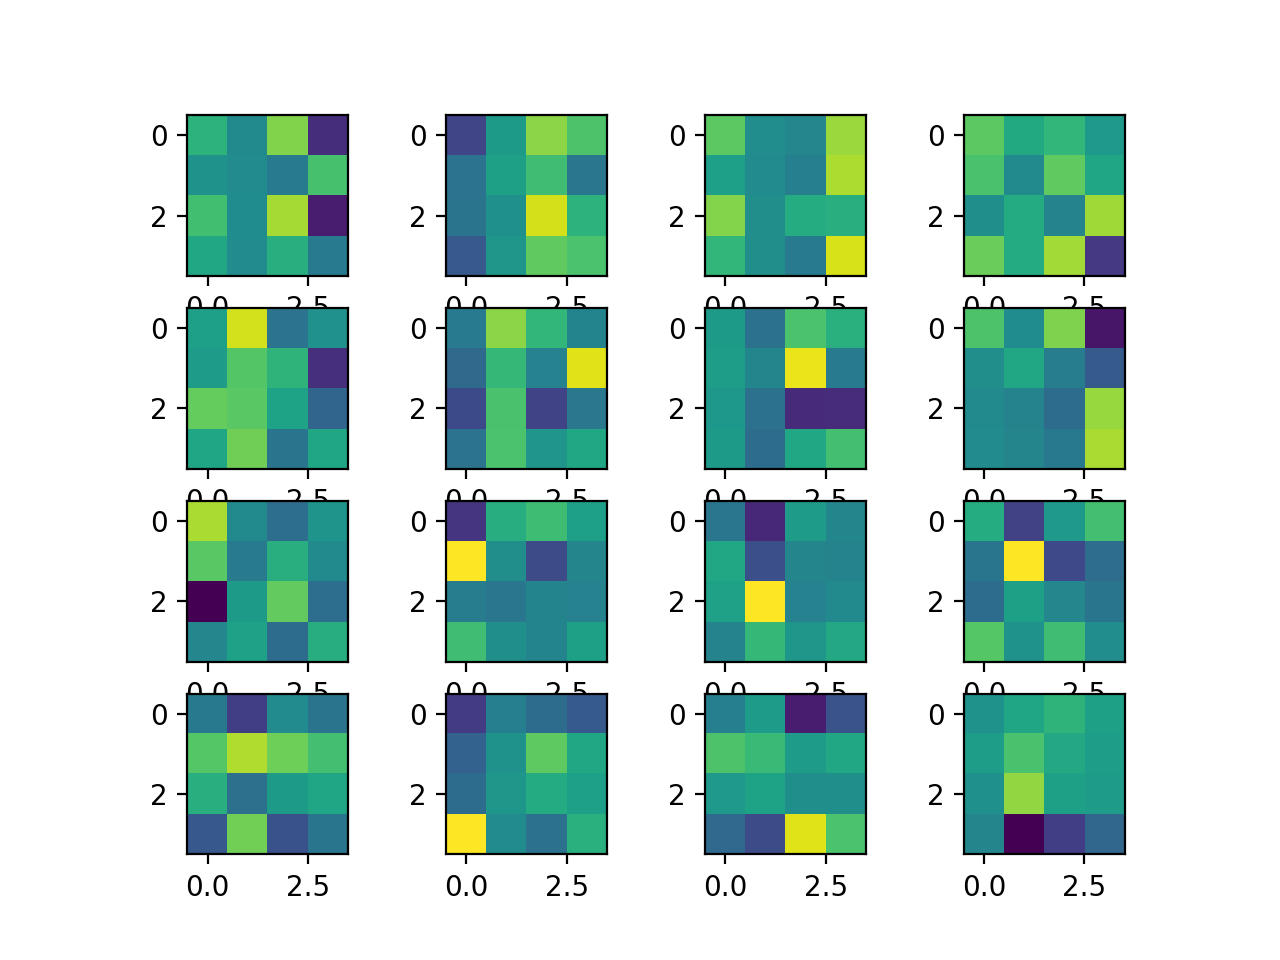

<IPython.core.display.Javascript object>


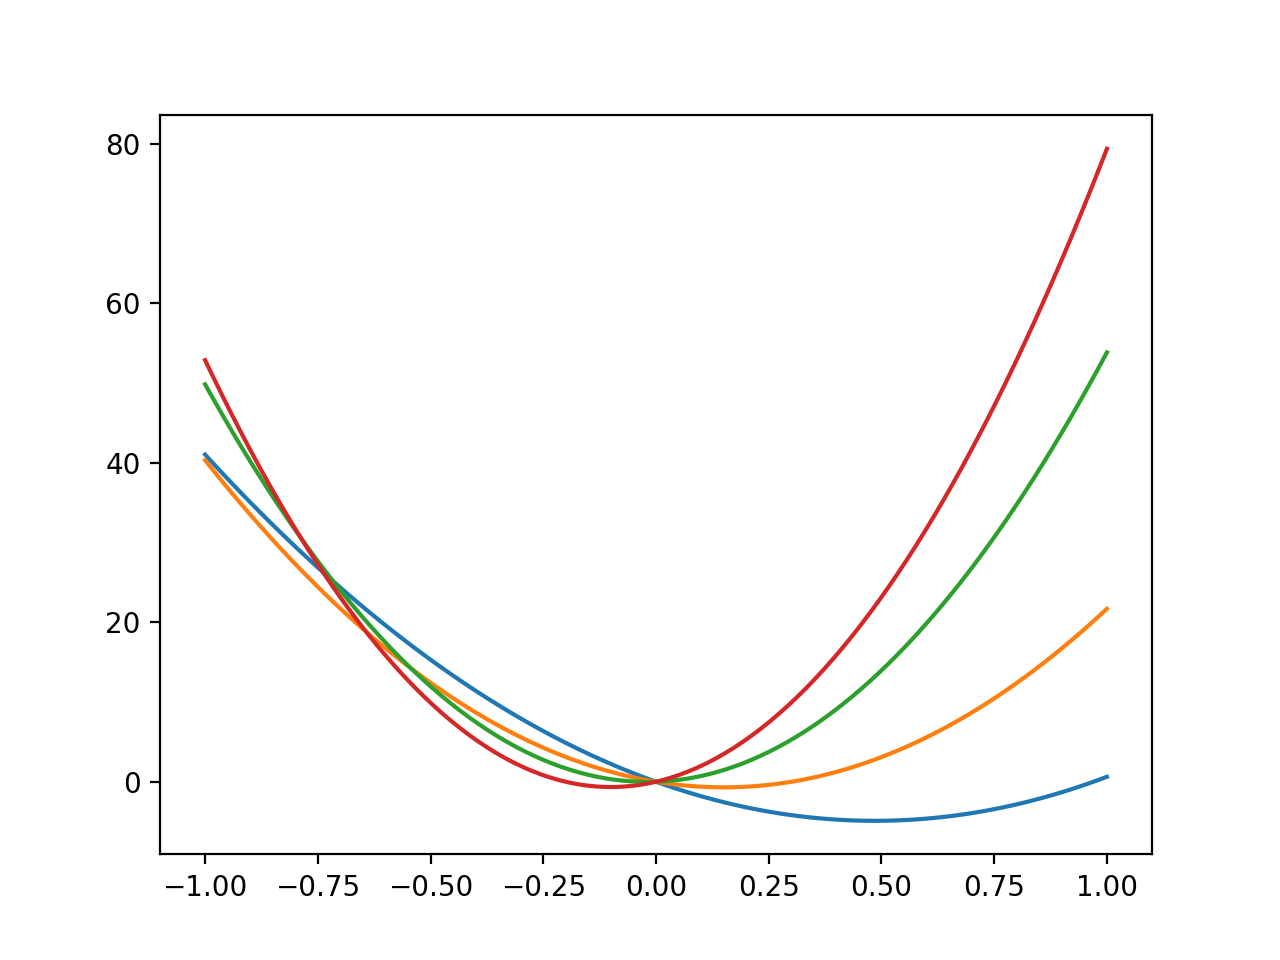

In [2077]:
hessWy = np.zeros((nQ**2,nQ**2))
blankWlist = parse_W(np.zeros(nH,))
blankWlist[1][:] = 1
allhot = unparse_W(*blankWlist)
Wy_entries = slice(np.where(allhot)[0][0],np.where(allhot)[0][-1]+1)
hessWy = hess[Wy_entries,Wy_entries]
gradWy = gr[Wy_entries]
drH,prH = np.linalg.eig(hessWy)
plt.figure()
for iieig,ieig in enumerate(np.arange(16)):
    plt.subplot(4,4,iieig+1)
    plt.imshow(prH[:,ieig].reshape((nQ,nQ))*np.sign(prH[:,ieig].mean()),vmin=-0.6,vmax=0.6)
plt.figure()
for ieig in np.arange(-1,-5,-1):
    x = np.linspace(-1,1,100)
    y = x*(gradWy @ prH[:,ieig]) + 0.5*x**2*(prH[:,ieig] @ hessWy @ prH[:,ieig])
    plt.plot(x,y)

<IPython.core.display.Javascript object>


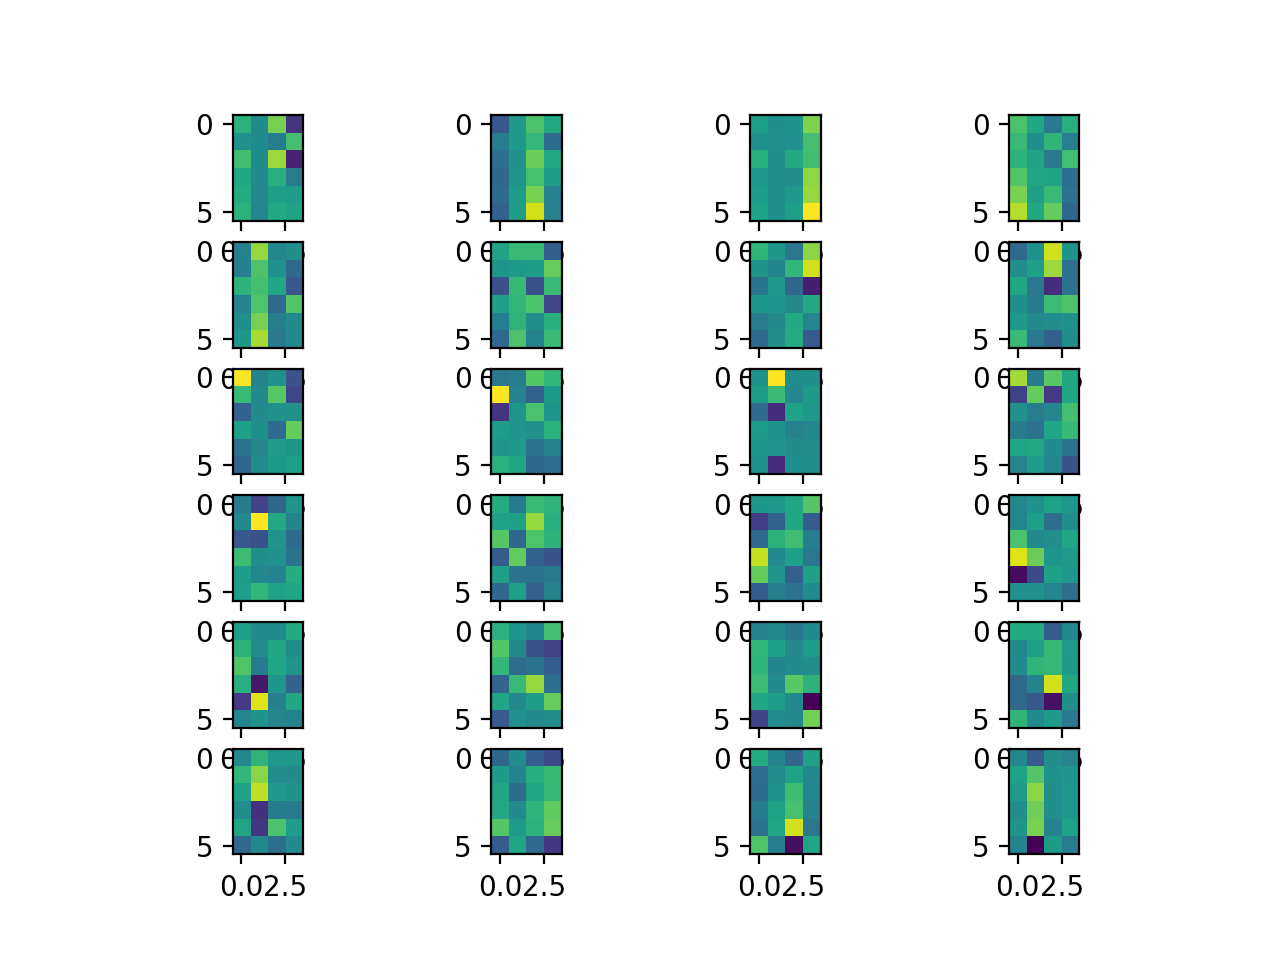

<IPython.core.display.Javascript object>


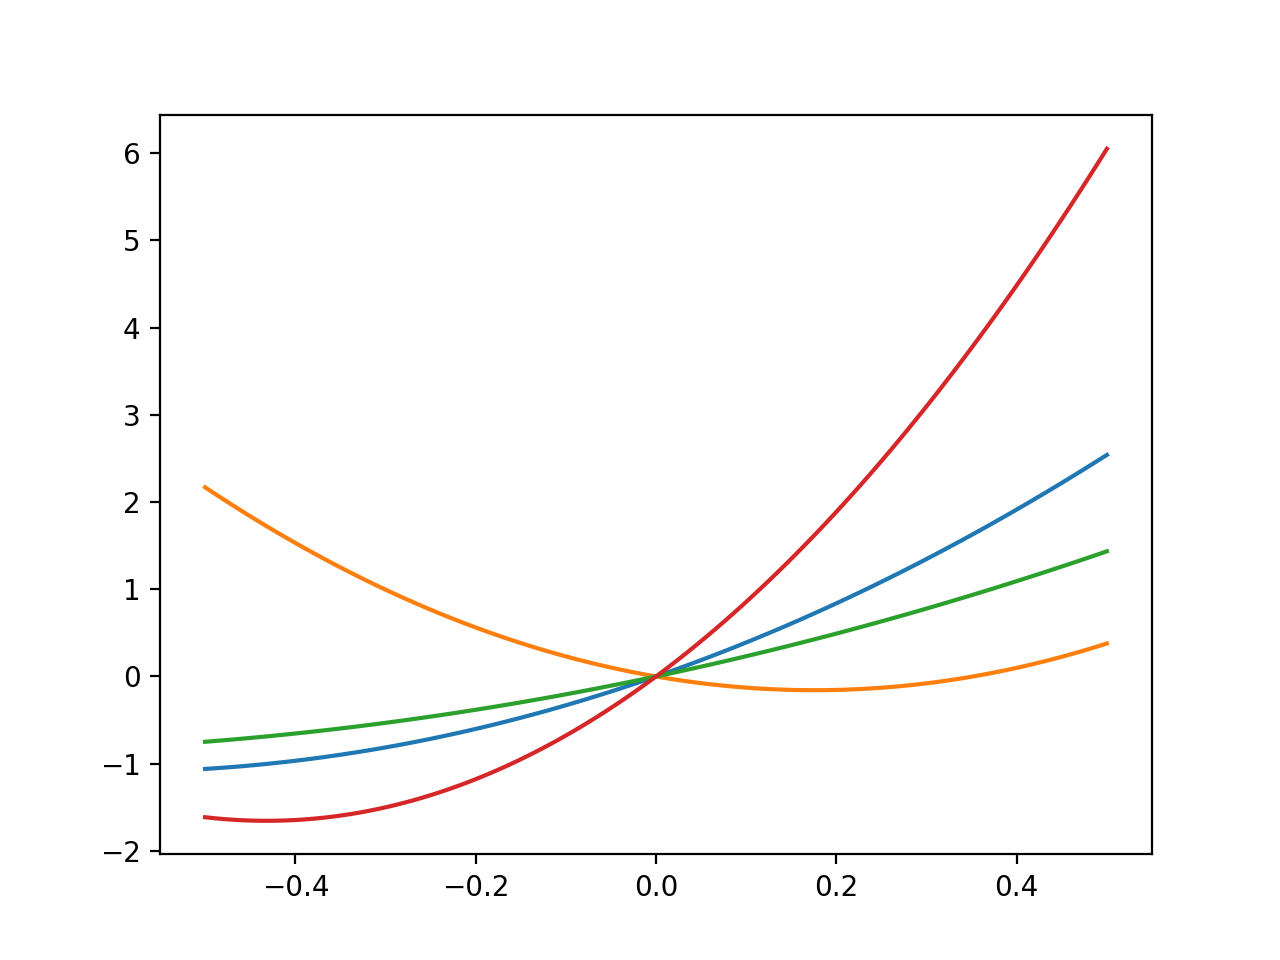

In [2078]:
hessW = np.zeros((nP*nQ+nQ**2,nP*nQ+nQ**2))
blankWlist = parse_W(np.zeros(nH,))
blankWlist[0][:] = 1
blankWlist[1][:] = 1
allhot = unparse_W(*blankWlist)
W_entries = slice(np.where(allhot)[0][0],np.where(allhot)[0][-1]+1)
hessW = hess[W_entries,W_entries]
gradW = gr[W_entries]
drHW,prHW = np.linalg.eig(hessW)

plt.figure()
for iieig,ieig in enumerate(np.arange(nP*nQ+nQ**2)):
    plt.subplot(6,4,iieig+1)
    these_wts = np.real(prHW[:,ieig])
    these_wx = these_wts[:nP*nQ].reshape((nP,nQ))
    these_wy = these_wts[nP*nQ:].reshape((nQ,nQ))
    these_w = np.concatenate((these_wy,these_wx),axis=0)
    plt.imshow(these_w*np.sign(these_w.mean()),vmin=-0.6,vmax=0.6)
plt.figure()
for ieig in np.arange(-1,-5,-1):
    x = np.linspace(-0.5,0.5,100)
    y = x*(gradW @ prHW[:,ieig]) + 0.5*x**2*(prHW[:,ieig] @ hessW @ prHW[:,ieig])
    plt.plot(x,y)

<IPython.core.display.Javascript object>


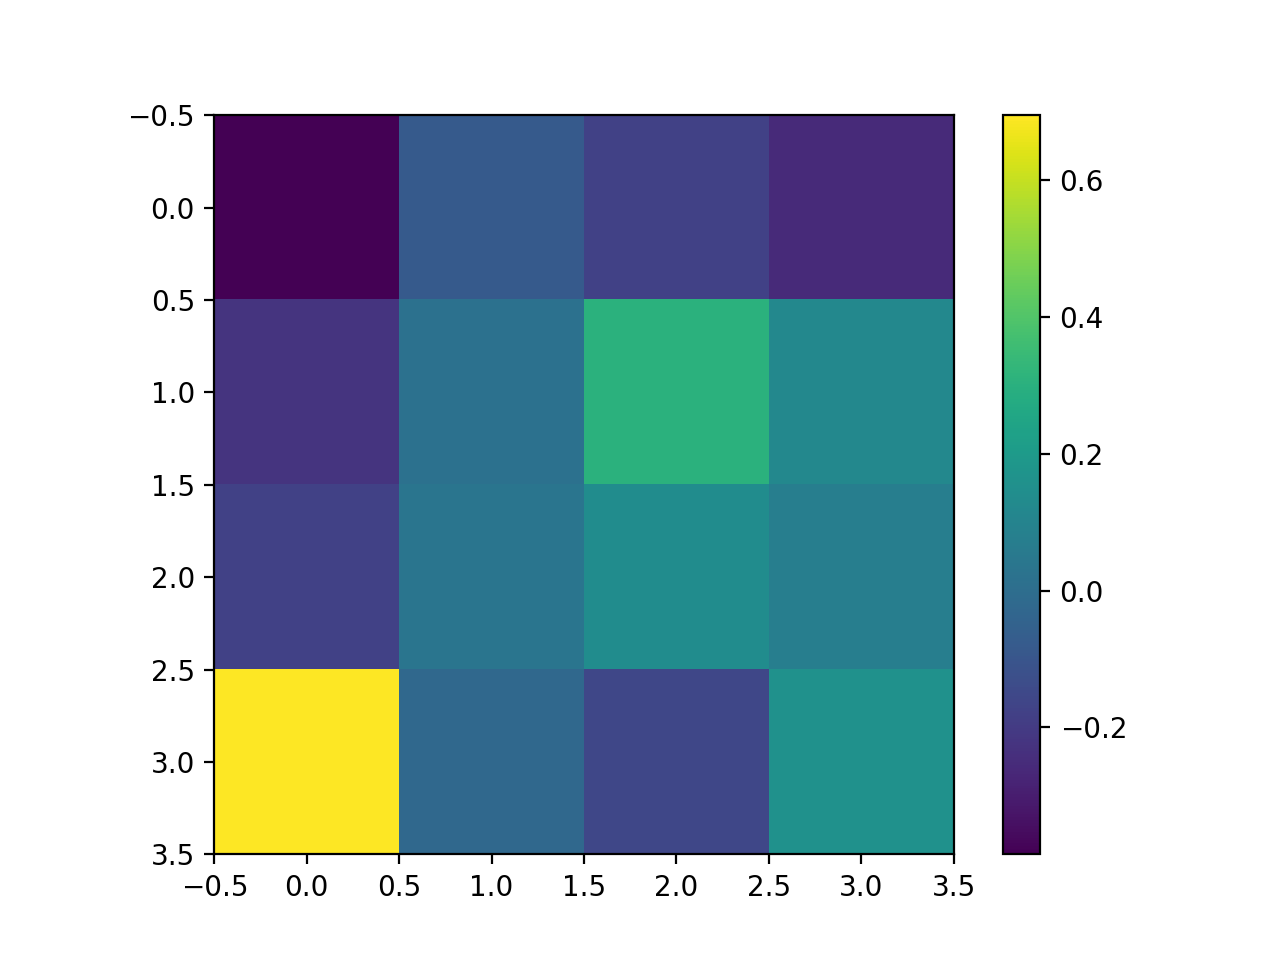

In [2079]:
plt.figure()
plt.imshow(prH[:,-3].reshape((nQ,nQ)))
plt.colorbar()

<IPython.core.display.Javascript object>


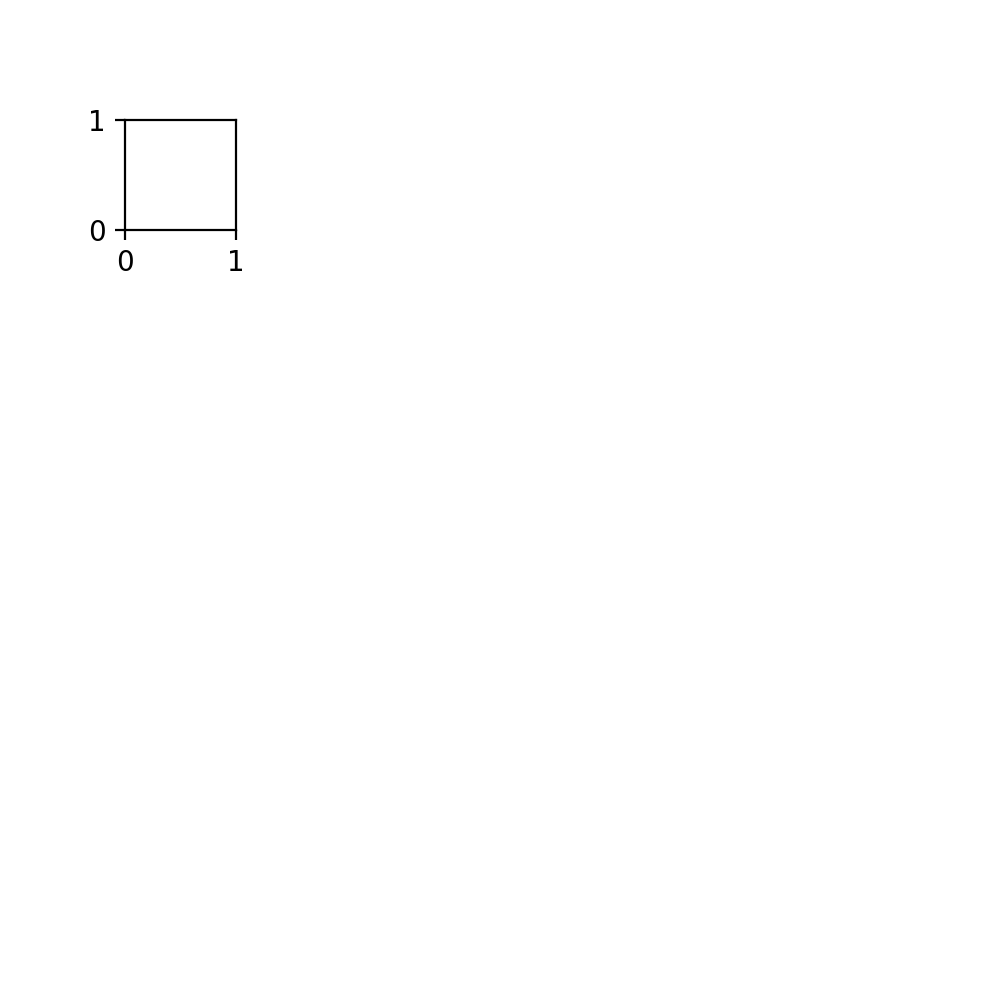

ValueError: cannot reshape array of size 8 into shape (4,4)

In [2080]:
mag = 1
plt.figure(figsize=(5*mag,5*mag))
for iidim,idim in enumerate(np.where(wheavy)[0]):
    plt.subplot(6,6,iidim+1)
    eiglist = parse_W(prH[:,idim])
    plt.imshow(np.real(eiglist[1])*np.sign(np.real(eiglist[1].sum())),vmin=-0.5,vmax=0.5)
    plt.axis('off')
    
mag = 1
plt.figure(figsize=(5*mag,5*mag))
for iidim,idim in enumerate(np.where(wheavy)[0]):
    plt.subplot(6,6,iidim+1)
    eiglist = parse_W(prH[:,idim])
    plt.imshow(np.real(eiglist[3])*np.sign(np.real(eiglist[3].sum())),vmin=-0.5,vmax=0.5)
    plt.axis('off')
#     plt.colorbar()
# plt.tight_layout()

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


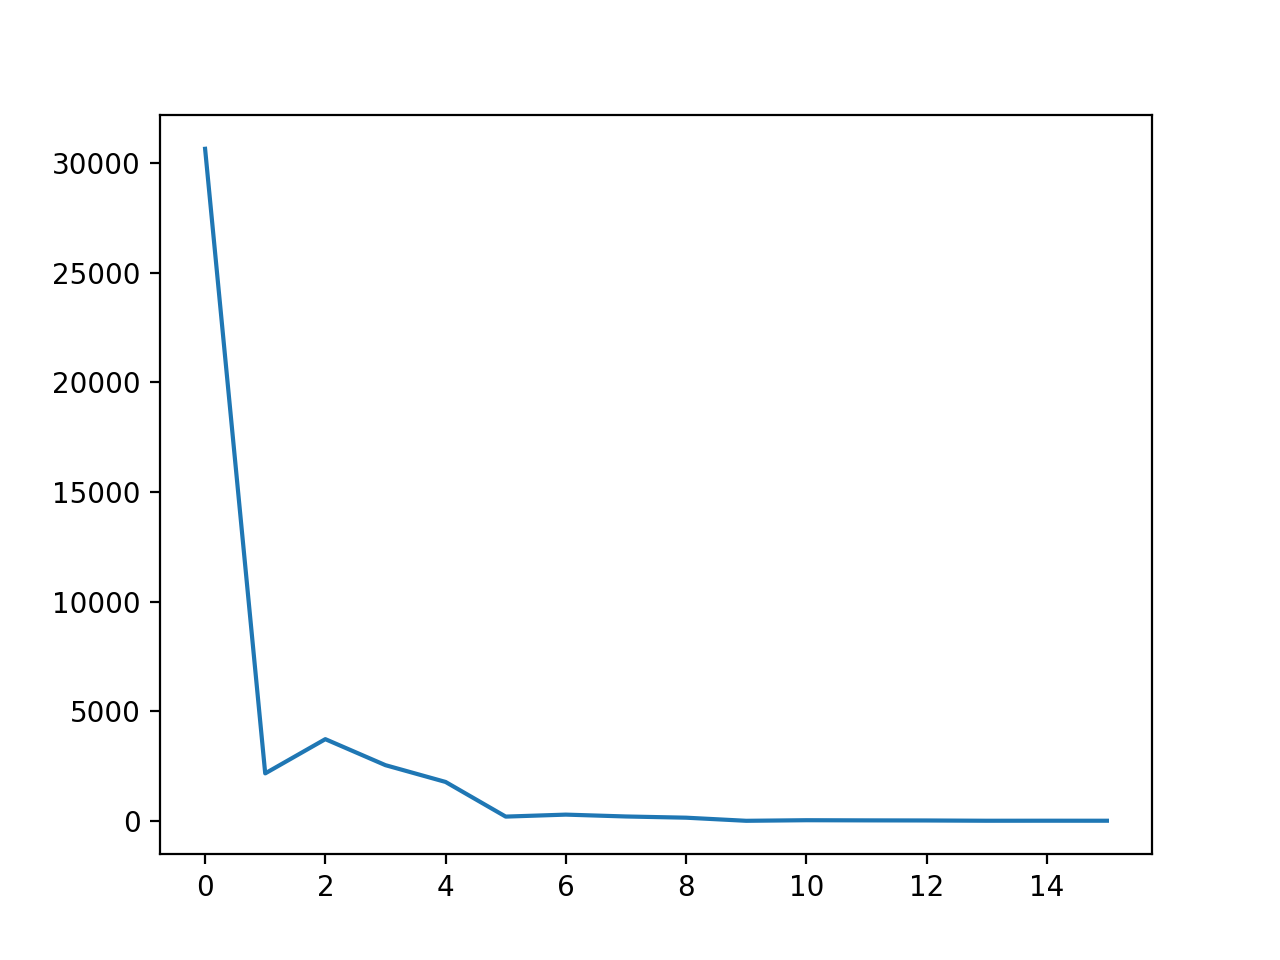

In [1796]:
plt.figure()
plt.plot(np.abs(drH))

In [1247]:
# [Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,YY,Eta,Xi]
# nans: s02, XXp, Eta, Xi

In [1756]:
drW,prW = np.linalg.eig(Wmy-np.eye(Wmy.shape[0]))

In [1757]:
drW

array([-1.5359246 +2.63016635j, -1.5359246 -2.63016635j,
       -1.60337219+0.j        ,  0.67522138+0.j        ])

<IPython.core.display.Javascript object>


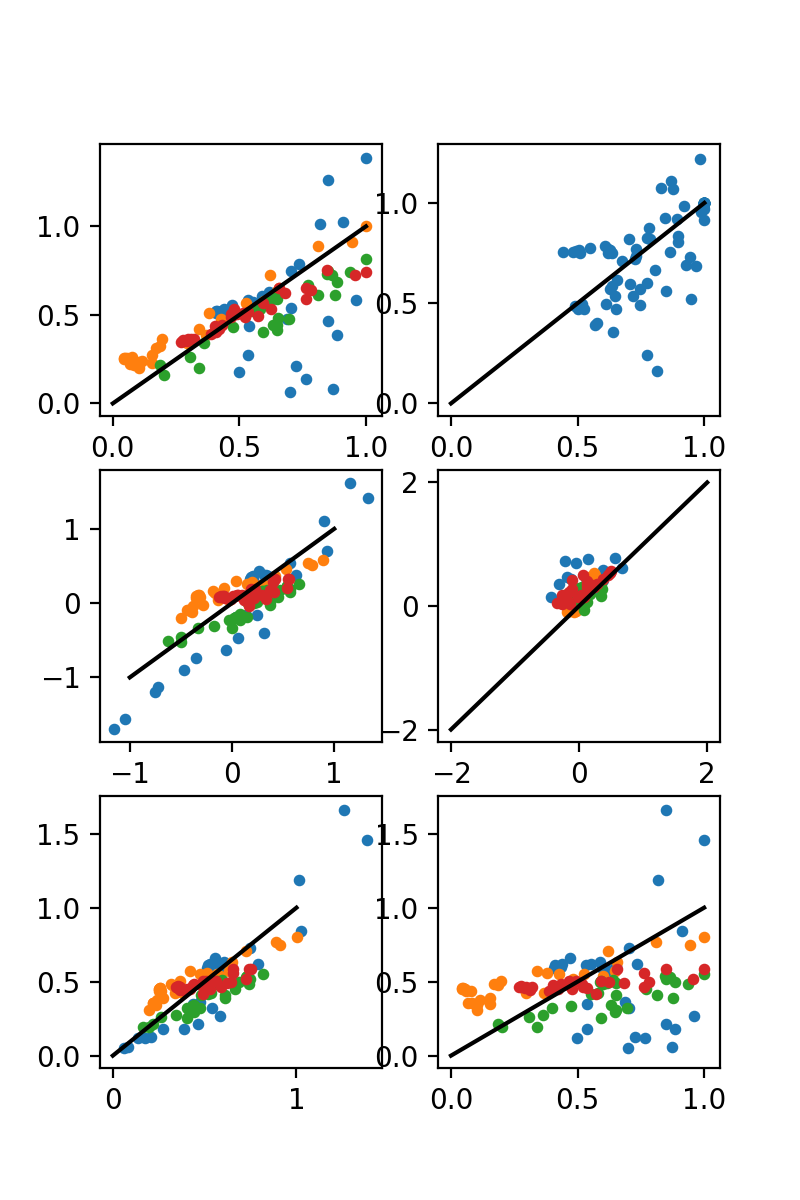

In [2082]:
itry = 0
Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = Wt[trystars_i[itry]][trystars_j[itry]]
# Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = Wstar_dict['as_list']
def gen_Weight(W,K,kappa):
    WW0 = np.concatenate((W,W*K[np.newaxis,:]),axis=1)
    WW1 = np.concatenate((W*K[np.newaxis,:]*kappa,W),axis=1)
    WW = np.concatenate((WW0,WW1),axis=0)
    return WW

def u_fn(XX,YY,Wx,Wy,k,kappa):
    WWx,WWy = [gen_Weight(W,k,kappa) for W in [Wx,Wy]]
    return u_fn_WW(XX,YY,WWx,WWy)# XX @ WWx + YY @ WWy

def u_fn_WW(XX,YY,WWx,WWy):
    return XX @ WWx + YY @ WWy

def colorful_scatter(a,b):
    for icelltype in range(ncelltypes-1):
        plt.scatter(a[:,icelltype],b[:,icelltype],s=10)

XXhat = np.concatenate(Xhat,axis=1)
YYhat = np.concatenate(Yhat,axis=1)
YY = compute_f_(Eta,Xi,s02)
Etastar = u_fn(XX,YY,Wmx,Wmy,k,kappa)
Xistar = u_fn(XX,YY,Wsx,Wsy,k,kappa)
YYstar = compute_f_(Etastar,Xistar,s02)
nrows = 3
ncols = 2
plt.figure(figsize=(2*ncols,2*nrows))
plt.subplot(nrows,ncols,1)
colorful_scatter(YYhat,YY)
plt.plot((0,1),(0,1),c='k')
plt.subplot(nrows,ncols,2)
plt.scatter(XXhat,XX,s=10)
plt.plot((0,1),(0,1),c='k')
plt.subplot(nrows,ncols,3)
colorful_scatter(Eta,Etastar)
plt.plot((-1,1),(-1,1),c='k')
plt.subplot(nrows,ncols,4)
colorful_scatter(Xi,Xistar)
plt.plot((-2,2),(-2,2),c='k')
plt.subplot(nrows,ncols,5)
colorful_scatter(YY,YYstar)
plt.plot((0,1),(0,1),c='k')
plt.subplot(nrows,ncols,6)
colorful_scatter(YYhat,YYstar)
plt.plot((0,1),(0,1),c='k')

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


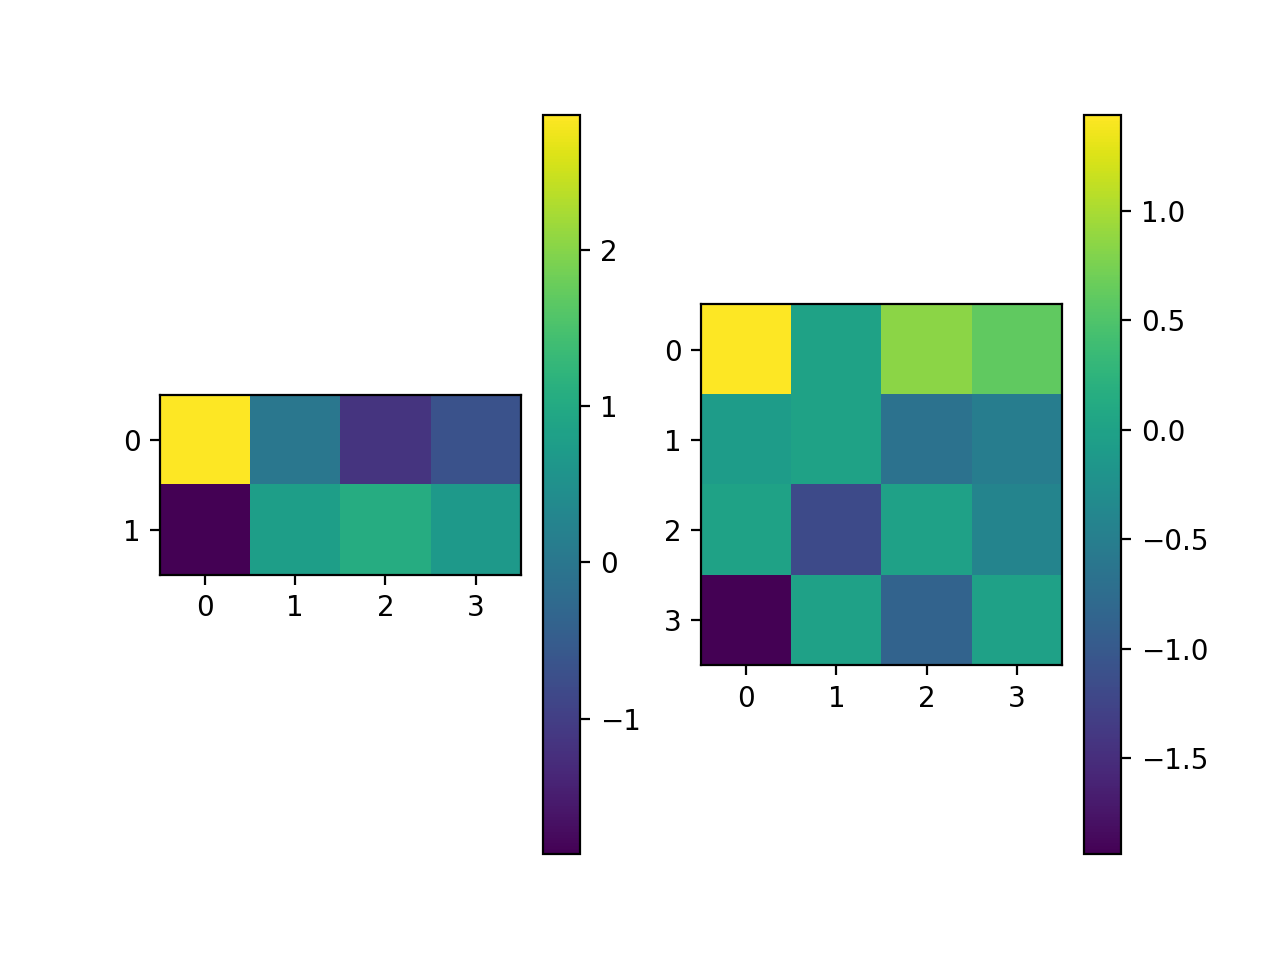

In [2106]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(Wmx)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(Wmy)
plt.colorbar()

In [2085]:
def show_four_celltypes(YYstar):
    lbls = ['PC','SST','VIP','PV']
    mag = 2
    plt.figure(figsize=(mag*nQ,mag))
    for itype in range(nQ):
        plt.subplot(1,nQ,itype+1)
        plt.title(lbls[itype])
        sca.show_size_contrast(YYstar[:,itype].reshape((5,6)),flipud=True)
    plt.tight_layout()

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


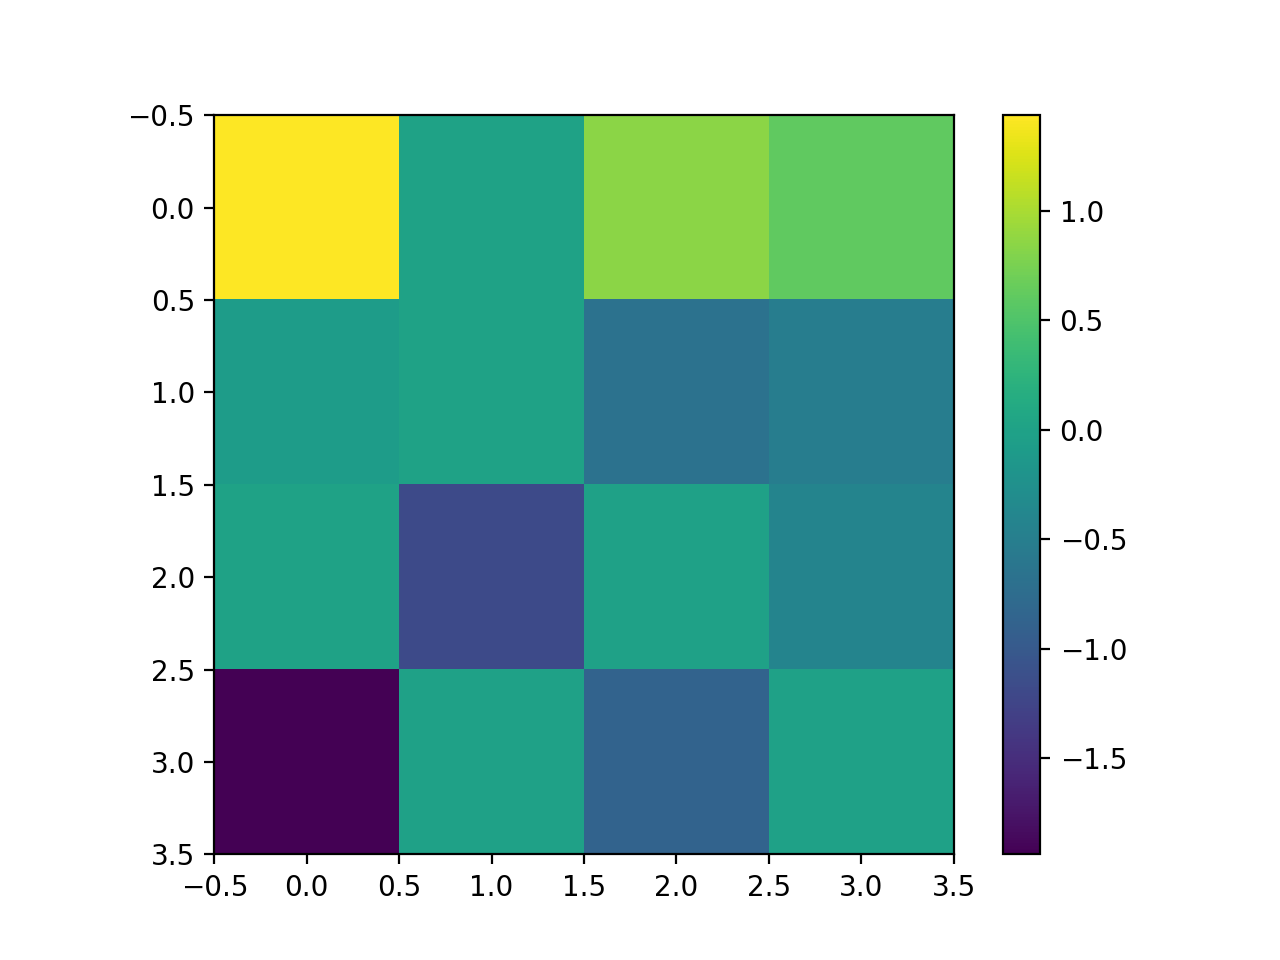

In [2086]:
plt.figure()
plt.imshow(Wmy)
plt.colorbar()

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


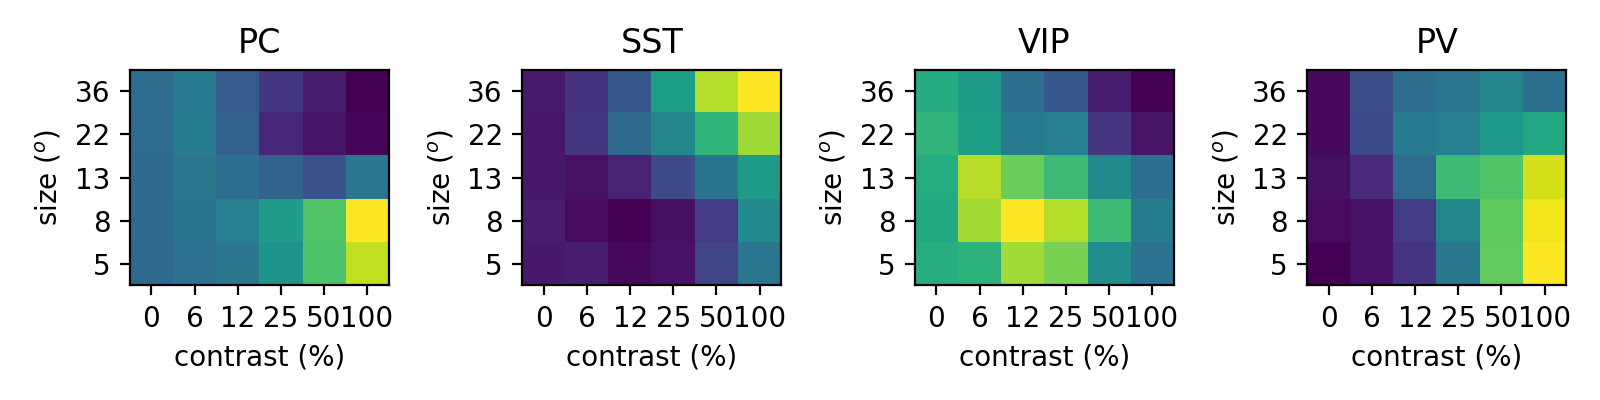

In [2087]:
for itry in range(1): #ntries): 
    Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = Wt[trystars_i[itry]][trystars_j[itry]]
#     Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = Wstar_dict['as_list'] #Wt[0][itry]
    XXhat = np.concatenate(Xhat,axis=1)
    YYhat = np.concatenate(Yhat,axis=1)
    YY = compute_f_(Eta,Xi,s02)
    Etastar = u_fn(XX,YY,Wmx,Wmy,k,kappa)
    Xistar = u_fn(XX,YY,Wsx,Wsy,k,kappa)
    YYstar = compute_f_(Etastar,Xistar,s02)
    show_four_celltypes(YY)
#     mag = 2
#     plt.figure(figsize=(mag*nQ,mag))
#     for itype in range(nQ):
#         plt.subplot(1,nQ,itype+1)
#         plt.title(lbls[itype])
#         sca.show_size_contrast(YYstar[:,itype].reshape((5,6)),flipud=True)
#     plt.tight_layout()
#     plt.savefig('figures/modeled_four_cell_types.jpg',dpi=300)

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


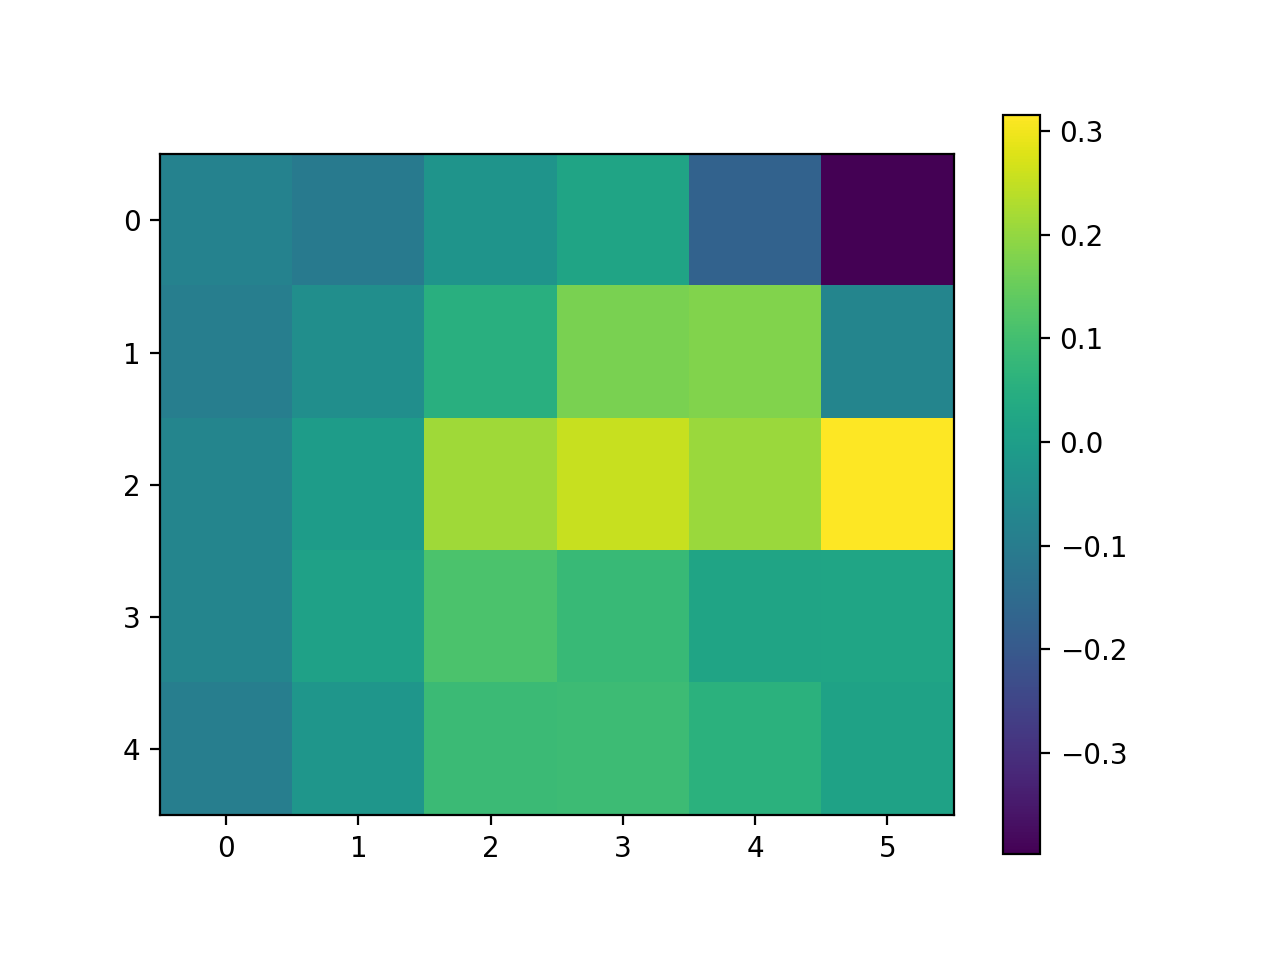

In [2088]:
plt.figure()
plt.imshow((YY-YYstar)[:,0].reshape((nsize,ncontrast)))
plt.colorbar()

In [2089]:
ww = gen_Weight(Wmy,k,kappa)
eig_actual = np.zeros((Etastar.shape[0],))
for istim in range(Etastar.shape[0]):
    eig_actual[istim] = np.max(np.real(np.linalg.eig(compute_fprime_(Eta,Xi,s02)[istim]@ww - np.eye(nS*nQ))[0]))
#     eig_actual[istim] = np.max(np.real(np.linalg.eig(compute_fprime_(Etastar,Xistar,s02)[istim]@ww - np.eye(ww.shape[0]))[0]))
    eig_no_gain = np.max(np.real(np.linalg.eig(ww - np.eye(ww.shape[0]))[0]))
    print((eig_actual[istim],eig_no_gain))

(-0.9999999999999993, -0.009993623305414886)
(-0.9999999999999992, -0.009993623305414886)
(-0.9999999999999993, -0.009993623305414886)
(-0.2368478149902454, -0.009993623305414886)
(1.7106625867160918, -0.009993623305414886)
(3.1400013220281733, -0.009993623305414886)
(-0.9999999999999987, -0.009993623305414886)
(-0.9999999999999996, -0.009993623305414886)
(-0.9999999999999994, -0.009993623305414886)
(-0.9999999999999991, -0.009993623305414886)
(-0.2759527000179595, -0.009993623305414886)
(1.0103883331405459, -0.009993623305414886)
(-0.9999999999999998, -0.009993623305414886)
(-0.9999999999999993, -0.009993623305414886)
(-0.9999999999999996, -0.009993623305414886)
(-0.3950126606634954, -0.009993623305414886)
(-0.003739102238442815, -0.009993623305414886)
(2.0213250147711292, -0.009993623305414886)
(-0.9999999999999996, -0.009993623305414886)
(-0.9999999999999998, -0.009993623305414886)
(-0.9999999999999993, -0.009993623305414886)
(-0.9103041883195016, -0.009993623305414886)
(1.172059055

In [2090]:
istim = 29
drf,prf = np.linalg.eig(compute_fprime_(Eta,Xi,s02)[istim]@ww - np.eye(nS*nQ))

In [2091]:
prf[:,1]

array([-0.99856234, -0.02025994, -0.02025994, -0.02025994, -0.02025994,
       -0.02025994, -0.02025994, -0.02025994])

In [2092]:
istim = -1
np.linalg.eig(compute_fprime_(Eta,Xi,s02)[istim]@ww - np.eye(nS*nQ))[1][0]

array([-0.35355339, -0.99856234,  0.22670029, -0.41994402, -0.11058865,
       -0.05784502,  0.22710208, -0.6688424 ])

In [2093]:
(Wmy[1,2],Wmy[2,1],Wmy[3,0],Wmy[1,0])

(-0.6628473584947526,
 -1.1850025100315922,
 -1.9382457900390289,
 -0.07592391320035187)

In [2094]:
YY = compute_f_(Eta,Xi,s02)

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


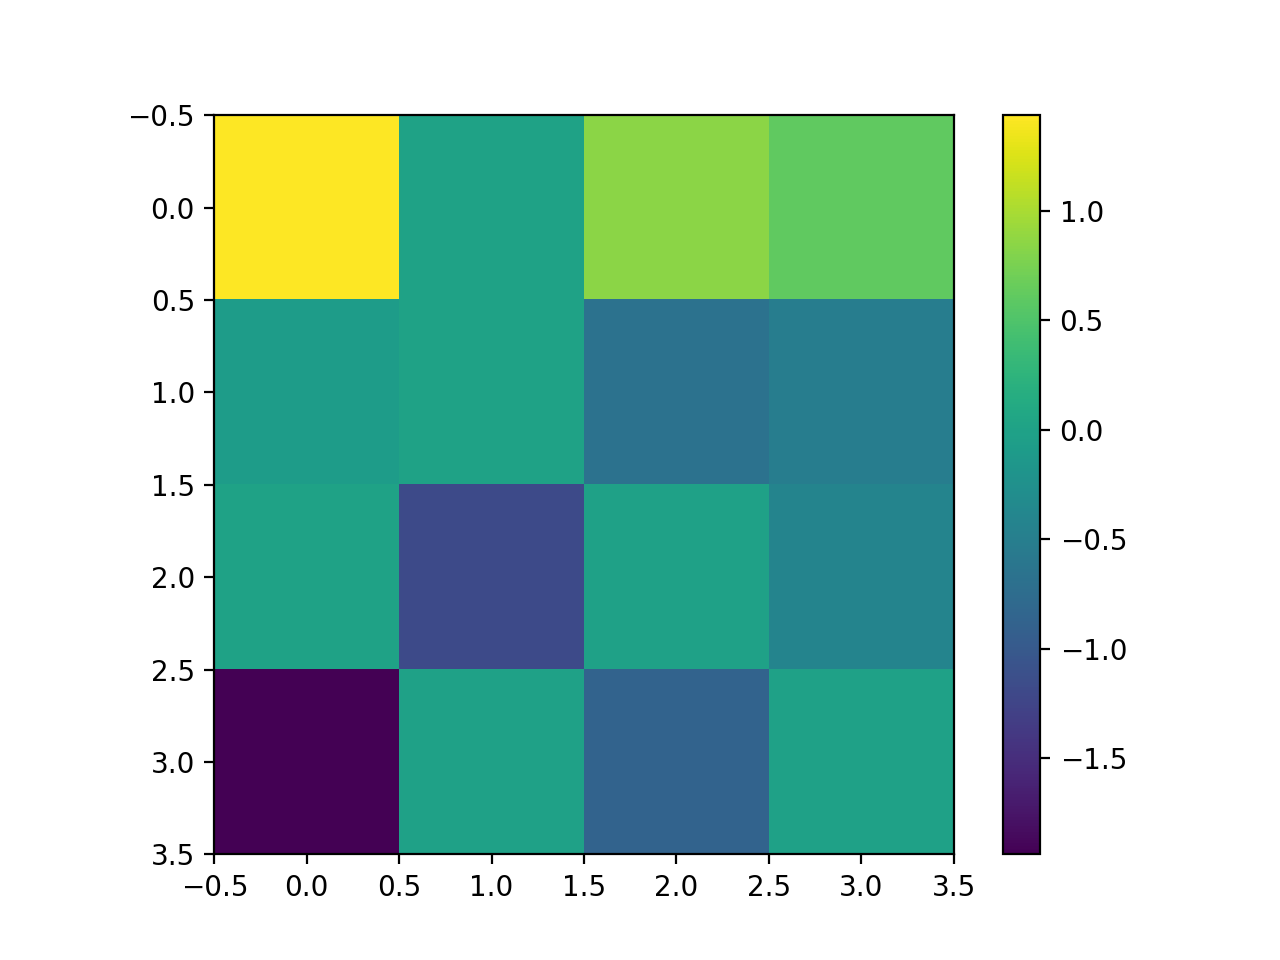

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


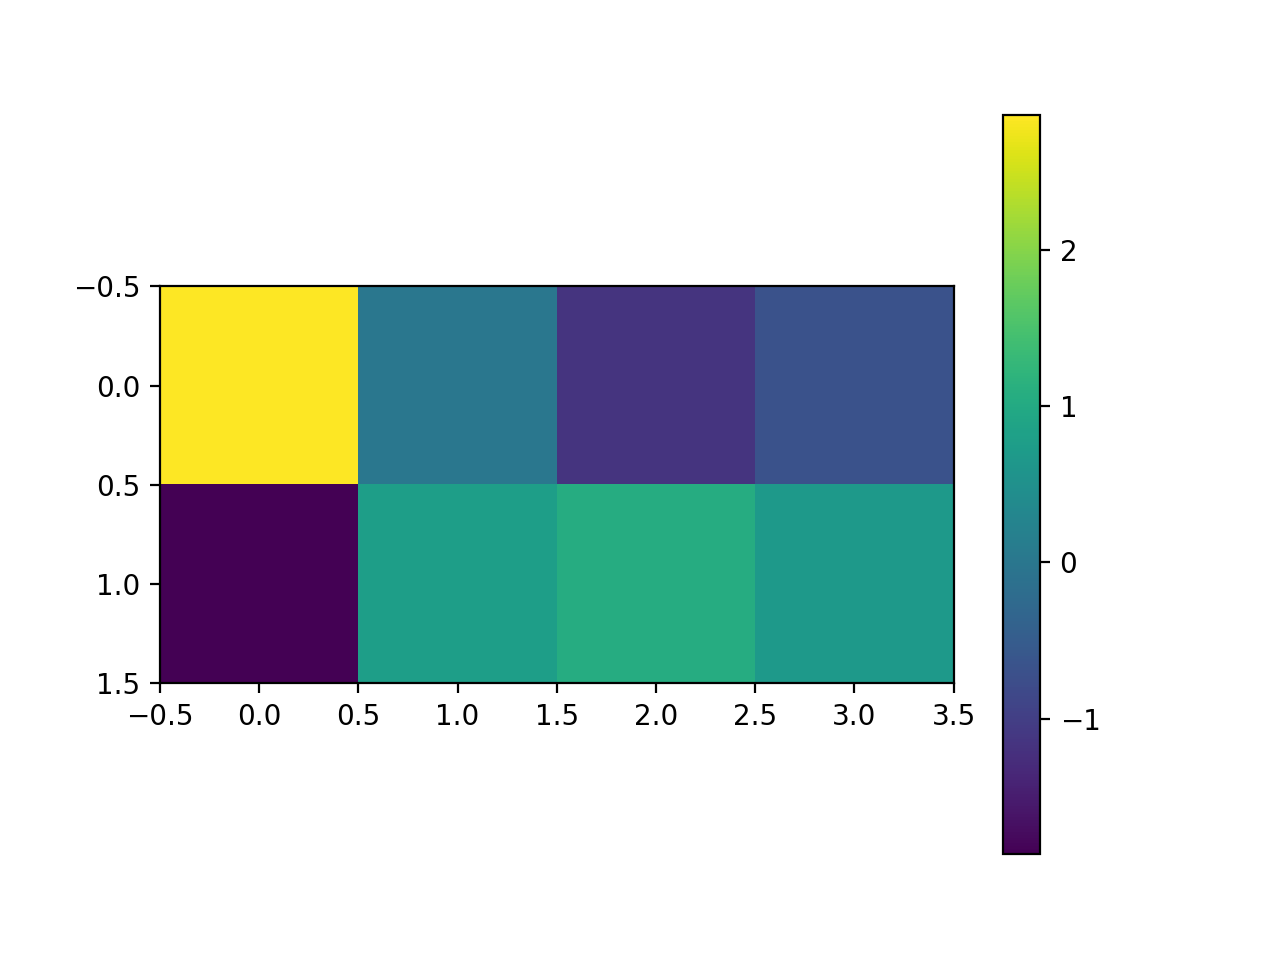

In [2095]:
plt.figure()
plt.imshow(Wmy)
plt.colorbar()
plt.figure()
plt.imshow(Wmx)#,vmin=-2,vmax=2)
plt.colorbar()

In [2096]:
Wmy_bounds

array([[ 2,  2,  2,  2],
       [-2,  0, -2, -2],
       [ 0, -2, -2, -2],
       [-2, -2, -2, -2]])

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


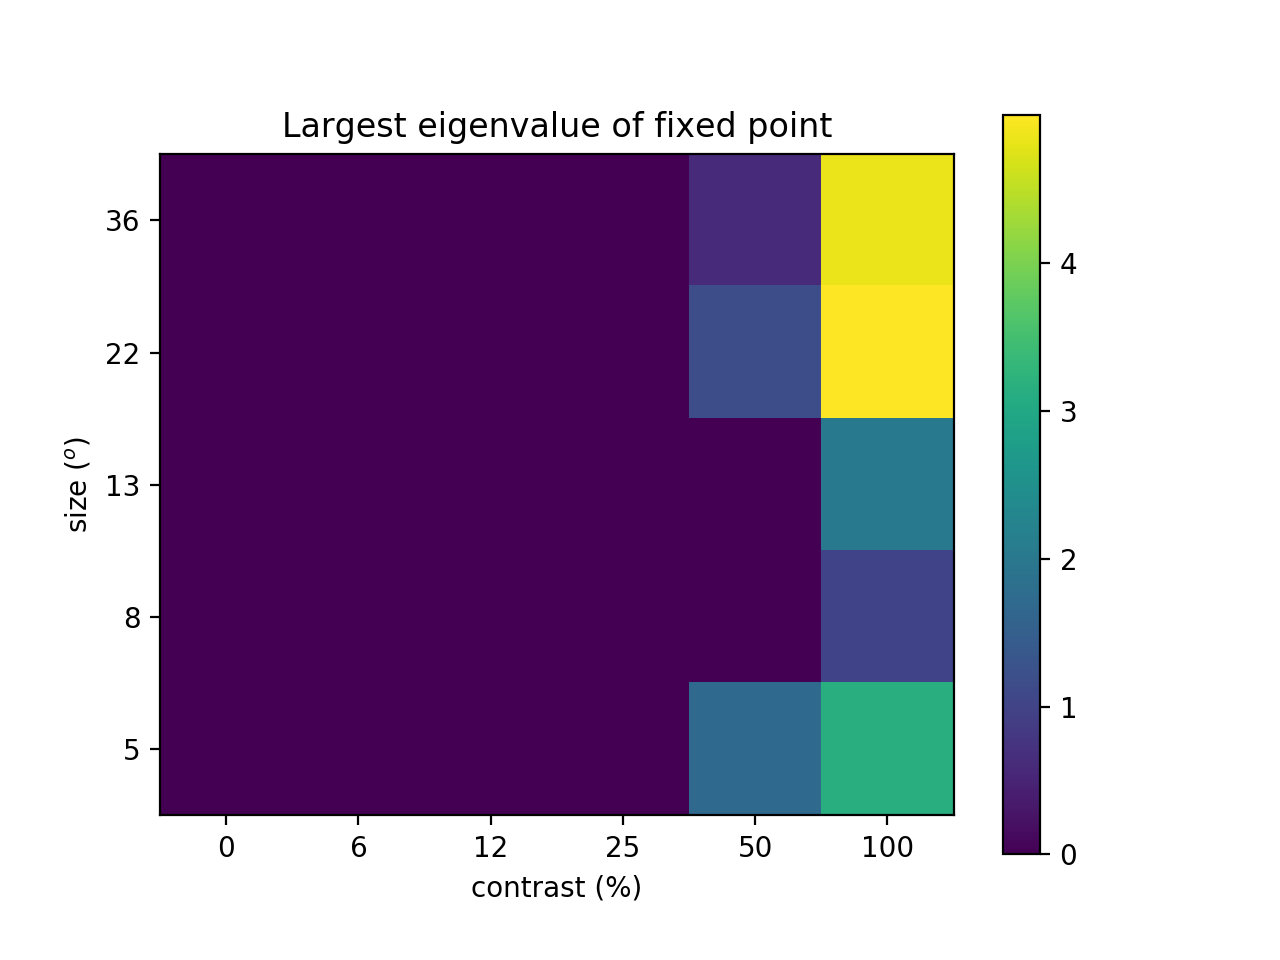

Text(0.5, 1.0, 'Largest eigenvalue of fixed point')

In [2097]:
plt.figure()
sca.show_size_contrast(eig_actual.reshape((nsize,ncontrast)),vmin=0,flipud=True)#,vmin=-1,vmax=1)
plt.colorbar()
plt.title('Largest eigenvalue of fixed point')
# plt.savefig('figures/possible_gamma_substrate.jpg',dpi=300)

In [2098]:
trystars_i = (0,)
trystars_j = (0,)
itry = 0
Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = Wt[trystars_i[itry]][trystars_j[itry]]
labels = ['Wmx','Wmy','Wsx','Wsy','s02','k','kappa','XX','XXp','Eta','Xi']
Wstar_dict = {}
for i,label in enumerate(labels):
    Wstar_dict[label] = Wt[trystars_i[itry]][trystars_j[itry]][i]
Wstar_dict['as_list'] = [Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi]
# np.save('weights_200116a.npy',Wstar_dict)

In [1915]:
# Wstar_dict = np.load('weights_200111b.npy',allow_pickle=True)[()]

0
0
1
2
3
4
5
6
7
8
9


/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


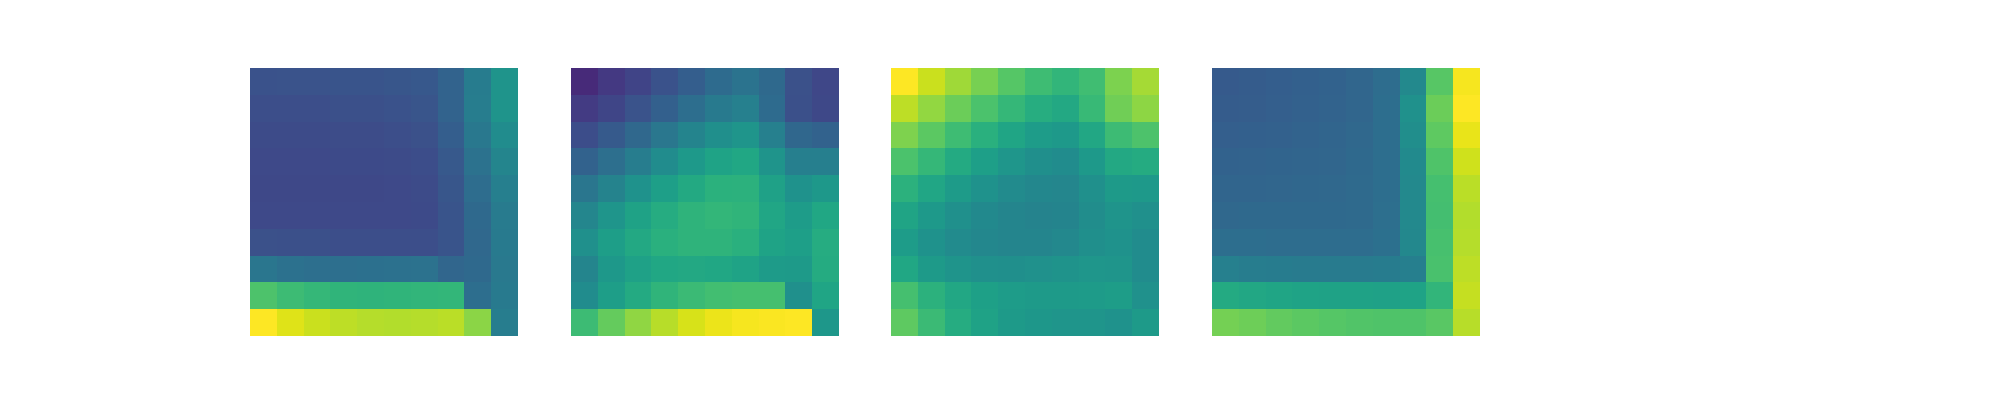

In [1945]:
nstar = len(trystars_i)
YY = [None for istar in range(nstar)]
Nvals = 10
max_val = 1
Niter = int(1e3)
for istar in range(nstar):
    print(istar)
    ti,tj = trystars_i[istar],trystars_j[istar]
    Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = Wstar_dict['as_list'] #Wt[ti][tj]
    def fY(XX,YY):
        return compute_f_(u_fn(XX,YY,Wmx,Wmy,k,kappa),u_fn(XX,YY,Wsx,Wsy,k,kappa),s02)
    def predict_YY(XX,YY0,eta=1e-2):
        def dYYdt(YY):
            return -YY + fY(XX,YY)
        YY = np.zeros((Niter+1,nS*nQ))
        YY[0] = YY0.copy() #np.zeros((nN,nS*nQ))
        dYY = np.zeros_like(YY[0])
        iiter = 0
        while iiter < Niter: #np.abs(dYY).sum()>1e-8*np.abs(YY).sum():
            dYY = eta*dYYdt(YY[iiter])
            YY[iiter+1] = YY[iiter] + dYY
            iiter = iiter+1
        return YY
    YY = np.zeros((Nvals,Nvals,Niter+1,nS*nQ))
    YY0 = compute_f_(Eta[0],Xi[0],s02)
    XX = np.ones((Nvals,Nvals,4))
    XX[:,:,0],XX[:,:,2] = np.meshgrid(np.linspace(0,max_val,Nvals),np.linspace(0,max_val,Nvals),indexing='ij')
#     XX[:,2] = np.linspace(0,max_val,Nvals)
    for ival in range(Nvals):
        YY[ival,0] = predict_YY(XX[ival,0],YY0)
        print(ival)
        for jval in range(1,Nvals):
            YY[ival,jval] = predict_YY(XX[ival,jval],YY[ival-1,jval,-1])
            
    mag = 2
    plt.figure(figsize=(mag*ncelltypes,mag))
    for icelltype in range(nQ):
        plt.subplot(1,ncelltypes,icelltype+1)
        plt.imshow(YY[:,:,-1,icelltype],vmin=0)#,interpolation='bilinear')
        plt.axis('off')

In [1946]:
nstar = len(trystars_i)
YYsc = [None for istar in range(nstar)]
Niter = int(2e3)
for istar in range(nstar):
    print(istar)
    ti,tj = trystars_i[istar],trystars_j[istar]
    Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = Wt[ti][tj]
    fval = compute_f_(Eta,Xi,s02)
    resEta = Eta - u_fn(XX,fval,Wmx,Wmy,k,kappa)
    resXi = Xi - u_fn(XX,fval,Wsx,Wsy,k,kappa)
    def fY(XX,YY):
        return compute_f_(resEta[ival]+u_fn(XX,YY,Wmx,Wmy,k,kappa),resXi[ival]+u_fn(XX,YY,Wsx,Wsy,k,kappa),s02)
    def predict_YY(XX,YY0,eta=2e-2):
        def dYYdt(YY):
            return -YY + fY(XX,YY)
        YY = np.zeros((Niter+1,nS*nQ))
        YY[0] = YY0.copy() #np.zeros((nN,nS*nQ))
        dYY = np.zeros_like(YY[0])
        iiter = 0
        while iiter < Niter: #np.abs(dYY).sum()>1e-8*np.abs(YY).sum():
            dYY = eta*dYYdt(YY[iiter])
            YY[iiter+1] = YY[iiter] + dYY
            iiter = iiter+1
        return YY
    
    YYsc[istar] = np.zeros((nN,Niter+1,nS*nQ))
    YY0 = compute_f_(Eta,Xi,s02) + 0.05*np.tile(np.array((0,1,0,0,0,1,0,0))[np.newaxis],(nN,1)) #*np.random.randn(nN,nS*nQ)
#     XX[:,2] = np.linspace(0,max_val,Nvals)
    for ival in range(nN):
        YYsc[istar][ival] = predict_YY(XX[ival],YY0[ival])
        print(ival)
            
#     mag = 2
#     plt.figure(figsize=(mag*ncelltypes,mag))
#     for icelltype in range(nQ):
#         plt.subplot(1,ncelltypes,icelltype+1)
#         plt.imshow(YY[:,:,-1,icelltype],vmin=0,interpolation='bilinear')
#         plt.axis('off')

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


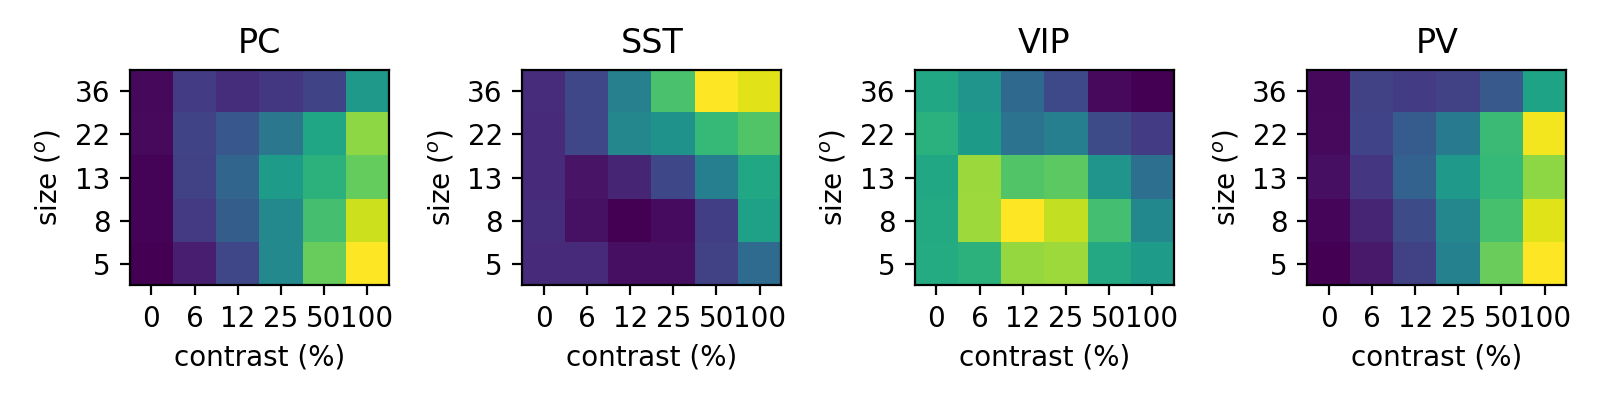

In [1947]:
show_four_celltypes(YYsc[0][:,-1])
# plt.savefig('figures/self_consistent_model_no_residual_currents.jpg',dpi=300)

In [1948]:
YY = compute_f_(Eta,Xi,s02)

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


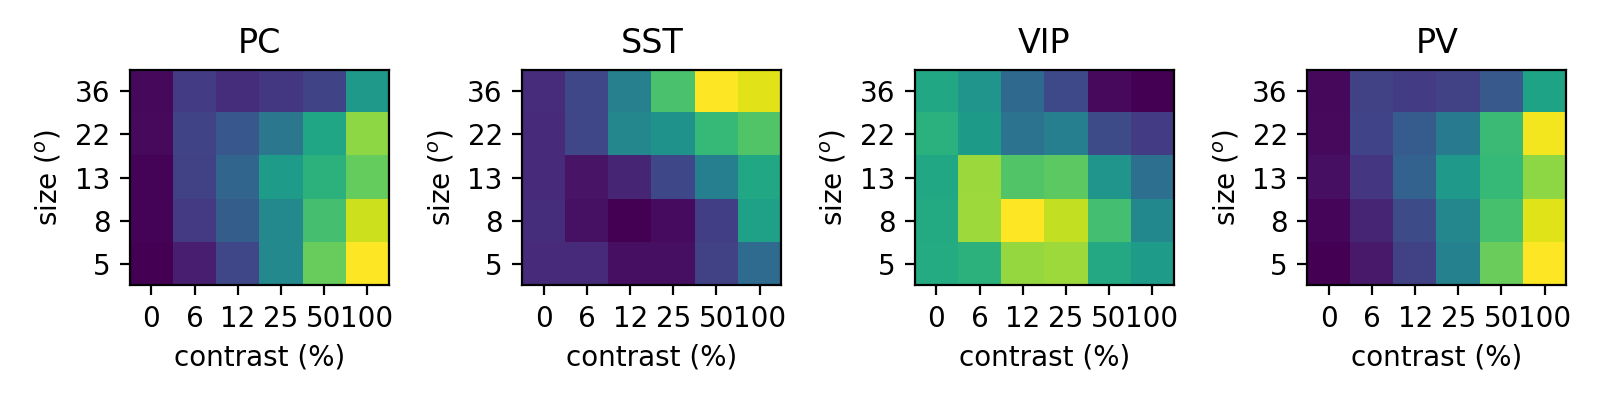

In [1949]:
show_four_celltypes(YY)#[0][:,-1])
# plt.savefig('figures/self_consistent_model_with_residual_currents.jpg',dpi=300)

In [2099]:
def compute_f_(Eta,Xi,s02):
    return utils.f_miller_troyer(Eta,Xi**2+np.concatenate((s02,s02),axis=0))

def compute_fprime_m_(Eta,Xi,s02):
    return utils.fprime_miller_troyer(Eta,Xi**2+np.concatenate((s02,s02),axis=0))*Xi

def compute_fprime_s_(Eta,Xi,s02):
    s2 = Xi**2+np.concatenate((s02,s02),axis=0)
    return utils.fprime_s_miller_troyer(Eta,s2)*(Xi/s2)

def sorted_r_eigs(w):
    drW,prW = np.linalg.eig(w)
    srtinds = np.argsort(drW)
    return drW[srtinds],prW[:,srtinds]

def gen_Weight(W,K,kappa):
    WW0 = np.concatenate((W,W*K[np.newaxis,:]),axis=1)
    WW1 = np.concatenate((W*K[np.newaxis,:]*kappa,W),axis=1)
    WW = np.concatenate((WW0,WW1),axis=0)
    return WW

def u_fn(XX,YY,Wx,Wy,k,kappa):
    WWx,WWy = [gen_Weight(W,k,kappa) for W in [Wx,Wy]]
    return u_fn_WW(XX,YY,WWx,WWy)# XX @ WWx + YY @ WWy

def u_fn_WW(XX,YY,WWx,WWy):
    return XX @ WWx + YY @ WWy

def compute_steady_state(Wlist,Niter=int(4e2),max_val=2.5,Ny=50,fix_dim=None,stim_vals=None,dt=1e-2,perturbation_size=5e-2):
    Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = Wlist
    nQ = Wmy.shape[0]
    nN = Eta.shape[0]
    nS = int(Eta.shape[1]/nQ)
    
    if fix_dim is None:
        fix_dim = [None]
        Nfix = 1
        yvals = (0,)
        Ny = 1
        max_val = 0
    else:
        Nfix = len(fix_dim)
        yvals = np.linspace(0,max_val,Ny)
    
    if stim_vals is None:
        stim_vals = np.arange(nN)
    Nstim = len(stim_vals)
    
    fval = compute_f_(Eta,Xi,s02)
    resEta = Eta - u_fn(XX,fval,Wmx,Wmy,k,kappa)
    resXi = Xi - u_fn(XX,fval,Wsx,Wsy,k,kappa)
    
    def fY(XX,YY):
        return compute_f_(resEta[stim_val]+u_fn(XX,YY,Wmx,Wmy,k,kappa),resXi[stim_val]+u_fn(XX,YY,Wsx,Wsy,k,kappa),s02)
    def predict_YY_fix_dim(XX,YY0,fix_dim=None,run_backward=False,):
        def dYYdt(YY):
            return -YY + fY(XX,YY)
        YY = np.zeros((Niter+1,nS*nQ))
        YY[0] = YY0 #np.zeros((nN,nS*nQ))
        dYY = np.zeros_like(YY[0])
        iiter = 0
        while iiter < Niter: #np.abs(dYY).sum()>1e-8*np.abs(YY).sum():
            dYY = dt*dYYdt(YY[iiter])
            if not fix_dim is None:
                dYY[fix_dim] = 0
            if run_backward:
                dYY = -dYY
            YY[iiter+1] = YY[iiter] + dYY
            iiter = iiter+1
        return YY
    
    YY_ss = np.zeros((Nfix,Nstim,Ny,Niter+1,nS*nQ))
    YY0 = compute_f_(Eta,Xi,s02)
    for istim,stim_val in enumerate(stim_vals): #range(nN):
        print(istim)
        for iy,yval in enumerate(yvals):
            for ifix in range(Nfix):
                yy0 = YY0[stim_val] + perturbation_size*np.random.randn(*(YY0[stim_val].shape))
                if not fix_dim[ifix] is None:
                    yy0[fix_dim[ifix]] = yval
                YY_ss[ifix,istim,iy] = predict_YY_fix_dim(XX[stim_val],yy0,fix_dim=fix_dim[ifix])
    if fix_dim[0] is None:
        YY_ss = YY_ss[0,:,0,:,:]
    return YY_ss

In [2100]:
nstar = len(trystars_i)
Niter = int(3e3)
fix_dim = [0,1,2,3]
Nfix = len(fix_dim)
# YY = [None for ifix in range(Nfix)]
Ny = 50
max_val = 2.5
yvals = np.linspace(0,max_val,Ny)
stim_vals = np.arange(30)
Nstim = len(stim_vals)
for istar in (0,): #range(nstar):
    print(istar)
#     ti,tj = trystars_i[istar],trystars_j[istar]
    Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = Wstar_dict['as_list'] #Wt[ti][tj]
    fval = compute_f_(Eta,Xi,s02)
    resEta = Eta - u_fn(XX,fval,Wmx,Wmy,k,kappa)
    resXi = Xi - u_fn(XX,fval,Wsx,Wsy,k,kappa)
    def fY(XX,YY):
        return compute_f_(resEta[stim_val]+u_fn(XX,YY,Wmx,Wmy,k,kappa),resXi[stim_val]+u_fn(XX,YY,Wsx,Wsy,k,kappa),s02)
    def predict_YY_fix_dim(XX,YY0,eta=1e-2,fix_dim=None,run_backward=False):
        def dYYdt(YY):
            return -YY + fY(XX,YY)
        YY = np.zeros((Niter+1,nS*nQ))
        YY[0] = YY0.copy() #np.zeros((nN,nS*nQ))
        dYY = np.zeros_like(YY[0])
        iiter = 0
        while iiter < Niter: #np.abs(dYY).sum()>1e-8*np.abs(YY).sum():
            dYY = eta*dYYdt(YY[iiter])
            if not fix_dim is None:
                dYY[fix_dim] = 0
            if run_backward:
                dYY = -dYY
            YY[iiter+1] = YY[iiter] + dYY
            iiter = iiter+1
        return YY
    
    YY_ss = np.zeros((Nfix,Nstim,Ny,Niter+1,nS*nQ))
    YY0 = compute_f_(Eta,Xi,s02)
#     XX[:,2] = np.linspace(0,max_val,Nvals)
    for istim,stim_val in enumerate(stim_vals): #range(nN):
        print(istim)
        for iy,yval in enumerate(yvals):
            for ifix in range(Nfix):
                yy0 = YY0[stim_val] #+np.random.randn(yy0.shape)
                yy0[fix_dim[ifix]] = yval
                YY_ss[ifix,istim,iy] = predict_YY_fix_dim(XX[stim_val],yy0,fix_dim=fix_dim[ifix])

0
0


KeyboardInterrupt: 

In [1040]:
# YY_ss = YY.copy()

In [ ]:
# def u_fn(XX,YY,Wx,Wy,k,kappa):
#     WWx,WWy = [gen_Weight(W,k,kappa) for W in [Wx,Wy]]
#     return XX @ WWx + YY @ WWy

In [1527]:
reload(utils)
nstar = len(trystars_i)
Niter = int(4e3)
fix_dim = [0,1,2,3]
Nfix = len(fix_dim)
# YY = [None for ifix in range(Nfix)]
Ny = 50
Nx = 20
max_val = 2.5
yvals = np.linspace(0,max_val,Ny)
xvals = np.linspace(0,max_val,Nx)
stim_vals = np.arange(30)
Nstim = len(stim_vals)
for istar in (0,): #range(nstar):
    print(istar)
    ti,tj = trystars_i[istar],trystars_j[istar]
    Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = Wt[ti][tj]
    fval = compute_f_(Eta,Xi,s02)
    resEta = Eta - u_fn(XX,fval,Wmx,Wmy,k,kappa)
    resXi = Xi - u_fn(XX,fval,Wsx,Wsy,k,kappa)
    WWmx,WWmy = [gen_Weight(W,k,kappa) for W in [Wmx,Wmy]]
    WWsx,WWsy = [gen_Weight(W,k,kappa) for W in [Wsx,Wsy]]
    def u_fn_m(XX,YY):
        return u_fn_WW(XX,YY,WWx=WWmx,WWy=WWmy)
    def u_fn_s(XX,YY):
        return u_fn_WW(XX,YY,WWx=WWsx,WWy=WWsy)
    def dfYdY(XX,YY):
        # derivs: (nN,nS*nQ)
        # WWy: (nS*nQ,nS*nQ)
        # (dfYdY)ij = dfj(Y)/dYi
        deriv_m = compute_fprime_m_(resEta[stim_val]+u_fn_m(XX,YY),resXi[stim_val]+u_fn_s(XX,YY),s02)
        deriv_s = compute_fprime_s_(resEta[stim_val]+u_fn_m(XX,YY),resXi[stim_val]+u_fn_s(XX,YY),s02)
        return deriv_m[:,np.newaxis,:]*WWmy[np.newaxis,:,:] + deriv_s[:,np.newaxis,:]*WWsy[np.newaxis,:,:]
    def fY(XX,YY):
        return compute_f_(resEta[stim_val:stim_val+1]+u_fn_m(XX,YY),resXi[stim_val:stim_val+1]+u_fn_s(XX,YY),s02)
    def predict_YY_fix_dim(XX,YY0,eta=2e-1,fix_dim=0,run_backward=False):
        def F(YY):
            # YY: (nN,nS*nQ)
            # F: (nN,nS*nQ)
            return -YY + fY(XX,YY)
        def dFdYY(YY):
            # dFdYY: (nN,nS*nQ,nS*nQ)
            # (dFdYY)ij = dFj(Y)/dYi, inherited from dfYdY convention
            return -np.eye(nS*nQ)[np.newaxis,:,:] + dfYdY(XX,YY)
        def dF2dYY(YY):
            # dFdYY: (nN,nS*nQ,nS*nQ)
            # F: (nN,nS*nQ)
            # dF2dYY: (nN,nS*nQ)
            # (dFdYY)ij = dFj(Y)/dYi, so sum_j ( dFj(Y)/dYi Fj(Y) = sum_j (dFdYY)ij Fj) yields the right answer
            return np.einsum('hij,hj->hi',dFdYY(YY),F(YY))
        YY = np.zeros((1,Niter+1,nS*nQ))
        YY[:,0] = YY0.copy() #np.zeros((nN,nS*nQ))
        dYY = np.zeros_like(YY[:,0])
        iiter = 0
        while iiter < Niter: #np.abs(dYY).sum()>1e-8*np.abs(YY).sum():
            dYY = -eta*dF2dYY(YY[:,iiter])
            dYY[:,fix_dim] = 0
            if run_backward:
                dYY = -dYY
            YY[:,iiter+1] = YY[:,iiter] + dYY
            iiter = iiter+1
        return YY
    
    YY_F2 = np.zeros((Nfix,Nstim,Ny,Nx,Niter+1,nS*nQ))
    YY0 = compute_f_(Eta,Xi,s02)
#     XX[:,2] = np.linspace(0,max_val,Nvals)
    for istim,stim_val in enumerate(stim_vals): #range(nN):
        print(istim)
        for iy,yval in enumerate(yvals):
            for ix,xval in enumerate(xvals):
                for ifix in range(Nfix):
    #                 yy0 = YY0[stim_val] #+np.random.randn(yy0.shape)
                    yy0[:] = np.random.rand(*yy0.shape)
                    yy0[fix_dim[ifix]] = yval
                    YY_F2[ifix,istim:istim+1,iy,ix] = predict_YY_fix_dim(XX[stim_val:stim_val+1],yy0[np.newaxis],fix_dim=fix_dim[ifix])
    #             if np.remainder(iy,10)==0:
#                 print(iy)
            
#     mag = 2
#     plt.figure(figsize=(mag*ncelltypes,mag))
#     for icelltype in range(nQ):
#         plt.subplot(1,ncelltypes,icelltype+1)
#         plt.imshow(YY[:,:,-1,icelltype],vmin=0,interpolation='bilinear')
#         plt.axis('off')

0
0


KeyboardInterrupt: 

In [1057]:
pdb.pm()

> <ipython-input-1056-9146c9d1360a>(48)dF2dYY()
-> return dFdYY(YY) @ F(YY)
(Pdb) dFdYY.shape
*** AttributeError: 'function' object has no attribute 'shape'
(Pdb) dFdYY(YY).shape
(1, 8, 8)
(Pdb) F(YY).shape
(1, 8)
(Pdb) exit


<IPython.core.display.Javascript object>


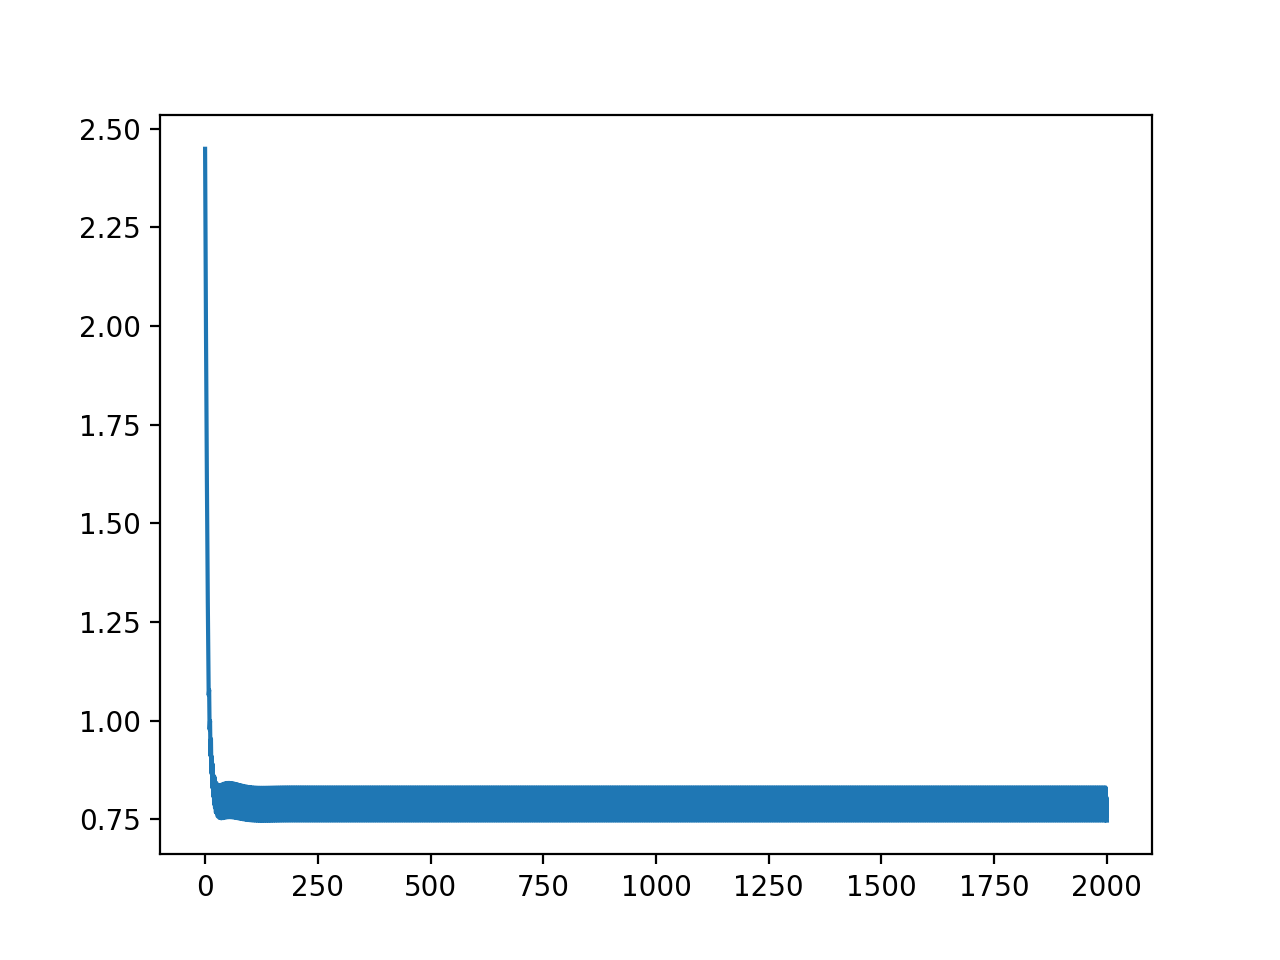

In [604]:
plt.figure()
plt.plot(YY[ix,istim,-1,:,iy])

In [1960]:
Wmy[2,1],Wmy[1,2]

(-2.144034644009146, -0.5218867289146812)

<IPython.core.display.Javascript object>


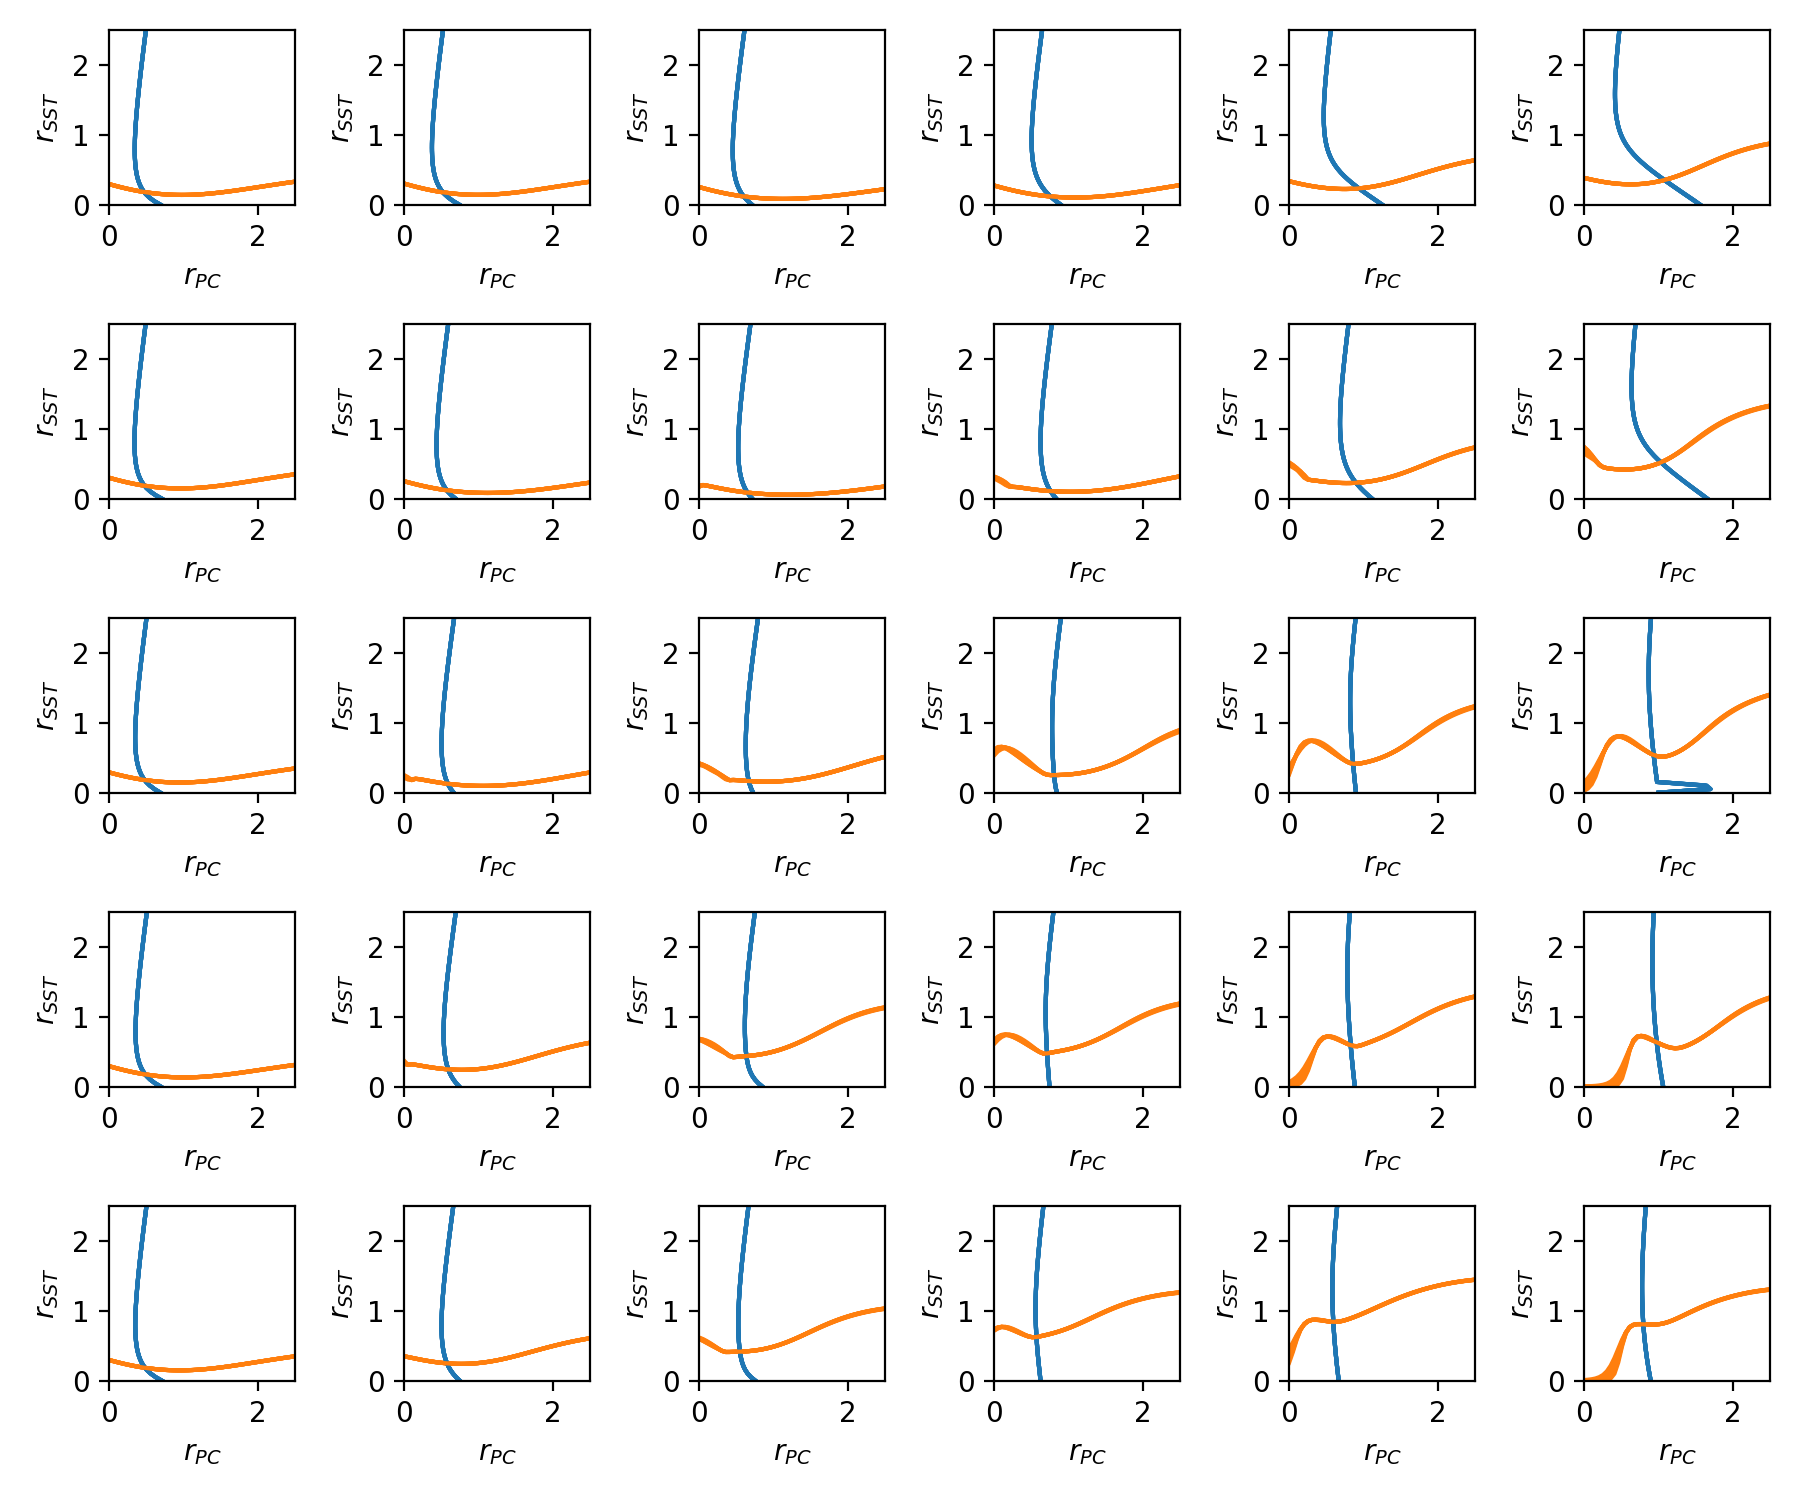

In [1986]:
mag = 1.5
plt.figure(figsize=(ncontrast*mag,nsize*mag))
# YY = np.zeros((Nfix,Nstim,Ny,Niter+1,nS*nQ))
ix = 0
iy = 1
for yy in [YY_ss]:#,YY_F2]:
    linestyles = ['solid','dashed']
    for istim in range(Nstim):
        plt.subplot(nsize,ncontrast,stim_vals[istim]+1)
        for it in np.arange(-1001,0,200):
            xvals = yy[iy,istim,:,it,ix]
            gd = xvals < max_val
            plt.plot(xvals[gd],yvals[gd],label='$dr_{PC}/dt=0$',c='C0',linestyle=linestyles[idir])
            xvals = yy[ix,istim,:,it,iy]
            gd = xvals < max_val
            plt.plot(yvals[gd],xvals[gd],label='$dr_{SST}/dt=0$',c='C1',linestyle=linestyles[idir])
    #     plt.legend()
        plt.xlabel('$r_{%s}$' % lbls[ix])
        plt.ylabel('$r_{%s}$' % lbls[iy])
#         plt.axis('equal')
        plt.ylim((0,1*max_val))
        plt.xlim((0,1*max_val))
    plt.tight_layout()

In [2101]:
nstar = len(trystars_i)
Niter = int(3e3)
fix_dim = [0,1,2,3]
Nfix = len(fix_dim)
# YY = [None for ifix in range(Nfix)]
Ny = 50
max_val = 2.5
yvals = np.linspace(0,max_val,Ny)
stim_vals = np.arange(30)
Nstim = len(stim_vals)
for istar in (0,): #range(nstar):
    print(istar)
#     ti,tj = trystars_i[istar],trystars_j[istar]
    Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = Wstar_dict['as_list'] #Wt[ti][tj]
    YY_ctrl = compute_steady_state(Wstar_dict['as_list'],Niter=int(5e2),dt=1e-1,perturbation_size=5e-2,max_val=None,Ny=None,fix_dim=None,stim_vals=None)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


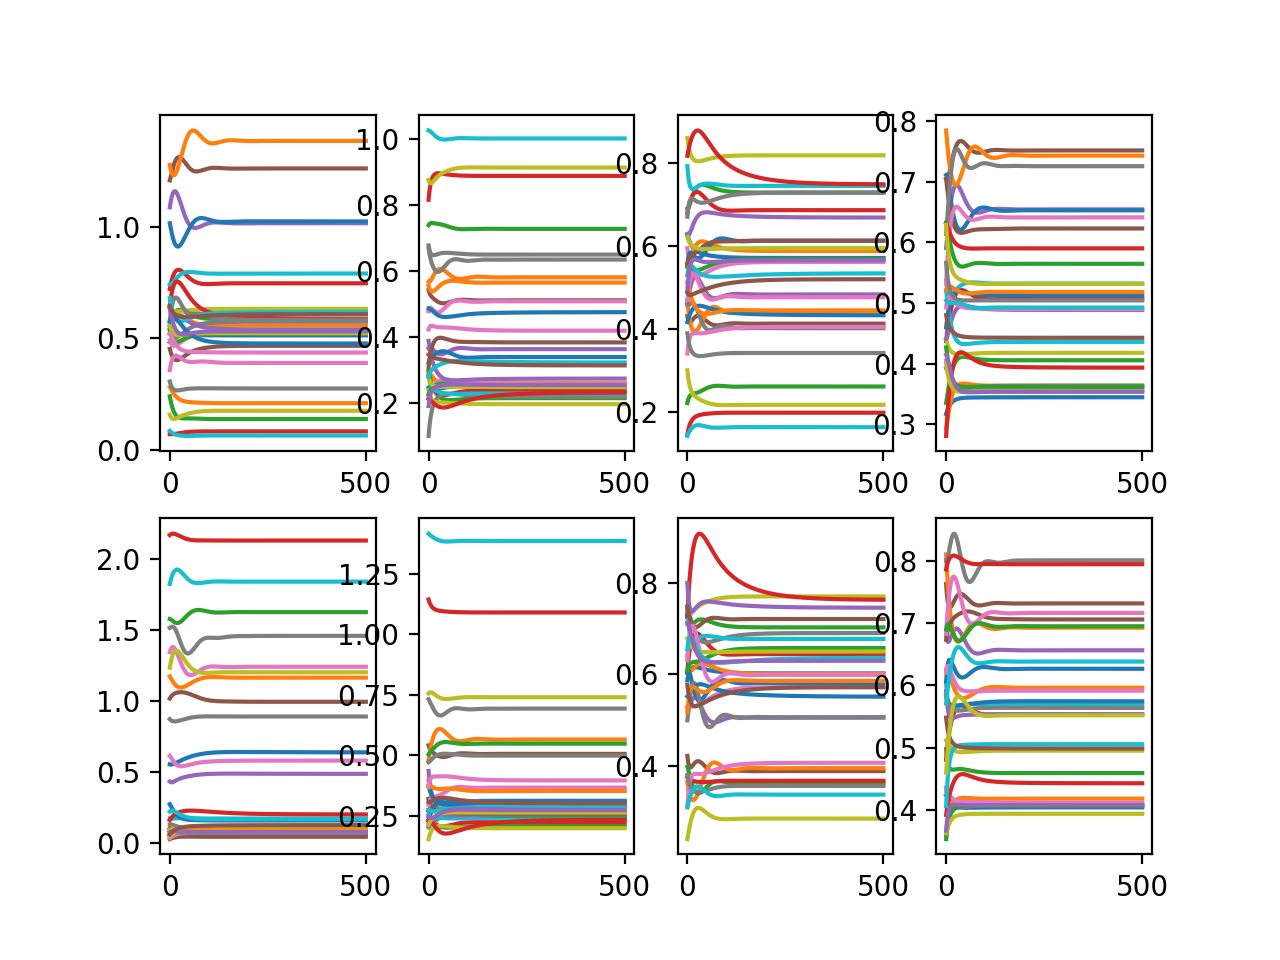

In [2104]:
plt.figure()
for icelltype in range(8):
    plt.subplot(2,4,icelltype+1)
    plt.plot(YY_ctrl[:,:,icelltype].T)

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


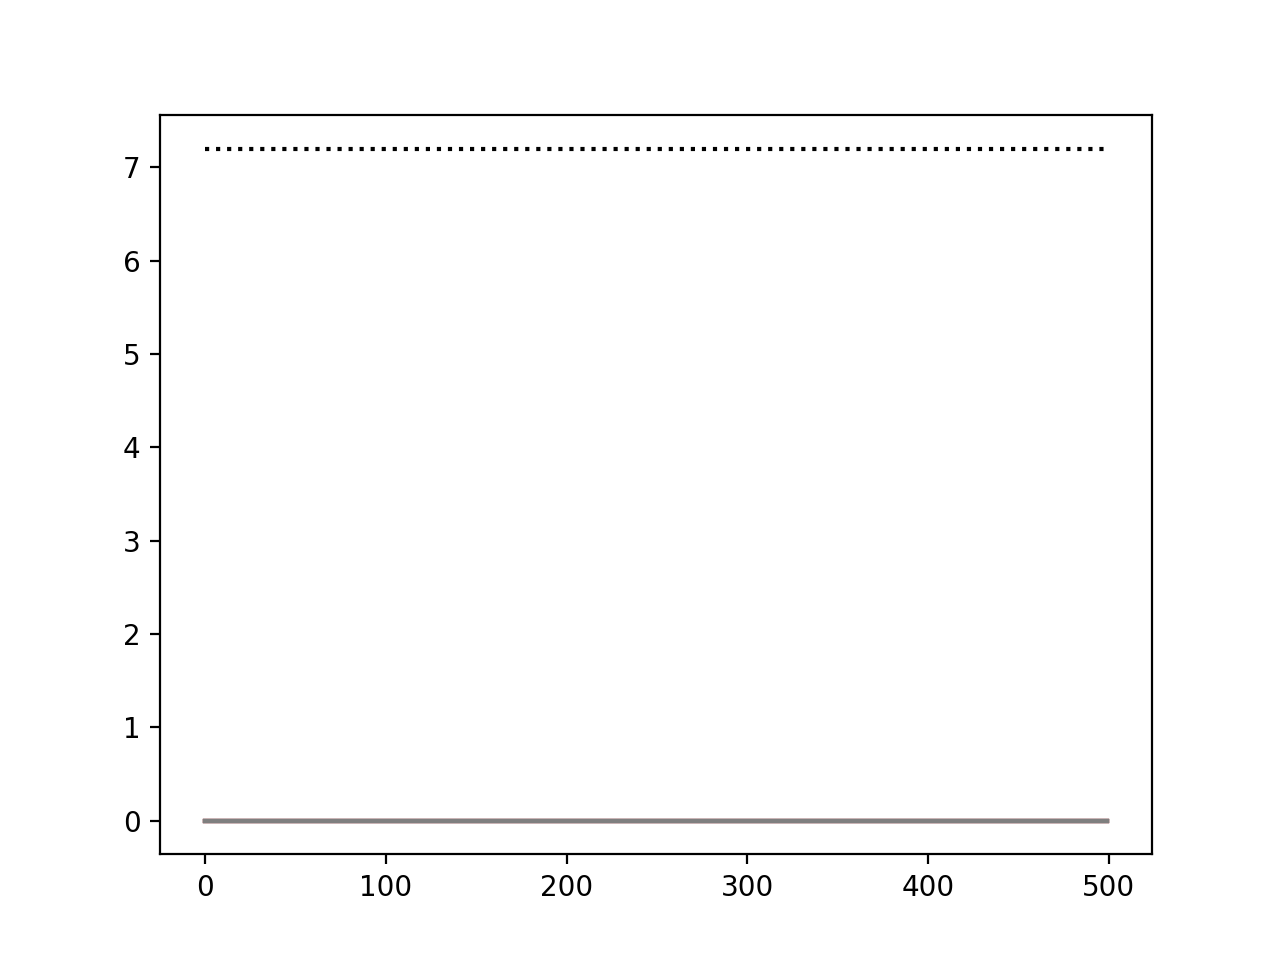

In [2105]:
istim = 29
iy = 0
others = np.arange(8)!=iy
# this_yy = YY_F2[iy,istim,:,iinit,:,:]
this_yy = YY_ss[iy,istim,:,:,:]
def fY(XX,YY):
    return compute_f_(resEta[istim]+u_fn(XX,YY,Wmx,Wmy,k,kappa),resXi[istim]+u_fn(XX,YY,Wsx,Wsy,k,kappa),s02)
speed = np.sum(np.abs(fY(XX[istim],this_yy)-this_yy)[:,:,others],-1)
plt.figure()
this_one = 25
plt.plot(speed[this_one,-500:].T,c='k',linestyle='dotted')
plt.plot(YY_ss[iy,istim,this_one,-500:,:])

In [1414]:
fY(XX[istim],this_yy).shape

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  


(50, 4001, 8)

<IPython.core.display.Javascript object>


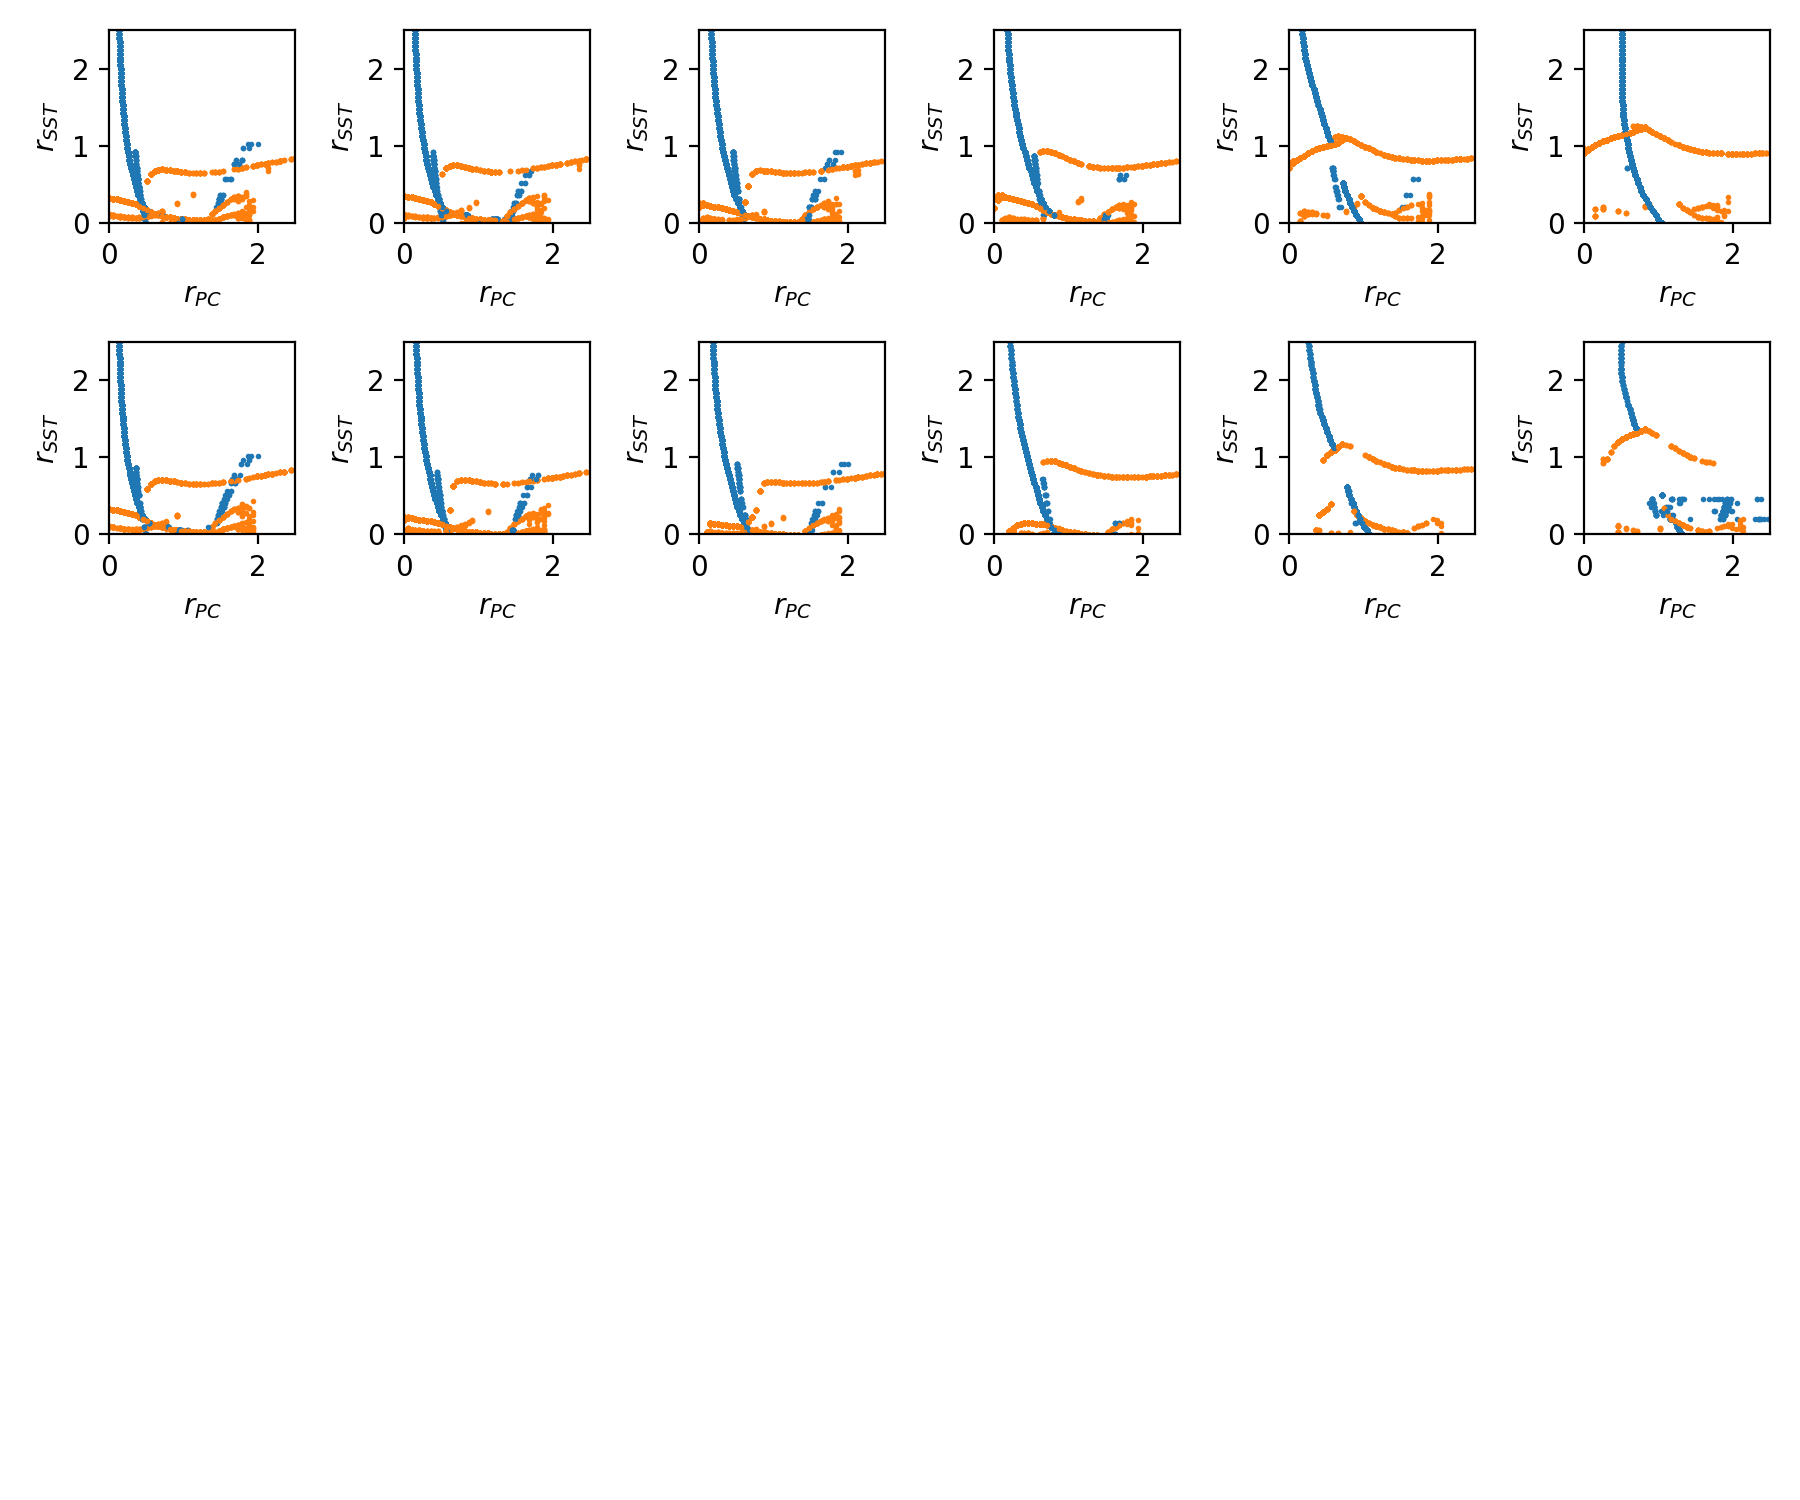

In [1399]:
mag = 1.5
plt.figure(figsize=(ncontrast*mag,nsize*mag))
# YY = np.zeros((Nfix,Nstim,Ny,Niter+1,nS*nQ))
ix = 0
iy = 1
idir = 0
for yy in [YY_F2]:
    linestyles = ['solid','dashed']
    for istim in range(12):#Nstim):
        def fY(YY):
            return compute_f_(resEta[stim_vals[istim]]+u_fn(XX[stim_vals[istim]],YY,Wmx,Wmy,k,kappa),resXi[stim_vals[istim]]+u_fn(XX[stim_vals[istim]],YY,Wsx,Wsy,k,kappa),s02)
        plt.subplot(nsize,ncontrast,stim_vals[istim]+1)
        for it in (-250,-100,-1):
            for iinit in range(Nx):
                this_yy = yy[iy,istim,:,iinit,it,:]
                xvals = yy[iy,istim,:,iinit,it,ix]
                gd = (xvals < max_val) & np.sum(np.abs(fY(this_yy)-this_yy),-1)<1e-4
                plt.scatter(xvals[gd],yvals[gd],label='$dr_{PC}/dt=0$',c='C0',linestyle=linestyles[idir],s=1)
                xvals = yy[ix,istim,:,iinit,it,iy]
                gd = xvals < max_val
                plt.scatter(yvals[gd],xvals[gd],label='$dr_{SST}/dt=0$',c='C1',linestyle=linestyles[idir],s=1)
    #     plt.legend()
        plt.xlabel('$r_{%s}$' % lbls[ix])
        plt.ylabel('$r_{%s}$' % lbls[iy])
#         plt.axis('equal')
        plt.ylim((0,1*max_val))
        plt.xlim((0,1*max_val))
    plt.tight_layout()

<IPython.core.display.Javascript object>


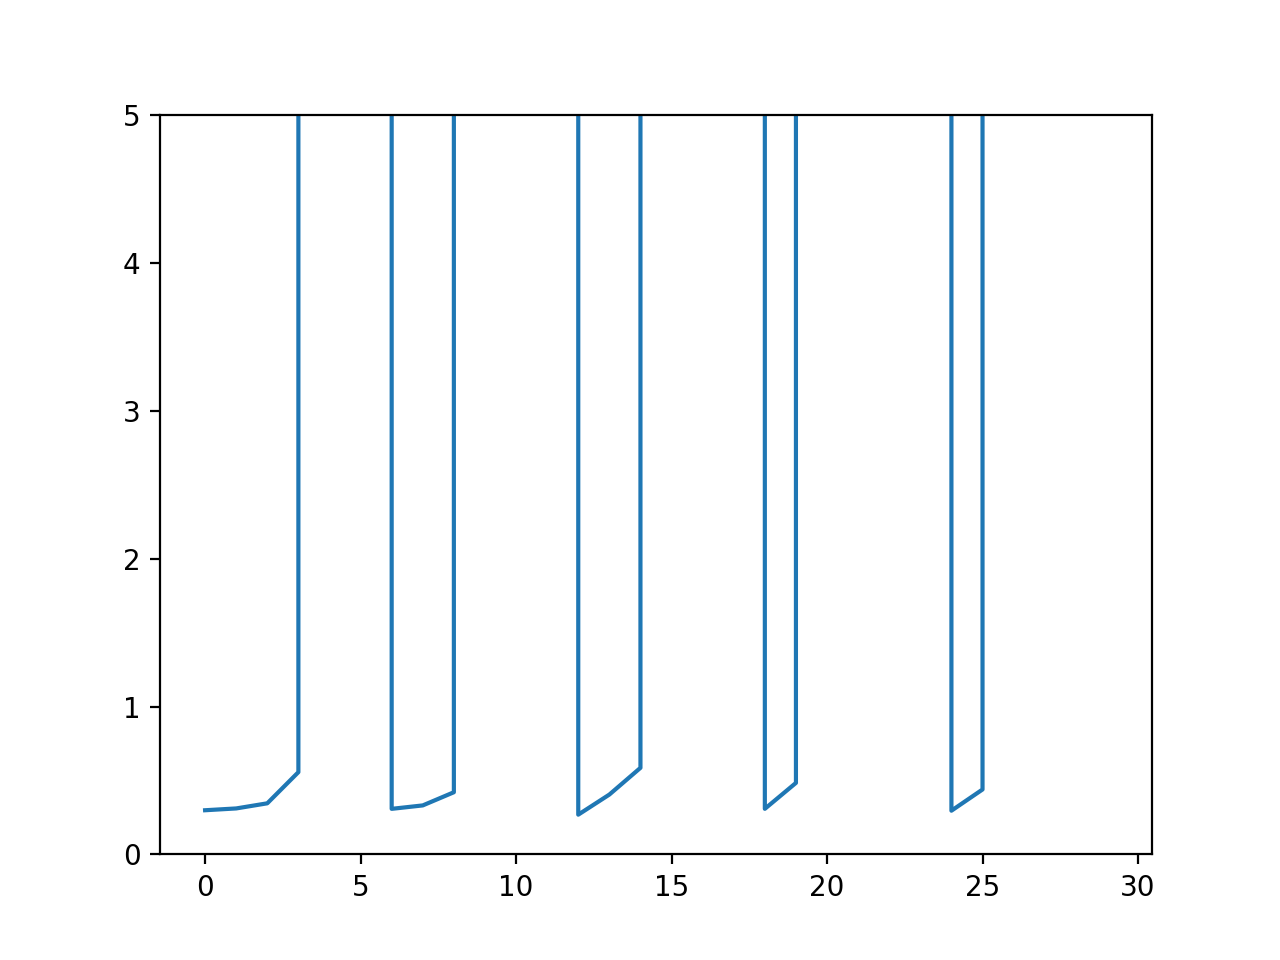

(0, 5)

In [873]:
plt.figure()
plt.plot(YY[iy,:,0,it,ix])
plt.ylim((0,5))

<IPython.core.display.Javascript object>


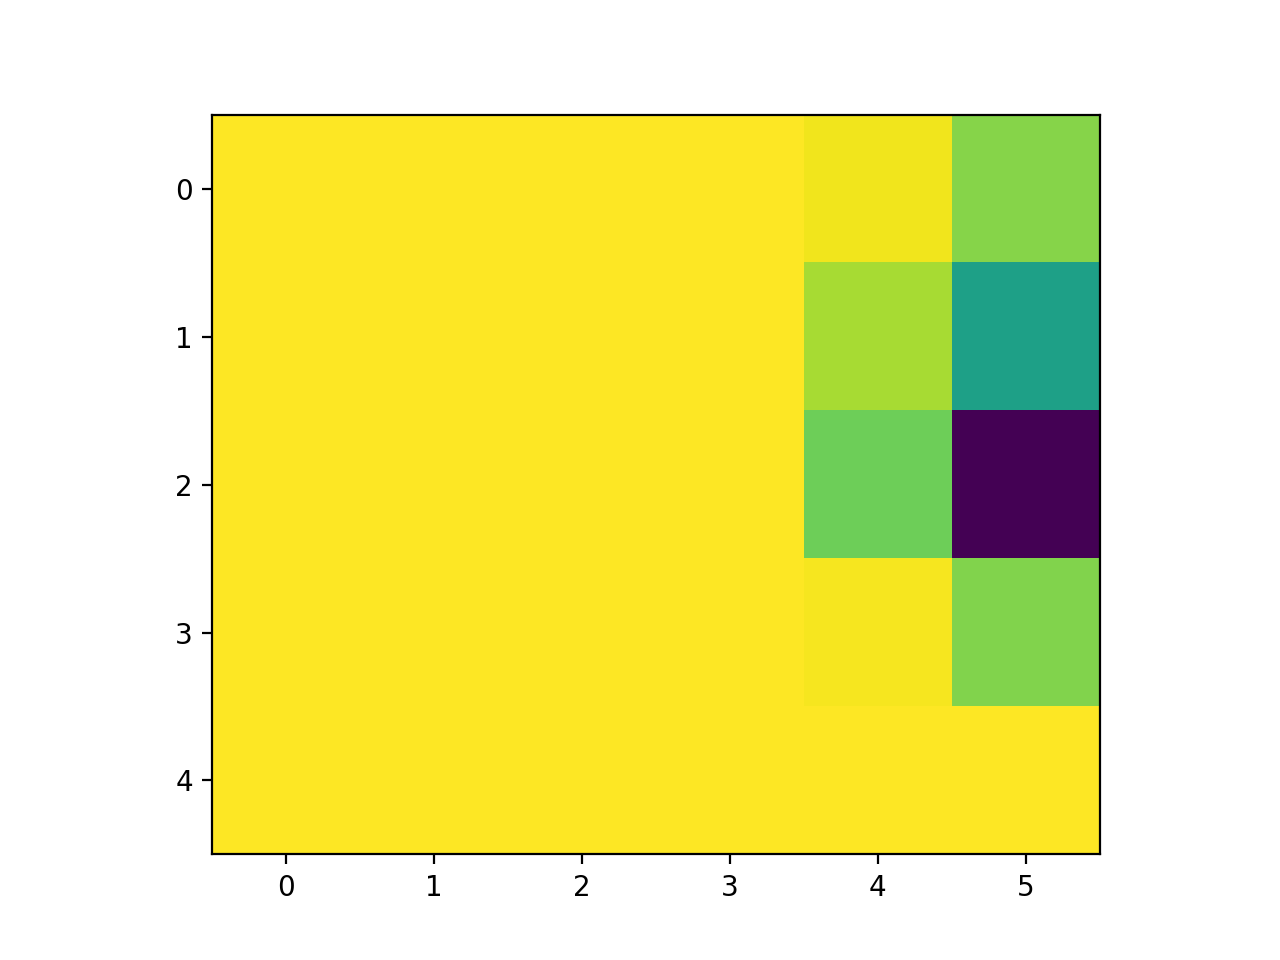

In [464]:
plt.figure()
istim = -12
plt.imshow((YY[0][:,1000,0]-YY[0][:,-1,0]).reshape((nsize,ncontrast)))

In [424]:
YY[0].shape

(30, 2001, 8)

<IPython.core.display.Javascript object>


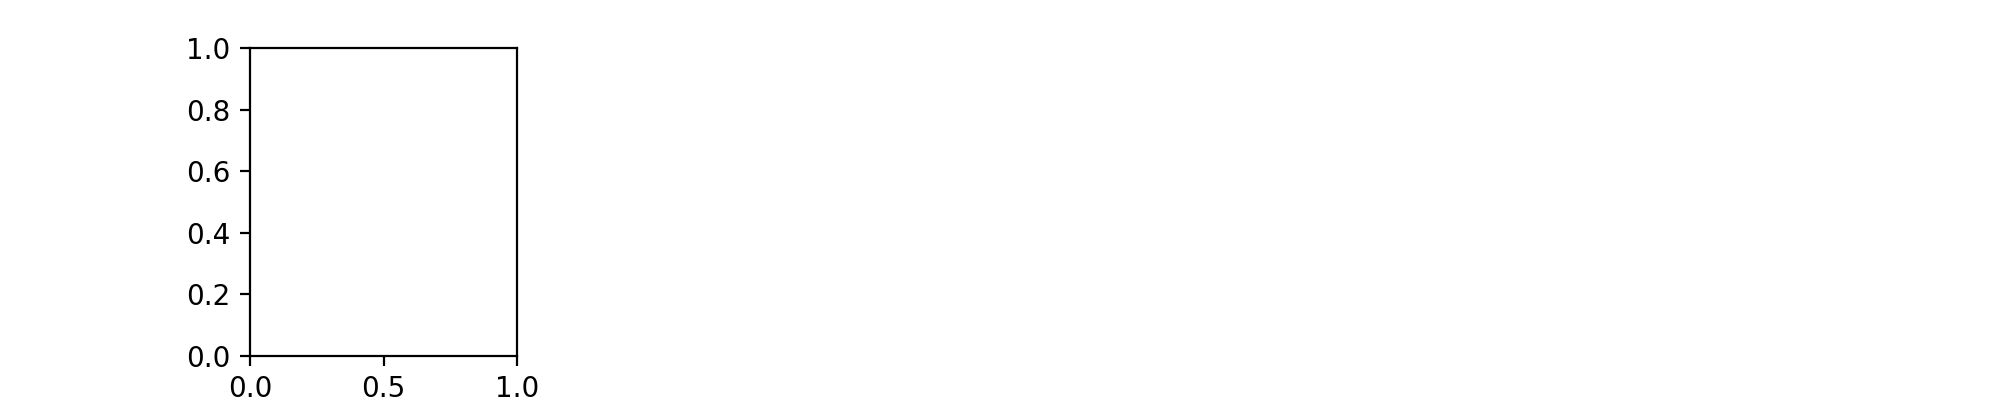

IndexError: too many indices for array

In [1268]:
mag = 2
plt.figure(figsize=(mag*ncelltypes,mag))
for icelltype in range(nQ):
    plt.subplot(1,ncelltypes,icelltype+1)
    plt.imshow(YY[:,:,-1,icelltype],vmin=0,interpolation='bilinear')
    plt.axis('off')

In [1278]:
nstar = len(trystars_i)
YY_no_vip = [None for istar in range(nstar)]
YY_no_sst = [None for istar in range(nstar)]
for istar in range(nstar):
    print(istar)
    ti,tj = trystars_i[istar],trystars_j[istar]
    Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = Wt[ti][tj]
    YY = compute_f_(Eta,Xi,s02)
    resEta = Eta - u_fn(XX,YY,Wmx,Wmy,k,kappa)
    resXi = Xi - u_fn(XX,YY,Wsx,Wsy,k,kappa)
    def fY(XX,YY,resEta,resXi):
        return compute_f_(u_fn(XX,YY,Wmx,Wmy,k,kappa)+resEta,u_fn(XX,YY,Wsx,Wsy,k,kappa)+resXi,s02)
    def thisfY(YY0):
        return fY(XX,YY0,resEta,resXi)
    def predict_YY_silencing(YY0,XX,resEta,resXi,silenced,eta=1e-4):
        def dYYdt(YY):
            return -YY + thisfY(YY)
        YY = YY0.copy() #np.zeros((nN,nS*nQ))
        dYY = np.ones_like(YY)
        iiter = 0
        while iiter < 1e4: #np.abs(dYY).sum()>1e-8*np.abs(YY).sum():
            iiter = iiter+1
            dYY = eta*dYYdt(YY)
            YY = YY + dYY
            YY[:,silenced] = 0
        return YY
    silenced = np.array((0,0,1,0,0,0,1,0),dtype='bool')
    YY_no_vip[istar] = predict_YY_silencing(YY,XX,resEta,resXi,silenced)
    silenced = np.array((0,1,0,0,0,1,0,0),dtype='bool')
    YY_no_sst[istar] = predict_YY_silencing(YY,XX,resEta,resXi,silenced)

0


In [1224]:
# plt.figure()
# inputs = XXhat[:,[0,2]]
# sort_inp = np.argsort(inputs[:,0])
# plt.scatter(inputs[:,0],inputs[:,1])

<IPython.core.display.Javascript object>


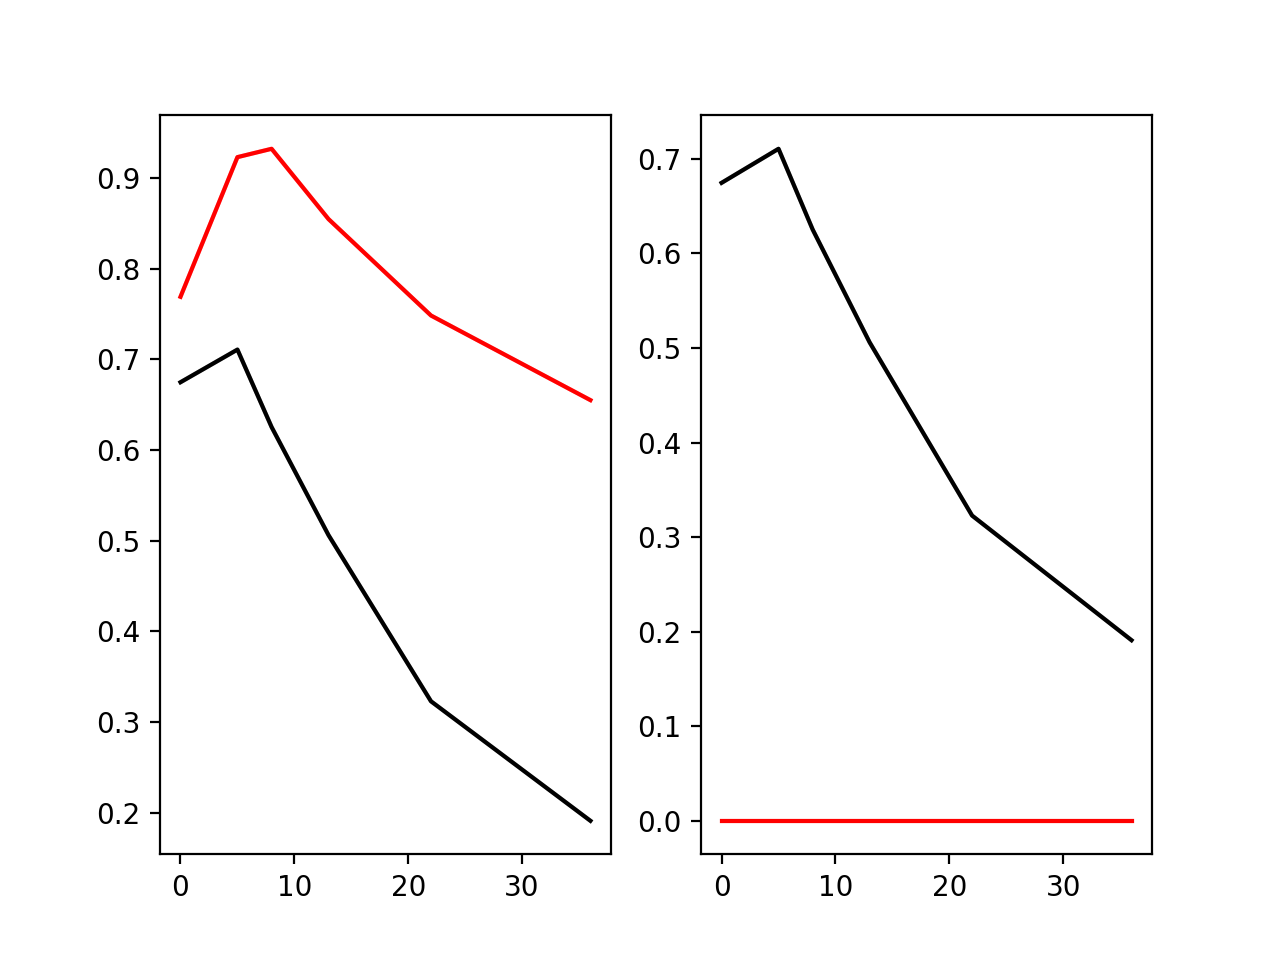

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [1270]:
plt.figure()
alpha1 = 0.25
ic = 2
icontrast = 5
colors = ['k','r']
def norm01(arr):
    return (arr-arr.min())/(arr.max()-arr.min())
for istar in range(nstar):
    ti,tj = trystars_i[istar],trystars_j[istar]
    Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = Wt[ti][tj]
    YY = compute_f_(Eta,Xi,s02)
    plt.subplot(1,2,1)
    usize0 = (0,5,8,13,22,36)
    sc = YY[:,ic].reshape((nsize,ncontrast))
    to_plot = np.concatenate(((sc[:,0].mean(),),sc[:,icontrast]))
    if istar == 0:
        avg_curves = np.zeros((2,2,)+to_plot.shape)
    avg_curves[0,0] = avg_curves[0,0] + to_plot/nstar
    plt.plot(usize0,to_plot,c=colors[0],alpha=alpha1)
    sc = YY_no_sst[istar][:,ic].reshape((nsize,ncontrast))
    to_plot = np.concatenate(((sc[:,0].mean(),),sc[:,icontrast]))
    avg_curves[0,1] = avg_curves[0,1] + to_plot/nstar
    plt.plot(usize0,to_plot,c=colors[1],alpha=alpha1)
    plt.subplot(1,2,2)
    usize0 = (0,5,8,13,22,36)
    sc = YY[:,ic].reshape((nsize,ncontrast))
    to_plot = np.concatenate(((sc[:,0].mean(),),sc[:,icontrast]))
    avg_curves[1,0] = avg_curves[1,0] + to_plot/nstar
    plt.plot(usize0,to_plot,c=colors[0],alpha=alpha1)
    sc = YY_no_vip[istar][:,ic].reshape((nsize,ncontrast))
    to_plot = np.concatenate(((sc[:,0].mean(),),sc[:,icontrast]))
    avg_curves[1,1] = avg_curves[1,1] + to_plot/nstar
    plt.plot(usize0,to_plot,c=colors[1],alpha=alpha1)
for imanip in range(2):
    plt.subplot(1,2,imanip+1)
    plt.plot(usize0,avg_curves[imanip,0],c=colors[0])
    plt.plot(usize0,avg_curves[imanip,1],c=colors[1])
    

<IPython.core.display.Javascript object>


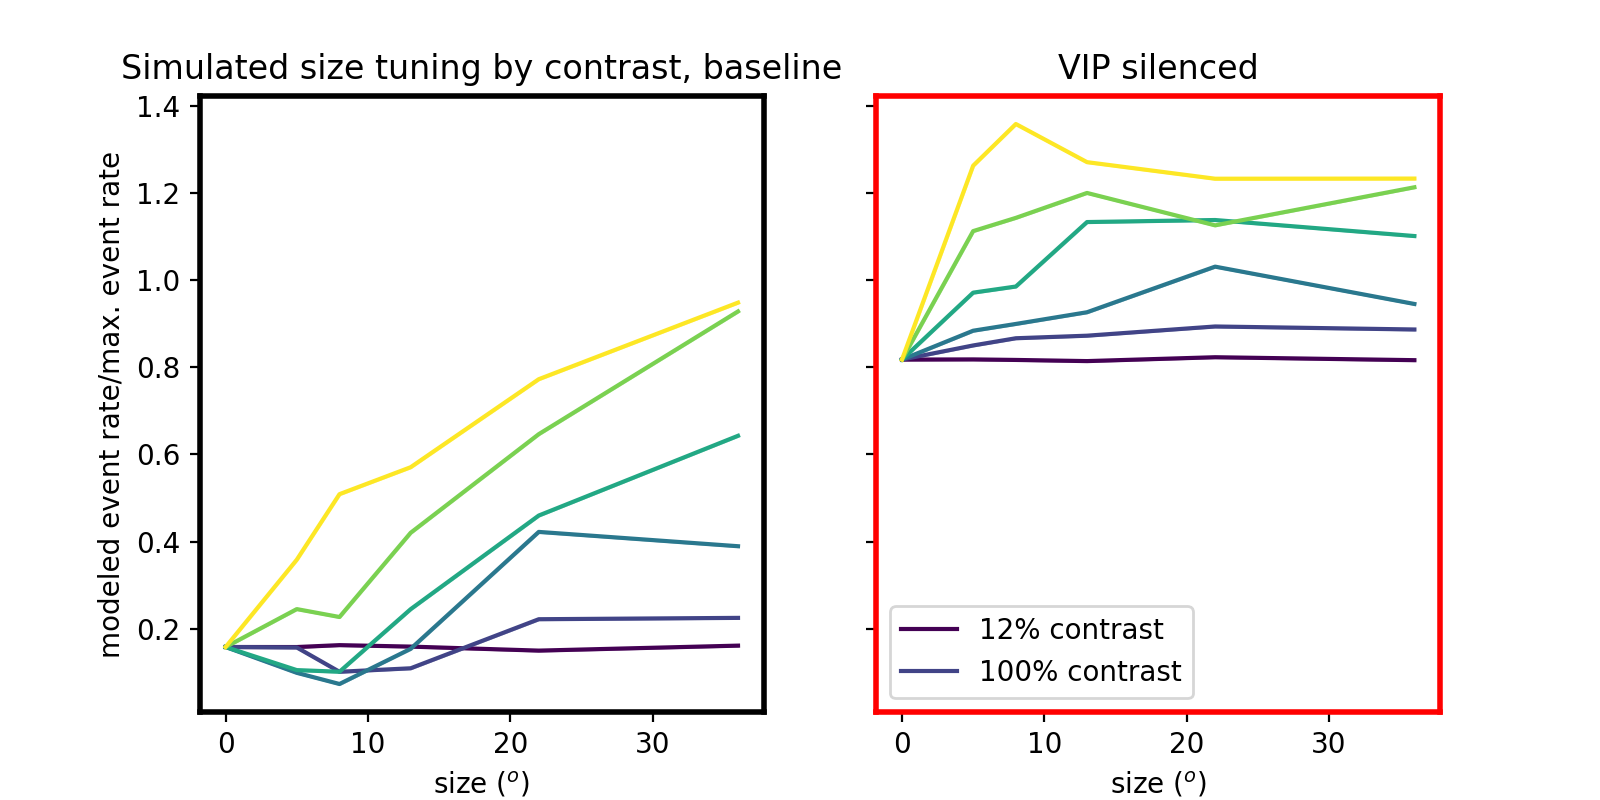

In [1281]:
fig,axes = plt.subplots(1,2,sharey=True,figsize=(8,4))
alpha1 = 0.25
ic = 1
icontrasts = np.arange(6)
colors = ['k','r']
colors = plt.cm.viridis(np.linspace(0,1,6))
nstar = 1
def norm01(arr):
    return (arr-arr.min())/(arr.max()-arr.min())
for icontrast in icontrasts:
    for istar in range(nstar):
        ti,tj = trystars_i[istar],trystars_j[istar]
        Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = Wt[ti][tj]
        YY = compute_f_(Eta,Xi,s02)
        usize0 = (0,5,8,13,22,36)
        sc = YY[:,ic].reshape((nsize,ncontrast))
        to_plot = np.concatenate(((sc[:,0].mean(),),sc[:,icontrast]))
        if istar == 0:
            avg_curves = np.zeros((2,2,)+to_plot.shape)
            to_plots = [np.zeros((0,)+to_plot.shape) for il in range(2)]
        avg_curves[1,0] = avg_curves[1,0] + to_plot/nstar
#         plt.subplot(1,2,1)
        to_plots[0] = np.concatenate((to_plots[0],to_plot[np.newaxis]))
#         plt.plot(usize0,to_plot,c=colors[icontrast],alpha=alpha1)
        sc = YY_no_vip[istar][:,ic].reshape((nsize,ncontrast))
        to_plot = np.concatenate(((sc[:,0].mean(),),sc[:,icontrast]))
        avg_curves[1,1] = avg_curves[1,1] + to_plot/nstar
#         plt.subplot(1,2,2)
#         plt.plot(usize0,to_plot,c=colors[icontrast],alpha=alpha1)
        to_plots[1] = np.concatenate((to_plots[1],to_plot[np.newaxis]))
    for il in range(2):
#         plt.subplot(1,2,il+1)
        axes[il].plot(usize0,avg_curves[1,il],c=colors[icontrast])
        lb,ub = ut.bootstrap(to_plots[il],pct=(16,84),fn=np.nanmean,axis=0)
        axes[il].fill_between(usize0,lb,ub,color=colors[icontrast],alpha=alpha1)
# plt.subplot(1,2,1)
# plt.title('Center-aligned, response to 12% contrast')
# plt.subplot(1,2,1)
axes[0].set_ylabel('modeled event rate/max. event rate')
axes[0].set_xlabel('size ($^o$)')
axes[1].set_xlabel('size ($^o$)')
plt.setp(axes[0].spines.values(),color='k',linewidth=2)
plt.setp(axes[1].spines.values(),color='r',linewidth=2)
axes[0].set_title('Simulated size tuning by contrast, baseline')
axes[1].set_title('VIP silenced')
axes[1].legend(['12% contrast','100% contrast'])
# plt.savefig('figures/modeled_vip_halo_size_tuning_by_contrast_fill_between.jpg',dpi=300)

In [428]:
(ti,),(tj,) = np.where(loss==np.min(loss)) #2*loss.min()
[Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,YY,Eta,Xi] = Wt[ti][tj]

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


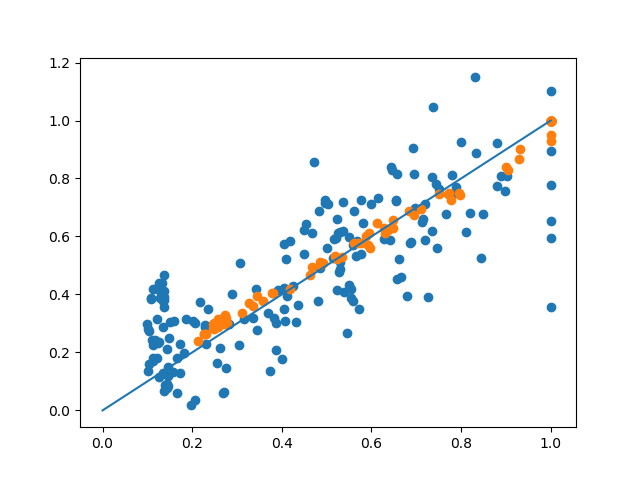

In [429]:
plt.figure()
XXhat = np.concatenate(Xhat,axis=1)
YYhat = np.concatenate(Yhat,axis=1)
plt.scatter(YYhat.flatten(),YY.flatten())
plt.scatter(XXhat.flatten(),XX.flatten())
plt.plot((0,1),(0,1))

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


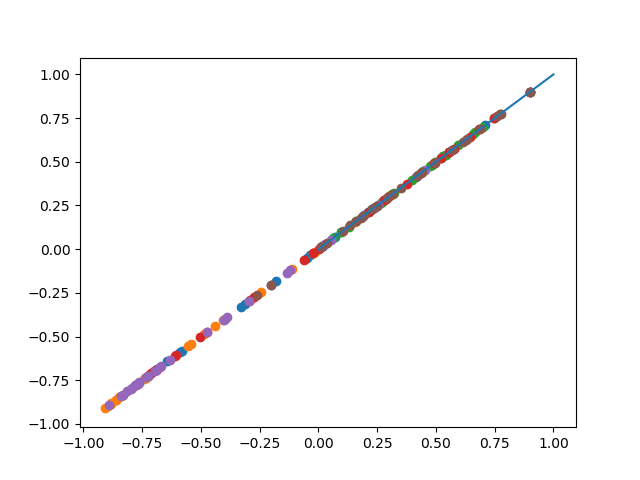

In [430]:
Etas = u_fn(XX,YY,Wmx,Wmy,k,kappa)
plt.figure()
for ic in range(6):
    plt.scatter(Eta[:,ic],Etas[:,ic])
plt.plot((0,1),(0,1))

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


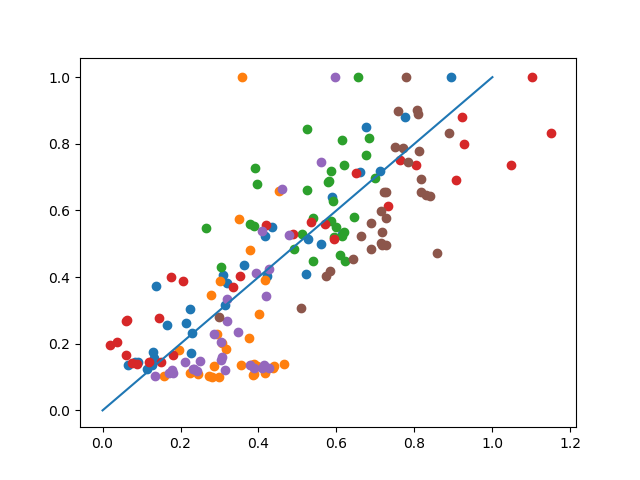

In [431]:
plt.figure()
YYs = compute_f_(Eta,Xi,s02)
for ic in range(6):
    plt.scatter(YY[:,ic],YYs[:,ic])
plt.plot((0,1),(0,1))

<IPython.core.display.Javascript object>


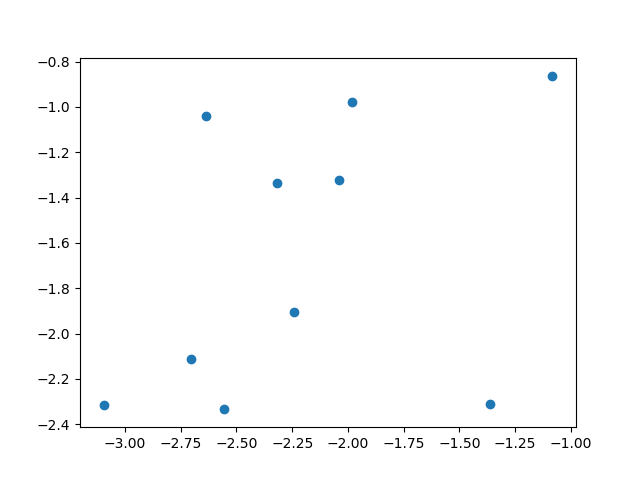

In [291]:
plt.figure()
plt.scatter(wmys[:,1,0],wmys[:,2,1])

In [514]:
wmys = np.concatenate([w[1][np.newaxis] for w in np.concatenate(Wt)],axis=0)
# trystar = np.argmax(wmys[:,1,0]*wmys[:,2,1])
# trystar = np.argmin(loss)

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


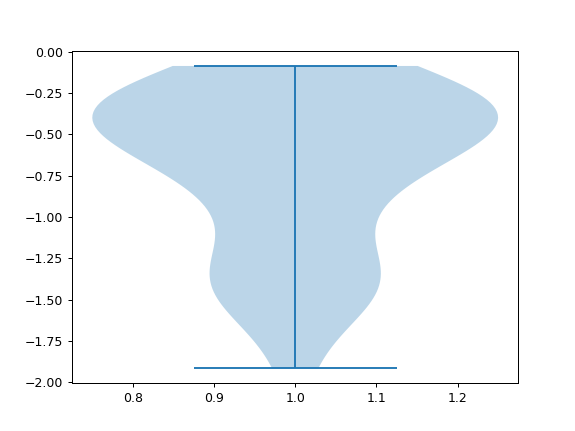

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f1bdc083a90>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f1bdb9cec50>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f1bdc083790>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f1bdc083990>}

In [516]:
plt.figure()
plt.violinplot(wmys[:,1,0])

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


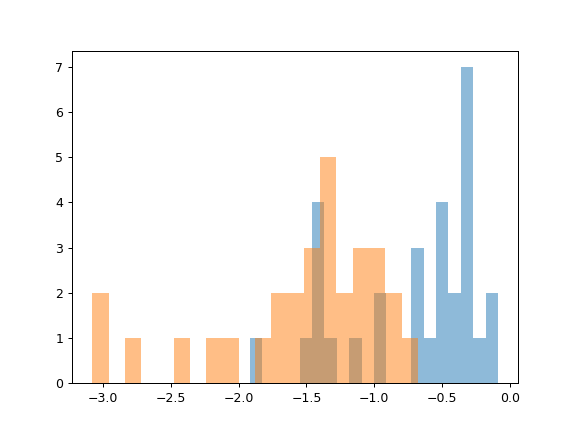

(array([2., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 2., 2., 3., 5., 2., 3.,
        3., 2., 1.]),
 array([-3.08046601, -2.96038626, -2.84030651, -2.72022677, -2.60014702,
        -2.48006727, -2.35998753, -2.23990778, -2.11982804, -1.99974829,
        -1.87966854, -1.7595888 , -1.63950905, -1.51942931, -1.39934956,
        -1.27926981, -1.15919007, -1.03911032, -0.91903057, -0.79895083,
        -0.67887108]),
 <a list of 20 Patch objects>)

In [515]:
plt.figure()
plt.hist(wmys[:,1,0],bins=20,alpha=0.5)
plt.hist(wmys[:,2,1],bins=20,alpha=0.5)

In [518]:
ws = [np.concatenate([w[q][np.newaxis] for w in np.concatenate(Wt)],axis=0) for q in range(len(Wt[0][0]))]
[Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,YY,Eta,Xi] = ws

In [541]:
ws = [np.concatenate([Wt[ti][tj][q][np.newaxis] for ti,tj in zip(trystars_i,trystars_j)],axis=0) for q in range(len(Wt[0][0]))]
[Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,YY,Eta,Xi] = ws

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


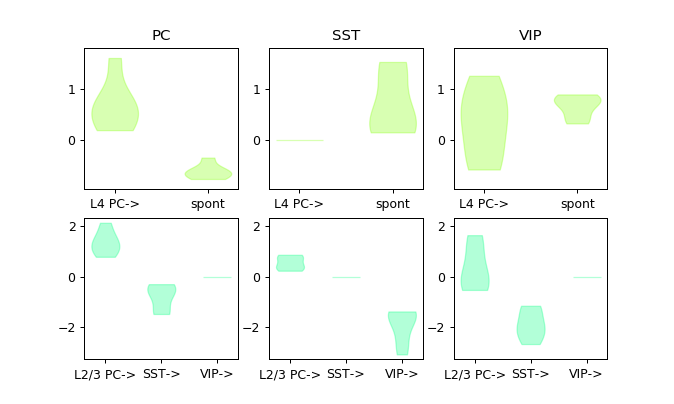

In [552]:
# ws = [np.concatenate([w[q][np.newaxis] for w in np.concatenate(Wt)],axis=0) for q in range(len(Wt[0][0]))]
# [Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,YY,Eta,Xi] = ws
plt.figure(figsize=(7.5,4.5))
for datas in [[Wmx,Wmy]]:#,[Wsx,Wsy]]:
    titles = ['PC','SST','VIP']
    data = datas[0]
    x = np.arange(1,data.shape[1]+1)
    xlbl = ['L4 PC->','spont']
    for icelltype in range(3):
        plt.subplot(2,3,icelltype+1)
        violin_parts = plt.violinplot([data[:,i,icelltype] for i in range(data.shape[1])],showextrema=False)
        for pc in violin_parts['bodies']:
            pc.set_facecolor([0.5,1,0.0])
            pc.set_edgecolor([0.5,1,0.0])
        plt.xticks(x,xlbl)
        plt.ylim(data.min()-0.2,data.max()+0.2)
        plt.title(titles[icelltype])
#     plt.figure(figsize=(7.5,2))
    data = datas[1]
    x = np.arange(1,data.shape[1]+1)
    xlbl = ['L2/3 PC->','SST->','VIP->']
    for icelltype in range(3):
        plt.subplot(2,3,3+icelltype+1)
#         plt.violinplot([data[:,i,icelltype] for i in range(data.shape[1])])
        violin_parts = plt.violinplot([data[:,i,icelltype] for i in range(data.shape[1])],showextrema=False)
        for pc in violin_parts['bodies']:
            pc.set_facecolor([0.0,1,0.5])
            pc.set_edgecolor([0.0,1,0.5])
        plt.xticks(x,xlbl)
        plt.ylim(data.min()-0.2,data.max()+0.2)
#         plt.title(titles[icelltype])
plt.savefig('violinplots_fit_weights.jpg',dpi=300)

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


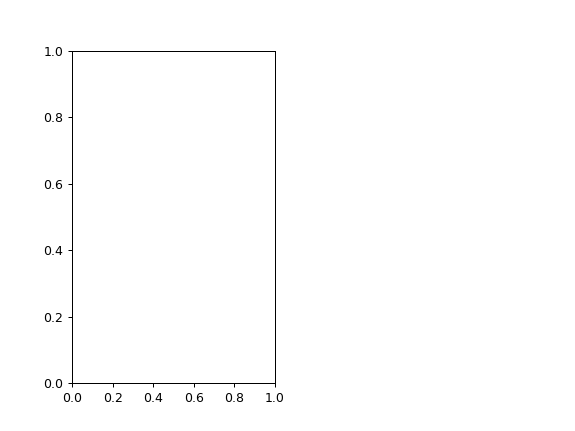

TypeError: list indices must be integers or slices, not tuple

In [543]:
plt.figure()
plt.subplot(1,2,1)
for ic in (0,):
    sca.scatter_size_contrast(YY[:,ic],YY_no_vip[:,ic])
    plt.plot((0,1),(0,1),c='k')
plt.axis('equal')
plt.subplot(1,2,2)
for ic in (0,):
    sca.scatter_size_contrast(YY[:,ic],YY_no_sst[:,ic])
    plt.plot((0,1),(0,1),c='k')
plt.axis('equal')

<IPython.core.display.Javascript object>


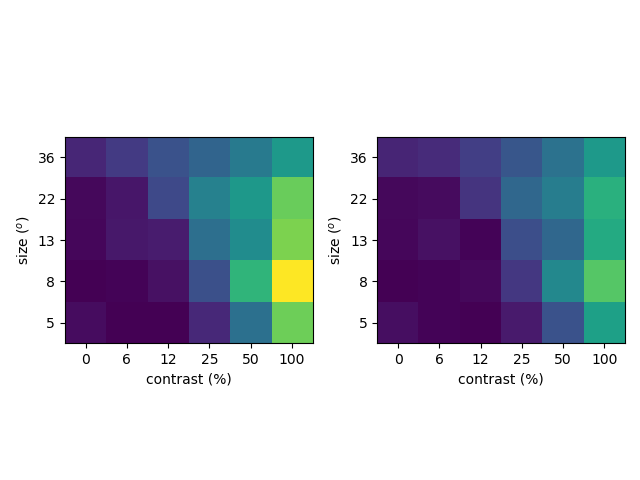

In [327]:
plt.figure()
ic = 0
plt.subplot(1,2,1)
sca.show_size_contrast(YY[:,ic].reshape((nsize,ncontrast)),flipud=True,vmax=YY[:,ic].max())
plt.subplot(1,2,2)
sca.show_size_contrast(YY_no_vip[:,ic].reshape((nsize,ncontrast)),flipud=True,vmax=YY[:,ic].max())
plt.tight_layout()

<IPython.core.display.Javascript object>


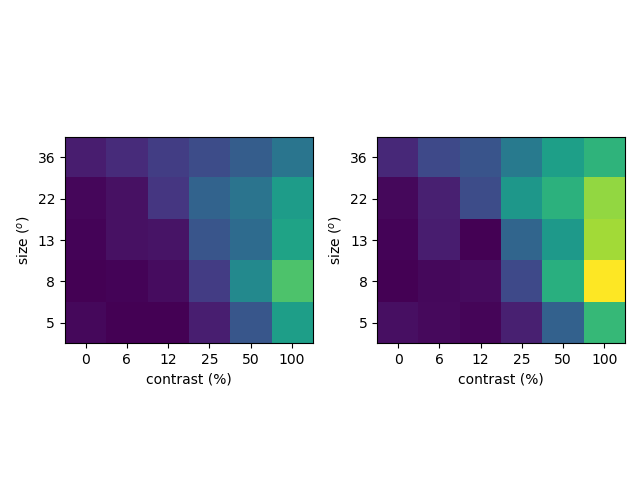

In [330]:
plt.figure()
ic = 0
mx = np.maximum(YY[:,ic].max(),YY_no_sst[:,ic].max())
plt.subplot(1,2,1)
sca.show_size_contrast(YY[:,ic].reshape((nsize,ncontrast)),flipud=True,vmax=mx)
plt.subplot(1,2,2)
sca.show_size_contrast(YY_no_sst[:,ic].reshape((nsize,ncontrast)),flipud=True,vmax=mx)
plt.tight_layout()

<IPython.core.display.Javascript object>


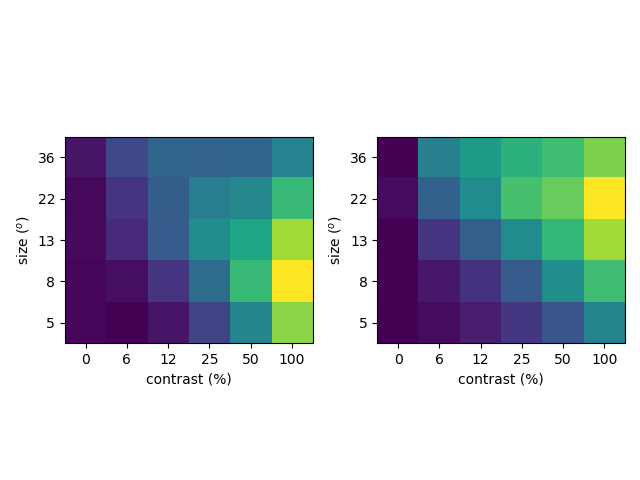

<IPython.core.display.Javascript object>


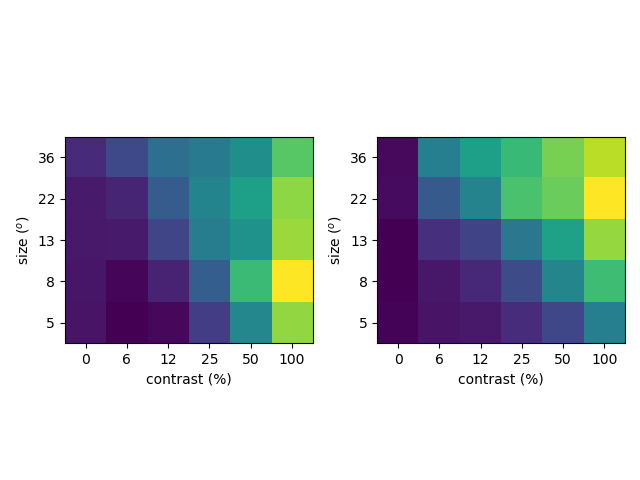

<IPython.core.display.Javascript object>


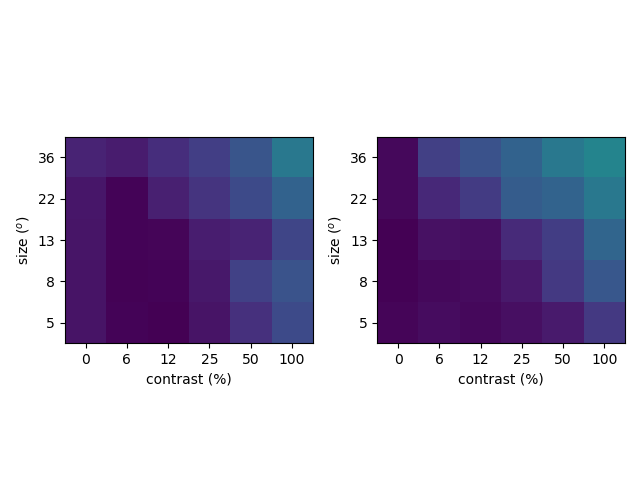

In [296]:
plt.figure()
reload(sca)
plt.subplot(1,2,1)
sca.show_size_contrast(YYhat[:,0].reshape((5,6)),flipud=True)
plt.subplot(1,2,2)
sca.show_size_contrast(YYhat[:,3].reshape((5,6)),flipud=True)
plt.tight_layout()

plt.figure()
reload(sca)
plt.subplot(1,2,1)
sca.show_size_contrast(YY[:,0].reshape((5,6)),flipud=True)
plt.subplot(1,2,2)
sca.show_size_contrast(YY[:,3].reshape((5,6)),flipud=True)
plt.tight_layout()

plt.figure()
reload(sca)
plt.subplot(1,2,1)
sca.show_size_contrast(YY_no_vip[:,0].reshape((5,6)),flipud=True,vmax=YY[:,0].max())
plt.subplot(1,2,2)
sca.show_size_contrast(YY_no_vip[:,3].reshape((5,6)),flipud=True,vmax=YY[:,3].max())
plt.tight_layout()

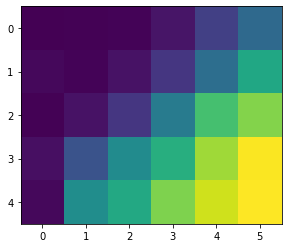

In [382]:
plt.figure()
plt.imshow(XX[:,2].reshape((5,6)))

In [383]:
vip_silencing = np.array((1,1,0,1,1,0))[np.newaxis,:]
Etas = u_fn(XX,YY,Wmx,Wmy,k)
Eta_no_vip = u_fn(XX,vip_silencing*YY,Wmx,Wmy,k) + Eta - Etas
YY_no_vip = compute_f_(Eta_no_vip,Xi,s02)*vip_silencing

In [ ]:
labels = ['Wmx','Wmy','Wsx','Wsy','s02','k','Y','momentum','loss']
Wstar_dict = {}
for i,label in enumerate(labels):
    Wstar_dict[label] = Wstar_t[i]

In [ ]:
evaluate_stability(W0my,k0)

In [ ]:
def sorted_r_eigs(w):
    drW,prW = np.linalg.eig(w)
    srtinds = np.argsort(drW)
    return drW[srtinds],prW[:,srtinds]

def gen_Weight(W,K):
    WW0 = np.concatenate((W,W*K[np.newaxis,:]),axis=1)
    WW1 = np.concatenate((W*K[np.newaxis,:],W),axis=1)
    WW = np.concatenate((WW0,WW1),axis=0)
    return WW
    
def evaluate_stability(Wmy,k):
    W = gen_Weight(Wmy,k)
    drW,prW = sorted_r_eigs(W - np.eye(npixels*nQ))
    return np.real(drW[-1])

In [ ]:
t = 999
W0mx,W0my,W0sx,W0sy,s020,k0 = [Wstar_t2[i][t].copy() for i in range(6)]

In [ ]:
nbeta = 51
loss = np.zeros((nbeta,))
stability = np.zeros((nbeta,))
betas = np.linspace(-1,1,nbeta)
vecY = np.random.randn(nQ,nQ)
vecX = np.random.randn(nP,nQ)
for ibeta,beta in enumerate(betas):
    perturbationY = beta*vecY
    perturbationX = beta*vecX
#     perturbationY = beta*np.array(((-1,0,0),(0,0,-1),(0,-1,0))) #beta*np.array(((2,0,0),(0,0,0),(0,0,0))) #perturbationY = beta*np.array(((0,0,0),(0,0,-1),(0,0,0))) # np.array(((0,0,0),(-1,0,0),(0,0,0)))
#     perturbationX = beta*np.array(((-1,0,0),(0,0,0))) #beta*np.array(((-1,0,0),(0,0,0))) #perturbationX = beta*np.array(((0,0,1),(0,0,0)))
#     perturbationSY = 0*beta*np.array(((0,0,0),(0,0,1),(0,0,0)))
    Wmy_beta = perturbationY+W0my.copy()
    Wmx_beta = perturbationX+W0mx.copy()
#     Wsy_beta = perturbationSY+W0sy.copy()
    loss[ibeta] = evaluate_LW(X.copy(),Yhat.copy(),pop_rate_fn=f_miller_troyer,neuron_rate_fn=evaluate_f_mt,Y0=Y0.copy(),W0mx=Wmx_beta,W0my=Wmy_beta,W0sx=W0sx.copy(),W0sy=W0sy,s020=s020.copy(),k0=k0.copy(),bounds=bounds,weight=weight)
    stability[ibeta] = evaluate_stability(Wmy_beta,k0)

In [ ]:
plt.figure()
lkat = stability < 0
plt.plot(betas[lkat],loss[lkat])
plt.plot(betas[lkat],stability[lkat])
plt.ylim(-1,0.5)

In [ ]:
(betas[lkat][np.argmin(loss[lkat])],np.min(loss[lkat]))

In [ ]:
beta_star = betas[lkat][np.argmin(loss[lkat])]

In [ ]:
niter = int(1e3)
eta = 0.3
gamma = 0.9
weight = np.array((0,1,0))
beta = 0
perturbationY = beta*beta_star*vecY*1e-2
perturbationX = beta*beta_star*vecX*1e-2
# perturbationY = 0*beta*np.array(((-1,0,0),(0,0,-1),(0,-1,0))) #beta*np.array(((2,0,0),(0,0,0),(0,0,0))) #perturbationY = beta*np.array(((0,0,0),(0,0,-1),(0,0,0))) # np.array(((0,0,0),(-1,0,0),(0,0,0)))
# perturbationX = 0*beta*np.array(((-1,0,0),(0,0,0))) #beta*np.array(((-1,0,0),(0,0,0))) #perturbationX = beta*np.array(((0,0,1),(0,0,0)))
# # perturbationSY = beta*np.array(((0,0,0),(0,0,1),(0,0,0)))
# thisY0 = np.ones_like(Y0)
Y0 = [np.concatenate([x.mean(0)[:,np.newaxis] for x in Yhat[ialign]],axis=1) for ialign in range(npixels)]
Wstar_t2 = fit_W_momentum(X.copy(),Yhat.copy(),pop_rate_fn=f_miller_troyer,neuron_rate_fn=evaluate_f_mt,Y0=Y0.copy(),W0mx=perturbationX+W0mx.copy(),W0my=perturbationY+W0my.copy(),W0sx=W0sx.copy(),W0sy=W0sy.copy(),s020=s020.copy(),k0=k0.copy(),bounds=bounds,niter=niter,weight=weight,eta=eta,gamma=gamma,barrier_wt=100e-4)#,eta_decay=eta_decay)

In [ ]:
np.linalg.eig(Wstar_dict2['Wmy'][400]-np.eye(nQ))

In [ ]:
titles = ['PC','SST','VIP']
t = 500
plt.figure(figsize=(6,2))
lbl = 'Wmx'
data = Wstar_dict2[lbl][t]
x = np.arange(data.shape[0])
xlbl = ['L4 PC->','spont']
for icelltype in range(3):
    plt.subplot(1,3,icelltype+1)
    plt.bar(x,data[:,icelltype])
    plt.xticks(x,xlbl)
    plt.ylim(data.min()-0.2,data.max()+0.2)
    plt.title(titles[icelltype])

plt.figure(figsize=(9,2))
lbl = 'Wmy'
data = Wstar_dict2[lbl][t]
x = np.arange(data.shape[0])
xlbl = ['L2/3 PC->','SST->','VIP->']
for icelltype in range(3):
    plt.subplot(1,3,icelltype+1)
    plt.bar(x,data[:,icelltype])
    plt.xticks(x,xlbl)
    plt.ylim(data.min()-0.2,data.max()+0.2)
    plt.title(titles[icelltype])
    
plt.figure(figsize=(6,2))
lbl = 'Wsx'
data = Wstar_dict2[lbl][t]
x = np.arange(data.shape[0])
xlbl = ['L4 PC->','spont']
for icelltype in range(3):
    plt.subplot(1,3,icelltype+1)
    plt.bar(x,data[:,icelltype])
    plt.xticks(x,xlbl)
    plt.ylim(data.min()-0.2,data.max()+0.2)
    plt.title(titles[icelltype])

plt.figure(figsize=(9,2))
lbl = 'Wsy'
data = Wstar_dict2[lbl][t]
x = np.arange(data.shape[0])
xlbl = ['L2/3 PC->','SST->','VIP->']
for icelltype in range(3):
    plt.subplot(1,3,icelltype+1)
    plt.bar(x,data[:,icelltype])
    plt.xticks(x,xlbl)
    plt.ylim(data.min()-0.2,data.max()+0.2)
    plt.title(titles[icelltype])


In [ ]:
#Wstar_dict = np.load('w_over_time_miller_troyer_data_loss.npy',allow_pickle=True)[()]

In [ ]:
Wstar_t_init = [ww[-1].copy() for ww in Wstar_t2]
W0mx,W0my,W0sx,W0sy,s020 = [Wstar_t_init[i].copy() for i in range(5)]
Y0 = Wstar_t_init[-3].copy()

In [ ]:
niter = int(1e4)
eta = 1
gamma = 0.9
eta_decay = 1e-3
weight = np.array((1,1,1))
thisY0 = np.ones_like(Y0)
Wstar_t_novar = fit_W_momentum(X.copy(),Yhat.copy(),pop_rate_fn=f_miller_troyer,neuron_rate_fn=evaluate_f_mt,Y0=thisY0,W0mx=W0mx.copy(),W0my=W0my.copy(),W0sx=W0sx.copy(),W0sy=W0sy.copy(),s020=s020.copy(),bounds=bounds,niter=niter,weight=weight,eta=eta,gamma=gamma)#,eta_decay=eta_decay)

In [ ]:
# niter = int(1e3)
plt.figure()
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(Wstar_t2[i].reshape((niter+1,-1)))
plt.figure()
plt.plot(Wstar_t2[4].reshape((niter+1,-1)))

In [ ]:
# labels = ['Wmx','Wmy','Wsx','Wsy','s02','Y','momentum','loss']
# Wstar_dict = {}
# for i,label in enumerate(labels):
#     Wstar_dict[label] = Wstar_t[i]
# np.save('w_over_time_miller_troyer_data_loss.npy',Wstar_dict,allow_pickle=True)

In [ ]:
# labels = ['Wmx','Wmy','Wsx','Wsy','s02','Y','momentum','loss']
#Wstar_dict = {}
#for i,label in enumerate(labels):
#    Wstar_dict[label] = Wstar_t[i]


In [ ]:
def plot_tuning_and_loss(this_Wstar):
    plt.figure()
    plt.plot((this_Wstar[-3]/this_Wstar[-3].sum(1)[:,np.newaxis]).reshape((niter+1,-1)))
    plt.figure()
    plt.plot(this_Wstar[-1].reshape((niter+1,-1)))

In [ ]:
#niter = 300
plot_tuning_and_loss([x[:niter+1] for x in Wstar_t2])

In [ ]:
def scatter_results_spatial(this_Wstar,t=-1):
    plt.figure(figsize=(9,6))
    celltype = ['PC','SST','VIP']
    ialign = 0
    for ialign in range(2):
        for i in range(3):
            plt.subplot(2,3,3*ialign+i+1)
            plt.title(celltype[i])
            xx = Yhat[ialign][i].mean(0)/Yhat[ialign][i].mean(0).sum()
            yy = this_Wstar[-3][t,:,3*ialign+i]/this_Wstar[-3][t,:,3*ialign+i].sum()
            sca.scatter_size_contrast(xx,yy)
            plt.plot((0,xx.max()),(0,xx.max()),c='k')
            plt.xlabel('measured')
            plt.ylabel('modeled')
            plt.tight_layout()

In [ ]:
t = 500
scatter_results_spatial(Wstar_t2,t=t) #int(5e3))
# plt.savefig('figures/pc_sst_vip_measured_modeled_miller_troyer.pdf')

In [ ]:
def gaussian_fn(mu,sigma):
    return lambda x: 1/np.sqrt(2*np.pi)/np.abs(sigma)*np.exp(-0.5*(x-mu)/sigma**2)
xs = np.linspace(0,1,100)
ipt = 0
# plt.figure()
# for icelltype in range(2):
#     plt.plot(xs,gaussian_fn(um_fn(X[ipt],Y[ipt])[icelltype],us_fn(X[ipt],Y[ipt])[icelltype])(xs))

In [224]:
iiter = -1
Wmx,Wmy,Wsx,Wsy = [Wstar_t[i][iiter] for i in range(4)]

def fXY(x,y):
    return f_miller_troyer(x @ Wmx + y @ Wmy, x @ Wsx + y @ Wsy)

def u_fn_fn(Wx,Wy):
    return lambda x,y: x @ Wx + y @ Wy

def um_fn(x,y):
    return u_fn_fn(Wmy,Wmx)(x,y)

def us_fn(x,y):
    return u_fn_fn(Wsy,Wsx)(x,y)

# Ysolns = compute_Y_nonlinear_t_evolution(X,Wmx,Wmy,Wsx,Wsy,f_miller_troyer,Y0=Wstar_t[-2][iiter+1].copy())

NameError: name 'Wstar_t' is not defined

In [327]:
Xlbl = [['L4','spont'],['PC','SST','VIP']]
Ylbl = ['PC','SST','VIP']

In [283]:
for i in range(2):
    values0 = np.round(Wstar_t_novar[i][-1],decimals=2)
    values1 = np.round(Wstar_t_novar[i+2][-1],decimals=2)
    to_print = np.zeros_like(values0,dtype='<U32')
    if np.mod(i,2)==0:
        for i in range(to_print.shape[0]):
            for j in range(to_print.shape[1]):
                to_print[i,j] = Xlbl[0][i] + ' -> ' + Xlbl[1][j] + ': ' + str(values0[i,j]) + ' +/- ' + str(values1[i,j])
    else: 
        for i in range(to_print.shape[0]):
            for j in range(to_print.shape[1]):
                to_print[i,j] = Ylbl[i] + ' -> ' + Ylbl[j] + ': ' + str(values0[i,j]) + ' +/- ' + str(values1[i,j])
    print(to_print)
    print('\n')
# for i in range(4,5):
#     values = np.round(Wstar_t[i][-1],decimals=2)
#     print(values)

NameError: name 'Wstar_t_novar' is not defined

<IPython.core.display.Javascript object>


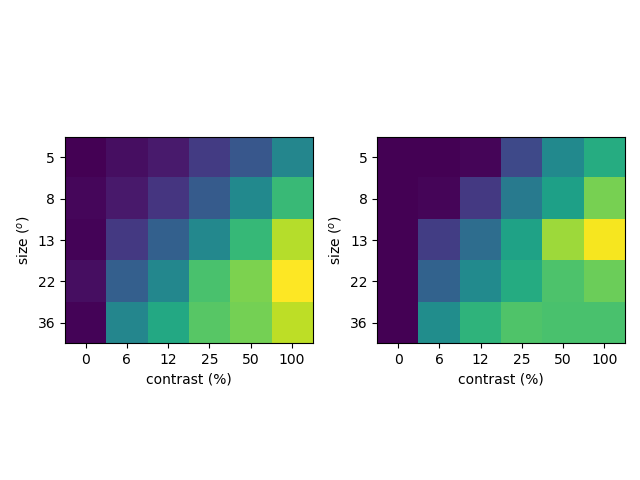

<IPython.core.display.Javascript object>


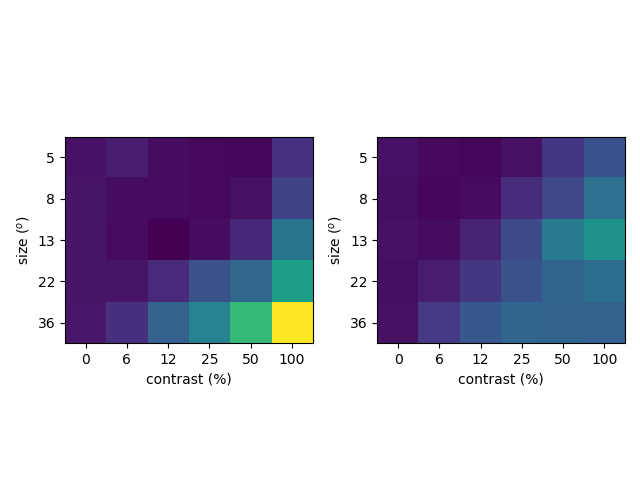

<IPython.core.display.Javascript object>


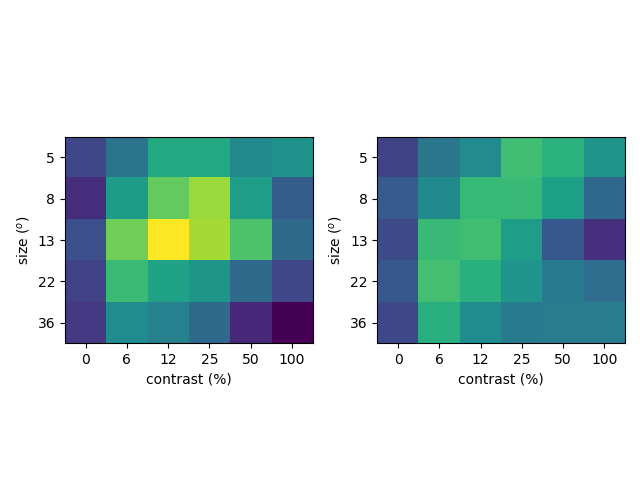

In [541]:
#lbl = ['pc','sst','vip']
#for icelltype in range(3):
#    this_Wstar = Wstar_t_novar
#    t = -1
#    display_model_fit(Yhat[icelltype].mean(0)/Yhat[icelltype].mean(0).sum(),this_Wstar[-3][t,:,icelltype]/this_Wstar[-3][t,:,icelltype].sum())
#    plt.savefig('figures/' + lbl[icelltype] + '_measured_modeled.pdf')

In [585]:
labels = ['Wmx','Wmy','Wsx','Wsy','s02','Y','momentum','loss']
Wstar_dict = {}
for i,label in enumerate(labels):
    Wstar_dict[label] = Wstar_t[i]

In [586]:
np.save('w_over_time_miller_troyer_data_loss_momentum.npy',Wstar_dict,allow_pickle=True)

In [270]:
def scatter_results(this_Wstar,t=-1):
    plt.figure(figsize=(9,3))
    celltype = ['PC','SST','VIP']
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.title(celltype[i])
        xx = Yhat[i].mean(0)/Yhat[i].mean(0).sum()
        yy = this_Wstar[-3][t,:,i]/this_Wstar[-3][t,:,i].sum()
        sca.scatter_size_contrast(xx,yy)
        plt.plot((0,xx.max()),(0,xx.max()),c='k')
        plt.xlabel('measured')
        plt.ylabel('modeled')
        plt.tight_layout()

In [1]:
icelltype = 3
u,s,v = np.linalg.svd(Rs[icelltype][~np.isnan(Rs[icelltype][:,0])])
# plt.figure()
# plt.imshow(Rs[1][])

NameError: name 'np' is not defined

<IPython.core.display.Javascript object>


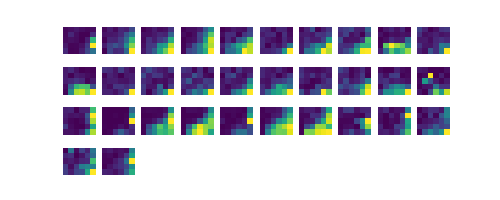

In [500]:
ut.imshow_in_rows(Rs[icelltype][~np.isnan(Rs[icelltype][:,0])][np.where(np.logical_and(u[:,0]<np.percentile(u[:,0],52.5),u[:,0]>np.percentile(u[:,0],47.5)))].reshape((-1,5,6)))

<IPython.core.display.Javascript object>


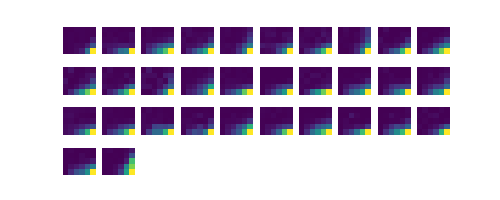

In [501]:
ut.imshow_in_rows(Rs[icelltype][~np.isnan(Rs[icelltype][:,0])][np.where(u[:,0]<np.percentile(u[:,0],5))].reshape((-1,5,6)))

<IPython.core.display.Javascript object>


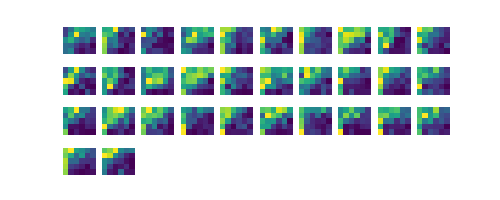

In [502]:
ut.imshow_in_rows(Rs[icelltype][~np.isnan(Rs[icelltype][:,0])][np.where(u[:,0]>np.percentile(u[:,0],95))].reshape((-1,5,6)))

<IPython.core.display.Javascript object>


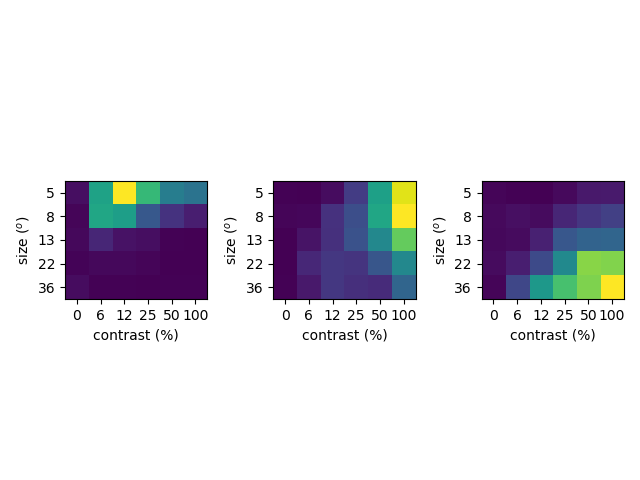

In [508]:
# ut.imshow_in_rows(Rs[1][~np.isnan(Rs[1][:,0])][np.where(u[:,0]>np.percentile(u[:,0],95))].reshape((-1,5,6)))
lower = np.where(u[:,0]<np.percentile(u[:,0],5))[0][28]
middle = np.where(np.logical_and(u[:,0]<np.percentile(u[:,0],52.5),u[:,0]>np.percentile(u[:,0],47.5)))[0][19]
upper = np.where(u[:,0]>np.percentile(u[:,0],95))[0][90]
plt.figure()
for i,thisone in enumerate([upper,middle,lower]):
    plt.subplot(1,3,i+1)
    sca.show_size_contrast(Rs[1][~np.isnan(Rs[1][:,0])][thisone].reshape((5,6)))
plt.tight_layout()
plt.savefig('figures/l23_pc_variability.pdf')

<IPython.core.display.Javascript object>


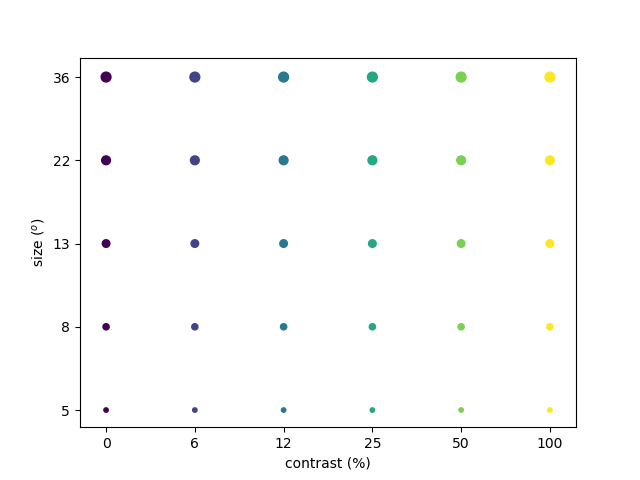

In [519]:
plt.figure()
xx,yy = np.meshgrid(np.arange(6),np.arange(5))
xx = xx.flatten()
yy = yy.flatten()
sca.scatter_size_contrast(xx,yy)
plt.xticks(np.arange(6),(0,6,12,25,50,100))
plt.xlabel('contrast (%)')
plt.yticks(np.arange(5),(5,8,13,22,36))
plt.ylabel('size ($^o$)')
plt.savefig('figures/measured_modeled_legend.pdf')
# plt.axis('off')

In [278]:
#niter = int(1e3)
#Ws = [Wstar_t[i][-1].copy() + 1e-2*np.random.randn(*Wstar_t[i][-1].shape) for i in range(4)]
#Wstar_t2 = fit_W_linearized_pointwise(X.copy(),Yhat.copy(),f_miller_troyer,Y0=Yhat.copy(),W0mx=Ws[0],W0my=Ws[1],W0sx=Ws[2],W0sy=Ws[3],bounds=bounds,niter=niter,weight=np.array((1,10,1)))
#scatter_results(Wstar_t2)

In [308]:
def pca_denoise(arr,Npc):
    u,s,v = np.linalg.svd(arr)
    return u[:,:Npc] @ np.diag(s[:Npc]) @ v[:Npc,:]

In [309]:
Rpc2 = pca_denoise(Rpc[~np.isnan(Rpc.sum(1))],10)

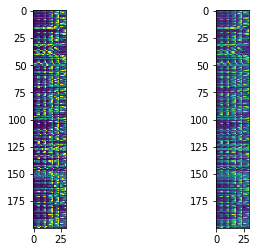

In [312]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(Rpc[:200])
plt.subplot(1,2,2)
plt.imshow(Rpc2[:200])